# **Artivatic Loan-Defaulter**

### **Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

##### **`Problem Statement`:** **The Bank Indessa has not done well in the last 3 quarters. Their NPAs (Non Performing Assets)have reached all time high. It is starting to lose the confidence of its investors. As a result, it’s stockhas fallen by 20% in the previous quarter alone.After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. Withthe messy data collected over all the years, this bank has decided to use machine learning to figureout a way to find these defaulters and devise a plan to reduce them.This bank uses a pool of investors to sanction their loans. For example: If any customer has appliedfor a loan of $20000, along with the bank, the investors perform due diligence on the requested loanapplication. Keep this in mind while understanding data.In this challenge, you will help this bank by predicting the probability that a member will default**

### **Load-Data**

In [2]:
df=pd.read_csv('../data/raw/ML_Artivatic_dataset/train_indessa.csv')
df.head(5)

member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0   58189336      14350        14350          14350.0  36 months   
1   70011223       4800         4800           4800.0  36 months   
2   70255675      10000        10000          10000.0  36 months   
3    1893936      15000        15000          15000.0  36 months   
4    7652106      16000        16000          16000.0  36 months   

  batch_enrolled  int_rate grade sub_grade                          emp_title  \
0                    19.19     E        E3                              clerk   
1     BAT1586599     10.99     B        B4         Human Resources Specialist   
2     BAT1586599      7.26     A        A4                             Driver   
3     BAT4808022     19.72     D        D5  Us office of Personnel Management   
4     BAT2833642     10.64     B        B2        LAUSD-HOLLYWOOD HIGH SCHOOL   

   ... collections_12_mths_ex_med mths_since_last_major_derog  \
0  ...                        0.0                        74.0   
1  ...                        0.0                         NaN   
2  ...                        0.0                         NaN   
3  ...                        0.0                         NaN   
4  ...                        0.0                         NaN   

   application_type verification_status_joint last_week_pay acc_now_delinq  \
0        INDIVIDUAL                       NaN     26th week            0.0   
1        INDIVIDUAL                       NaN      9th week            0.0   
2        INDIVIDUAL                       NaN      9th week            0.0   
3        INDIVIDUAL                       NaN    135th week            0.0   
4        INDIVIDUAL                       NaN     96th week            0.0   

  tot_coll_amt tot_cur_bal total_rev_hi_lim loan_status  
0          0.0     28699.0          30800.0           0  
1          0.0      9974.0          32900.0           0  
2         65.0     38295.0          34900.0           0  
3          0.0     55564.0          24700.0           0  
4          0.0     47159.0          47033.0           0  

[5 rows x 45 columns]

### **Indessa Bank: Loan Default Prediction**

#### 1. **The Problem Statement**
Indessa Bank is currently navigating a financial crisis. Non-Performing Assets (NPAs)—loans that are not being repaid—are at an all-time high. This surge in defaults has triggered investor panic and caused the bank's stock price to plummet. To mitigate this, the bank needs a proactive system to identify risky applicants before loans are sanctioned.

#### 2. **The Objective**
The goal is to utilize Indessa's historical loan data to build a machine learning model. This model must predict the probability that a new loan applicant will fail to repay their debt.

#### 3. **Key Constraints**
Indessa uses a pool of external investors to sanction loans. Consequently, the model's predictions will be utilized not just by the bank, but also by these investors for **due diligence**. The model must be:
*   **Robust:** Capable of handling real-world data variability.
*   **Trustworthy:** Providing reliable probabilities to maintain investor confidence.

#### 4. **Machine Learning Task**
This is a classic **Binary Classification** problem. We need to classify each `member_id` into one of two categories:

*   **`0`**: **Safe Customer** (Will not default).
*   **`1`**: **Defaulter** (High risk / Will default).


In [3]:
print("Dataset shape:", df.shape)
print("\nLoan status value counts:")
print(df['loan_status'].value_counts())
print(f"\nDefault rate (loan_status == 1): {df['loan_status'].mean():.4f}\n")

Dataset shape: (532428, 45)

Loan status value counts:
loan_status
0    406601
1    125827
Name: count, dtype: int64

Default rate (loan_status == 1): 0.2363



In [4]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (532428, 45)


In [5]:
df.describe()

member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count  5.324280e+05  532428.000000  532428.000000    532428.000000   
mean   3.500547e+07   14757.595722   14744.271291     14704.926696   
std    2.412148e+07    8434.420080    8429.139277      8441.290381   
min    7.047300e+04     500.000000     500.000000         0.000000   
25%    1.086688e+07    8000.000000    8000.000000      8000.000000   
50%    3.709590e+07   13000.000000   13000.000000     13000.000000   
75%    5.848920e+07   20000.000000   20000.000000     20000.000000   
max    7.354484e+07   35000.000000   35000.000000     35000.000000   

            int_rate    annual_inc            dti    delinq_2yrs  \
count  532428.000000  5.324250e+05  532428.000000  532412.000000   
mean       13.242969  7.502984e+04      18.138767       0.314448   
std         4.379611  6.519985e+04       8.369074       0.860045   
min         5.320000  1.200000e+03       0.000000       0.000000   
25%         9.990000  4.500000e+04      11.930000       0.000000   
50%        12.990000  6.500000e+04      17.650000       0.000000   
75%        16.200000  9.000000e+04      23.950000       0.000000   
max        28.990000  9.500000e+06     672.520000      30.000000   

       inq_last_6mths  mths_since_last_delinq  ...  total_rec_late_fee  \
count   532412.000000           259874.000000  ...       532428.000000   
mean         0.694603               34.055735  ...            0.394954   
std          0.997025               21.884797  ...            4.091546   
min          0.000000                0.000000  ...            0.000000   
25%          0.000000               15.000000  ...            0.000000   
50%          0.000000               31.000000  ...            0.000000   
75%          1.000000               50.000000  ...            0.000000   
max         31.000000              180.000000  ...          358.680000   

          recoveries  collection_recovery_fee  collections_12_mths_ex_med  \
count  532428.000000            532428.000000               532333.000000   
mean       45.717832                 4.859221                    0.014299   
std       409.647467                63.123361                    0.133005   
min         0.000000                 0.000000                    0.000000   
25%         0.000000                 0.000000                    0.000000   
50%         0.000000                 0.000000                    0.000000   
75%         0.000000                 0.000000                    0.000000   
max     33520.270000              7002.190000                   16.000000   

       mths_since_last_major_derog  acc_now_delinq   tot_coll_amt  \
count                132980.000000   532412.000000  490424.000000   
mean                     44.121462        0.005015     213.562222   
std                      22.198410        0.079117    1958.571538   
min                       0.000000        0.000000       0.000000   
25%                      27.000000        0.000000       0.000000   
50%                      44.000000        0.000000       0.000000   
75%                      61.000000        0.000000       0.000000   
max                     180.000000       14.000000  496651.000000   

        tot_cur_bal  total_rev_hi_lim    loan_status  
count  4.904240e+05      4.904240e+05  532428.000000  
mean   1.395541e+05      3.208057e+04       0.236327  
std    1.539149e+05      3.805304e+04       0.424826  
min    0.000000e+00      0.000000e+00       0.000000  
25%    2.983975e+04      1.400000e+04       0.000000  
50%    8.066950e+04      2.370000e+04       0.000000  
75%    2.084792e+05      3.980000e+04       0.000000  
max    8.000078e+06      9.999999e+06       1.000000  

[8 rows x 27 columns]

#### **Target Variable Analysis**
By calculating `df['loan_status'].mean()`, we see that the default rate is **23.63%**. This reveals a significant class imbalance, with roughly 3.2 non-defaulters for every defaulter. This is critical context: a naive model that always predicts "0" (No Default) would achieve **76% accuracy** yet be completely useless. Therefore, we cannot rely on simple accuracy to evaluate our model's performance.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

### **Missing Value Count**

In [7]:
print(df.isnull().sum())

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              91
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

### **Missing Value Percentage**

In [8]:
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
print("Top columns by missing %:\n", missing_pct.head(20))

Top columns by missing %:
 verification_status_joint      99.942715
desc                           85.801085
mths_since_last_record         84.575755
mths_since_last_major_derog    75.023853
mths_since_last_delinq         51.190771
batch_enrolled                 15.992585
total_rev_hi_lim                7.889142
tot_cur_bal                     7.889142
tot_coll_amt                    7.889142
emp_title                       5.791018
emp_length                      5.050636
revol_util                      0.053904
collections_12_mths_ex_med      0.017843
title                           0.017092
open_acc                        0.003005
pub_rec                         0.003005
delinq_2yrs                     0.003005
inq_last_6mths                  0.003005
acc_now_delinq                  0.003005
total_acc                       0.003005
dtype: float64


#### **Missing Value Analysis**
We calculated the percentage of missing values for each column, revealing staggering gaps in specific features:

*   **`verification_status_joint` (99.94%):** Practically useless for modeling.
*   **`desc` (85.80%):** The loan description is mostly absent.
*   **`mths_since_last_record` (84.58%)** and **`mths_since_last_major_derog` (75.02%):** Significant data loss regarding historical records.

These high percentages suggest these columns may need to be dropped or heavily engineered.

In [9]:
df['member_id'].nunique()

532428

#### **Analysis of `member_id`**
Checking `df['member_id'].nunique()` reveals 532,428 unique values, exactly matching the total number of rows. This confirms it is a unique identifier.

**Action:** We will **drop** this column. It holds no predictive power, and including it would simply cause the model to overfit by "memorizing" specific IDs rather than learning generalizable patterns.

In [10]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    532123
JOINT            305
Name: count, dtype: int64

In [11]:
df['sub_grade'].nunique()

35

In [12]:
df['grade'].nunique()

7

In [13]:
df['loan_status'].value_counts()    

loan_status
0    406601
1    125827
Name: count, dtype: int64

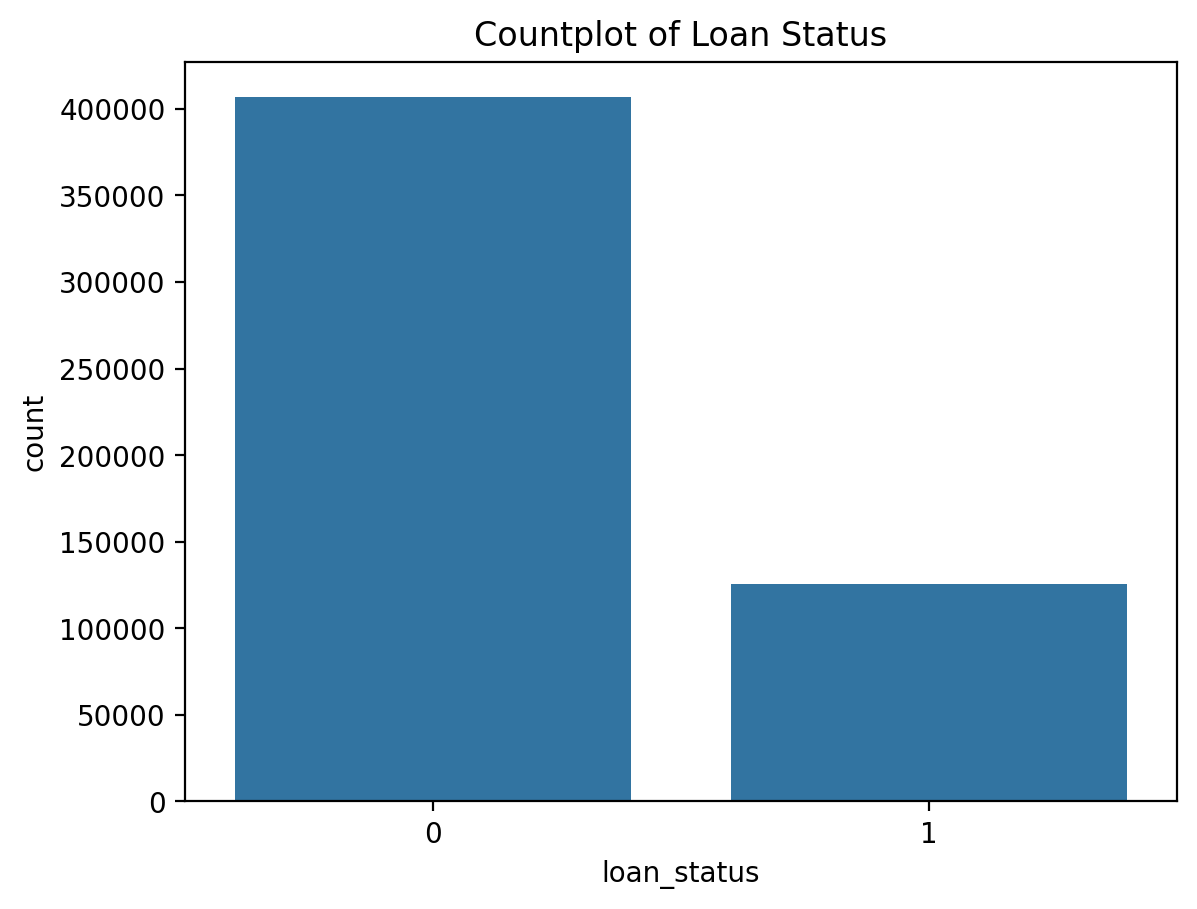

In [14]:
sns.countplot(data=df, x='loan_status')
plt.title("Countplot of Loan Status")
plt.show()

In [15]:
df['loan_status'].isnull().sum()    

0

In [16]:
df['addr_state'].nunique()

51

### **Correlation Heatmap**

In [17]:
num_features = df.select_dtypes(include=np.number).columns.tolist()
cat_features = df.select_dtypes(include=['object']).columns.tolist()

In [18]:
numeric_cols = [c for c in num_features if c in df.columns and df[c].dtype in [np.float64, np.int64]]

### **Remove high-cardinality identifier**

#### **`member_id` is considered a high-cardinality identifier because it is likely to be a unique identifier for each record in the dataset.**


Numeric features used for correlation: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']


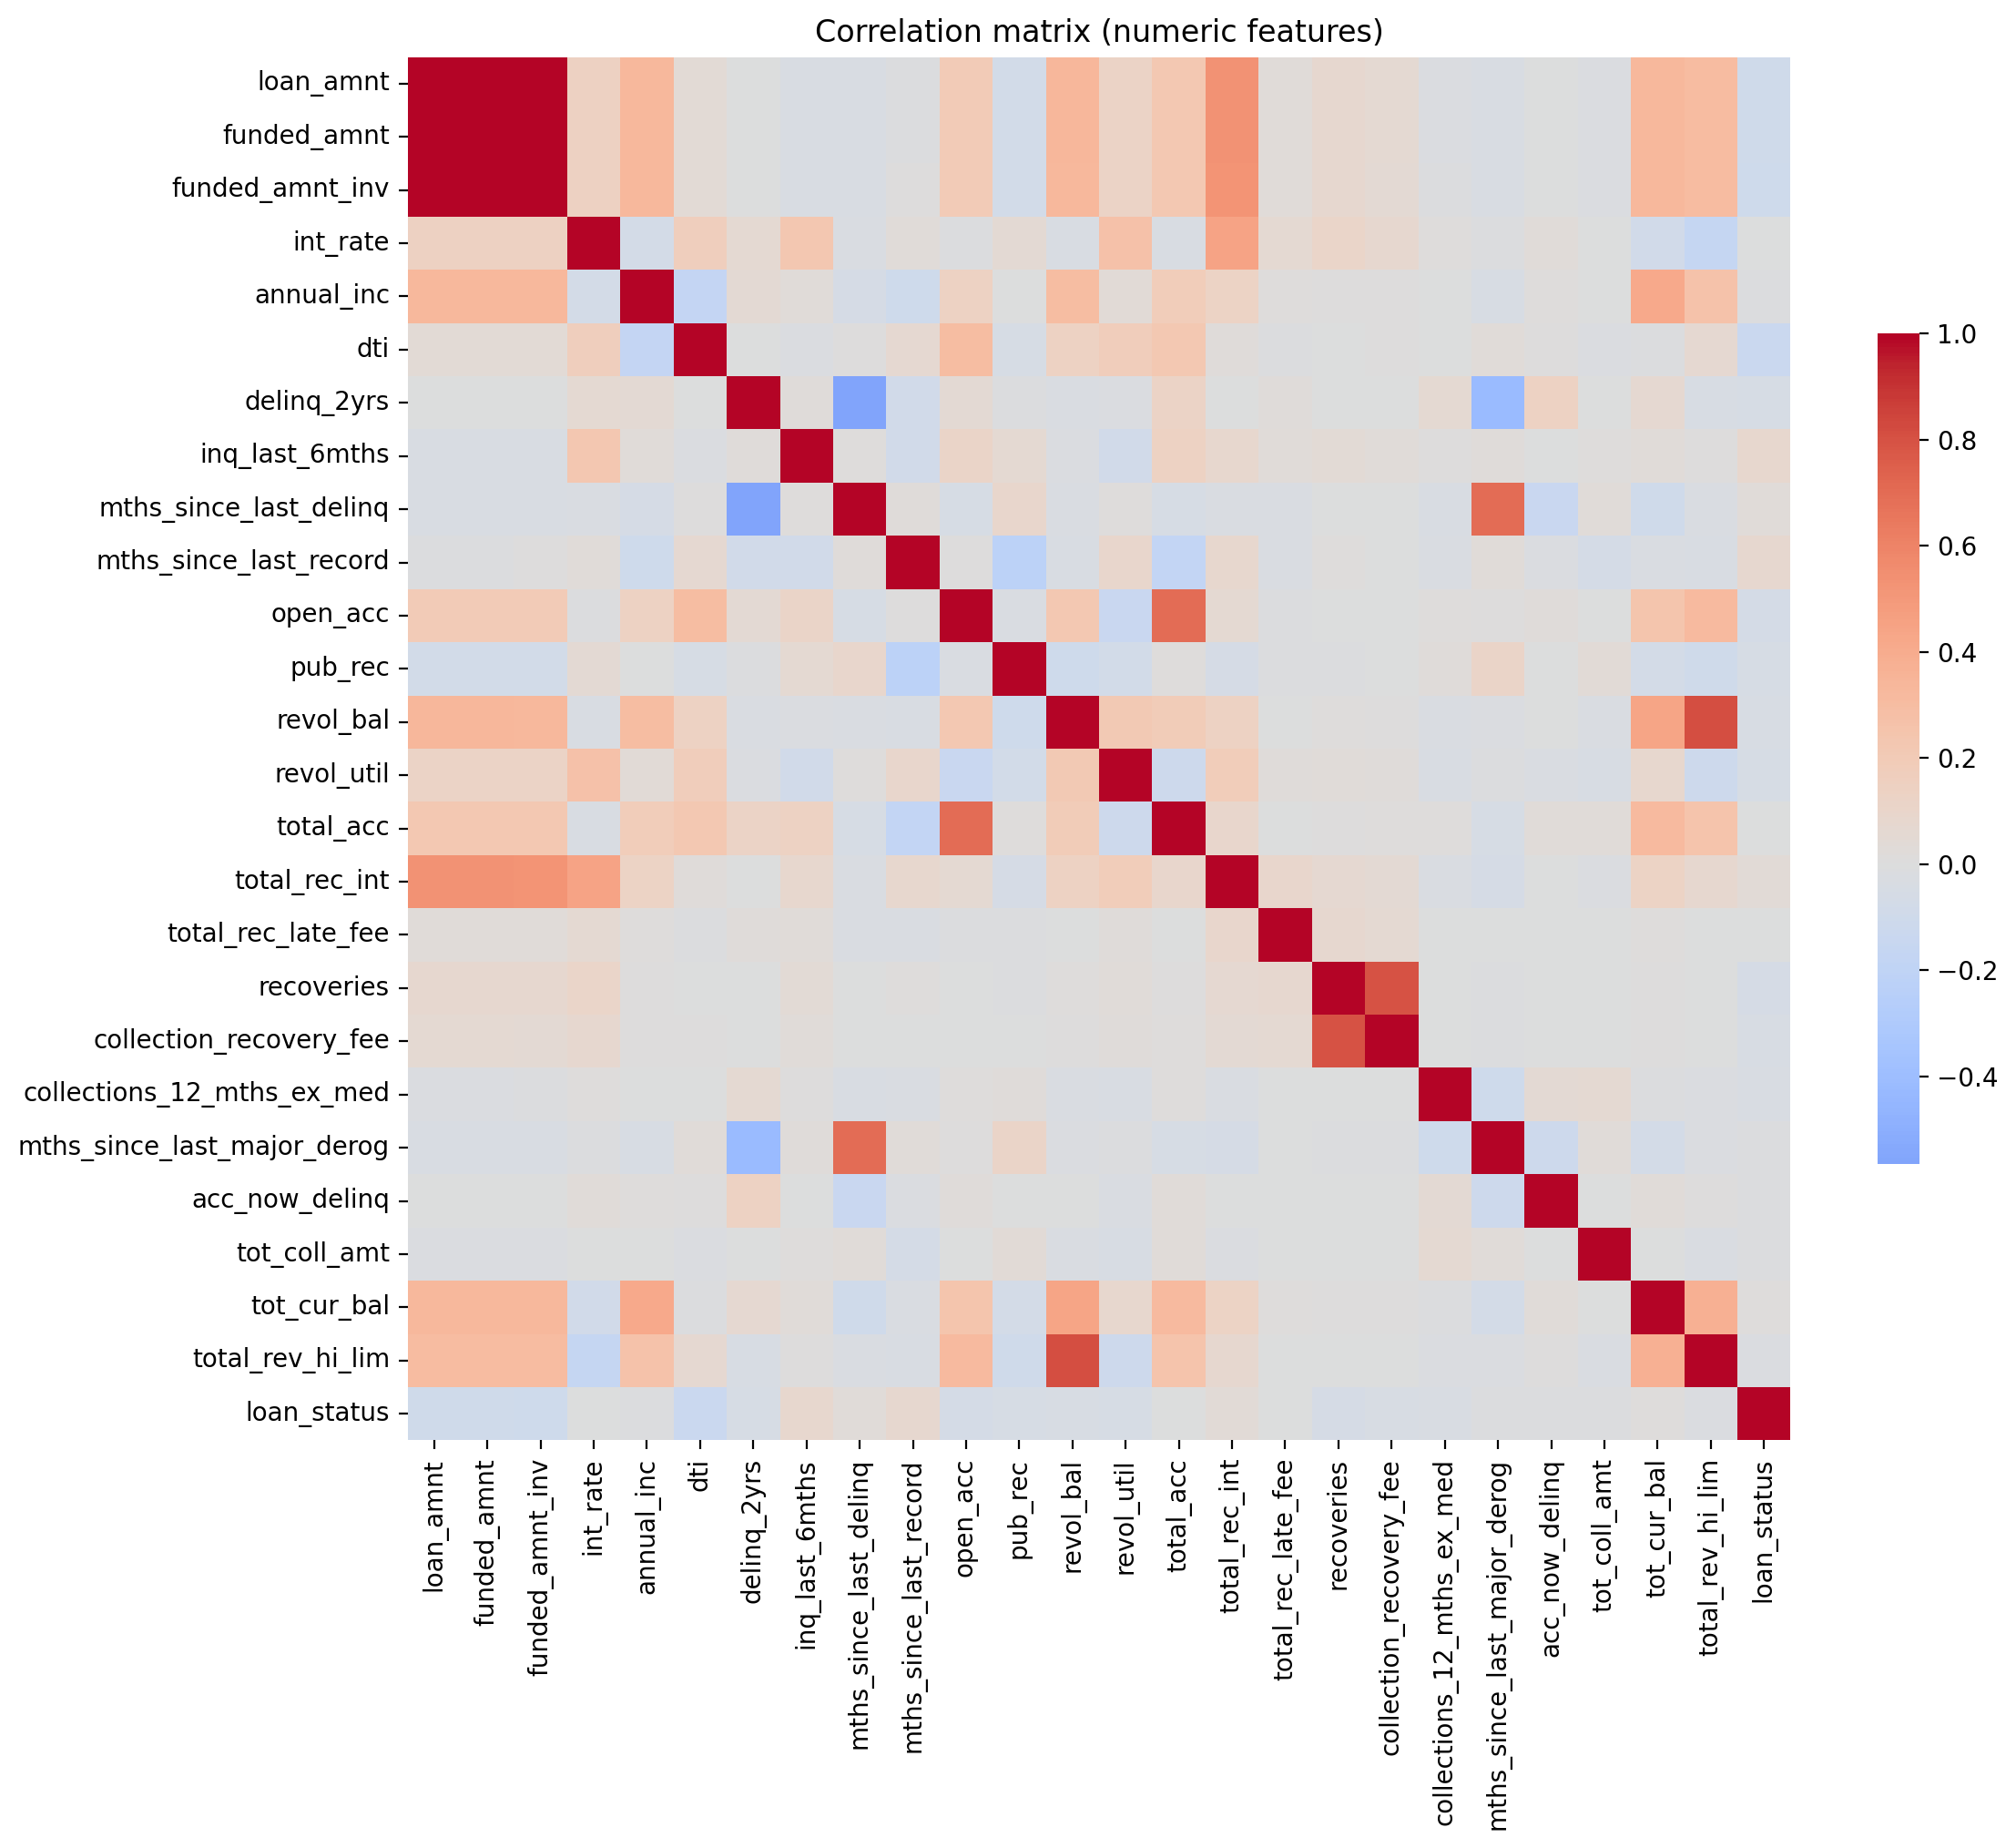

In [19]:
numeric_cols = [c for c in numeric_cols if c != 'member_id']
print("\nNumeric features used for correlation:", numeric_cols)

corr = df[numeric_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0, fmt=".2f", square=True, cbar_kws={"shrink": .6})
plt.title("Correlation matrix (numeric features)")
plt.tight_layout()
plt.show()

#### **Target Variable: `loan_status`**

**Likely Risk Indicators (Positive Correlation with Default):**
*   **`int_rate`:** The strongest predictor; riskier borrowers get higher rates.
*   **`revol_util`:** High utilization suggests financial strain.
*   **`inq_last_6mths` & `delinq_2yrs`:** aggressive credit seeking or recent failures indicate high risk.

**Likely Stability Indicators (Negative Correlation with Default):**
*   **`annual_inc`:** Higher income generally lowers default probability.
*   **`mths_since_last_delinq`:** The longer it has been since a past issue, the safer the borrower.
*   **`tot_cur_bal`:** Higher total balances (often driven by mortgages) can indicate stability rather than risk.

### **Distribution of important numeric features vs loan_status**

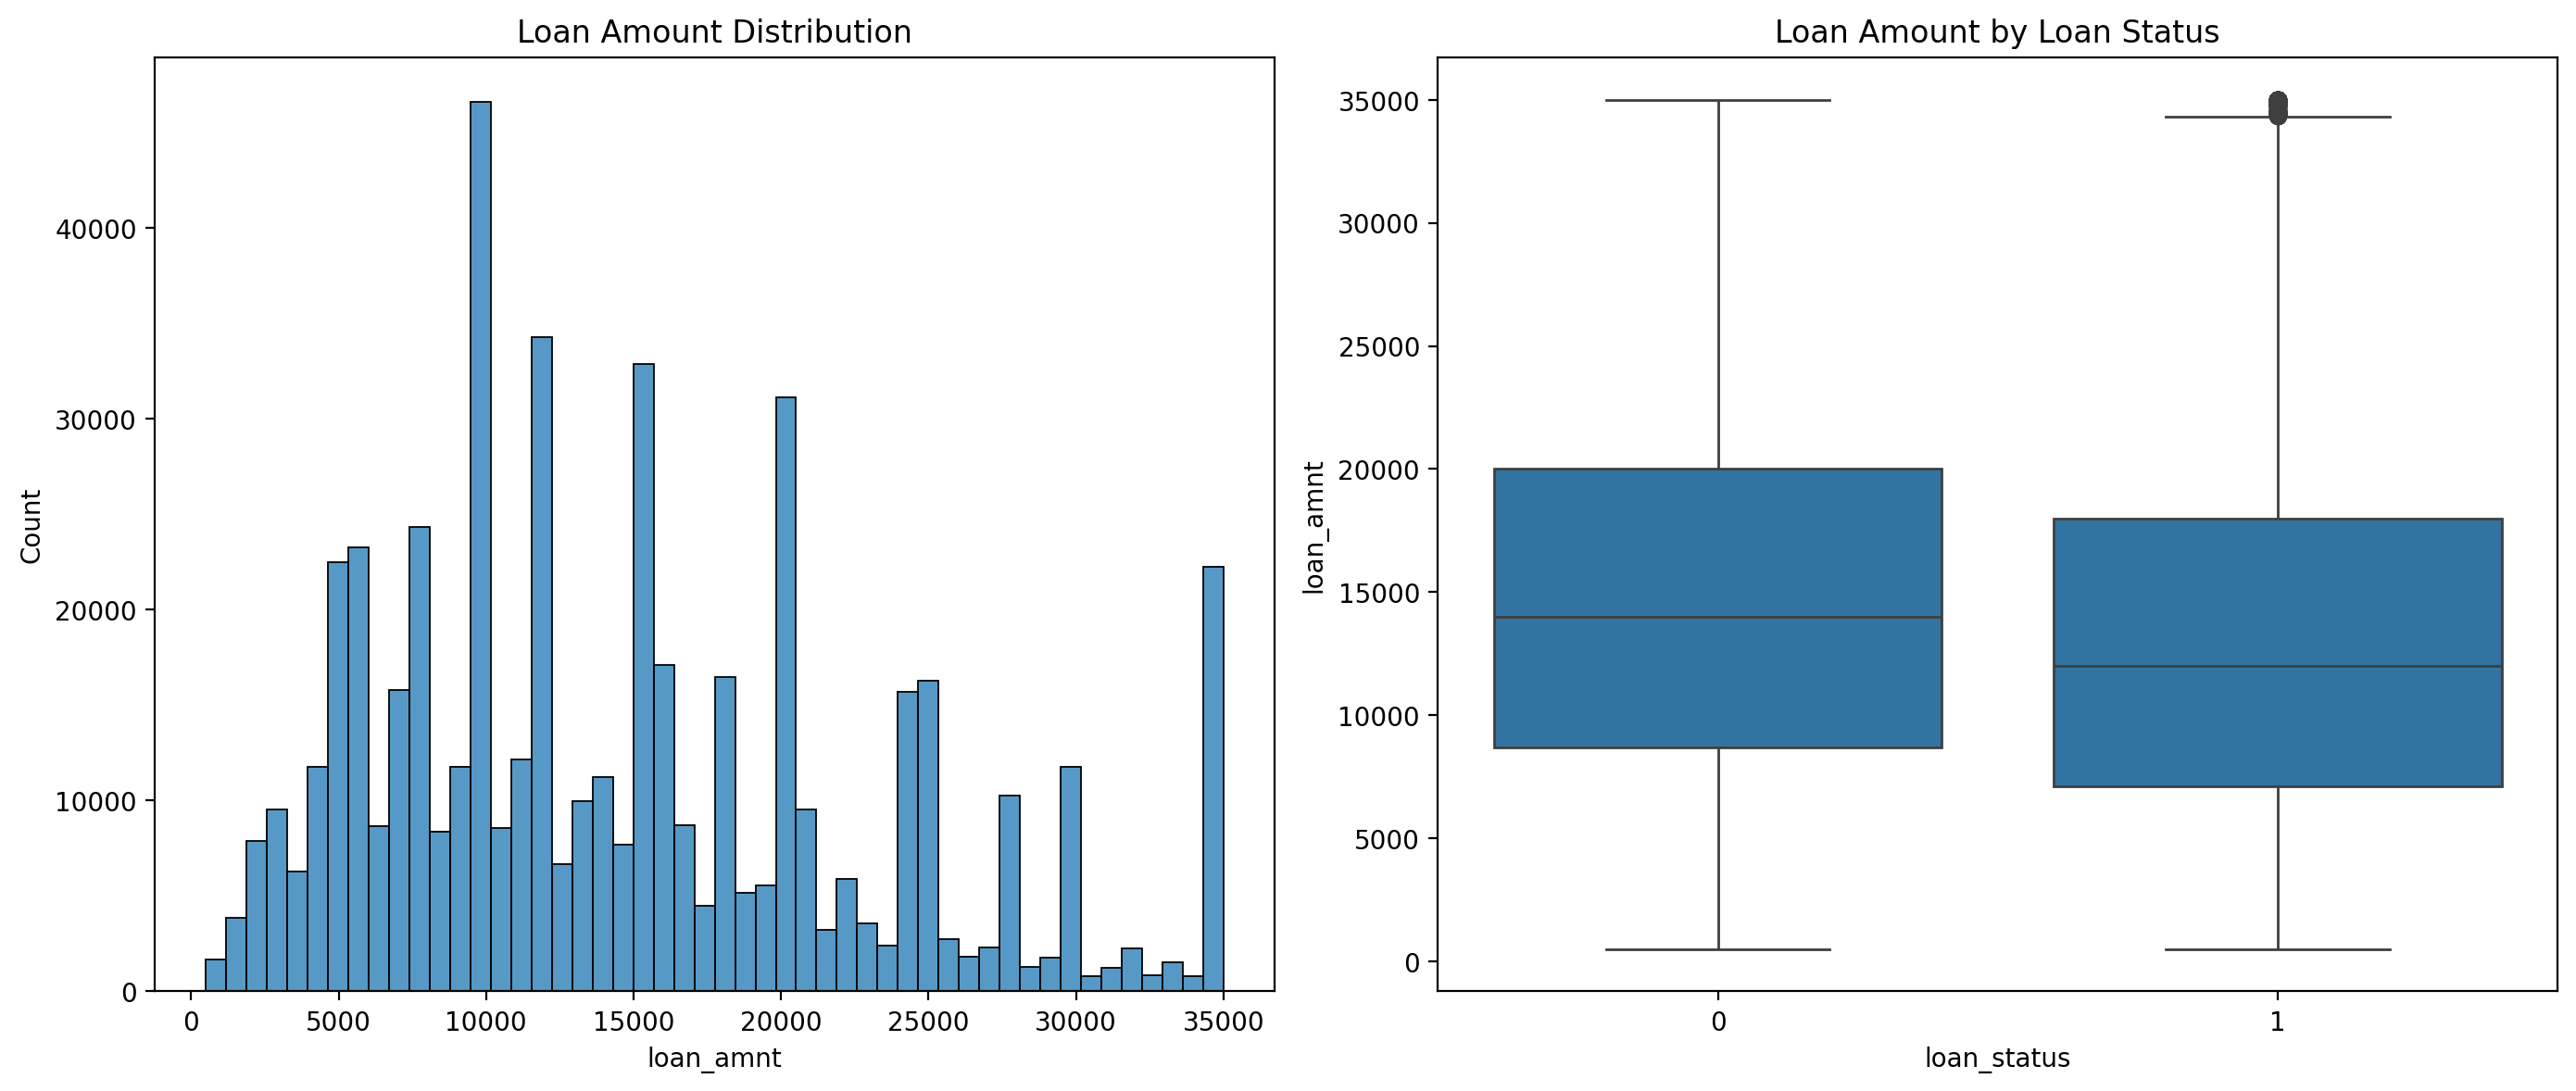

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(df['loan_amnt'], bins=50, kde=False)
plt.title("Loan Amount Distribution")
plt.subplot(1,2,2)
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title("Loan Amount by Loan Status")
plt.tight_layout()
plt.show()

### **Visualization Objectives**

**1. Univariate Analysis: Loan Amount Distribution**
*   **Purpose:** To visualize the frequency distribution of the `loan_amnt` feature.
*   **Key Question:** *What are the most common loan sizes requested by applicants, and are there any outliers?*

**2. Bivariate Analysis: Loan Amount vs. Loan Status**
*   **Purpose:** To compare the distribution of loan amounts across the two target categories (Default vs. No Default).
*   **Key Question:** *Is there a correlation between the size of the loan and the likelihood of a borrower defaulting?*

### **Default rate by selected categorical features (top categories only)**

#### **Purpose of Top categories**

**1. Identify the most important categorical columns that contribute to the default rate.**

**2. Visualize the top categories for each column, along with their corresponding default rates.**

By doing so, it can help identify which categorical variables are driving the default rate, and potentially inform model selection or feature engineering decisions.**

### **Loan Grade vs. Default Risk**
*   **Purpose:** To visualize the relationship between a loan's assigned `grade` (a categorical risk rating) and its actual probability of default.
*   **Key Question:** *How effective is the bank's existing grading system at predicting risk?* 


Default rate by grade (top categories):
           mean   count
grade                  
A      0.268879   89107
B      0.263278  152713
G      0.235952    3221
D      0.217167   83567
C      0.216408  147499
F      0.209171   13826
E      0.186893   42495


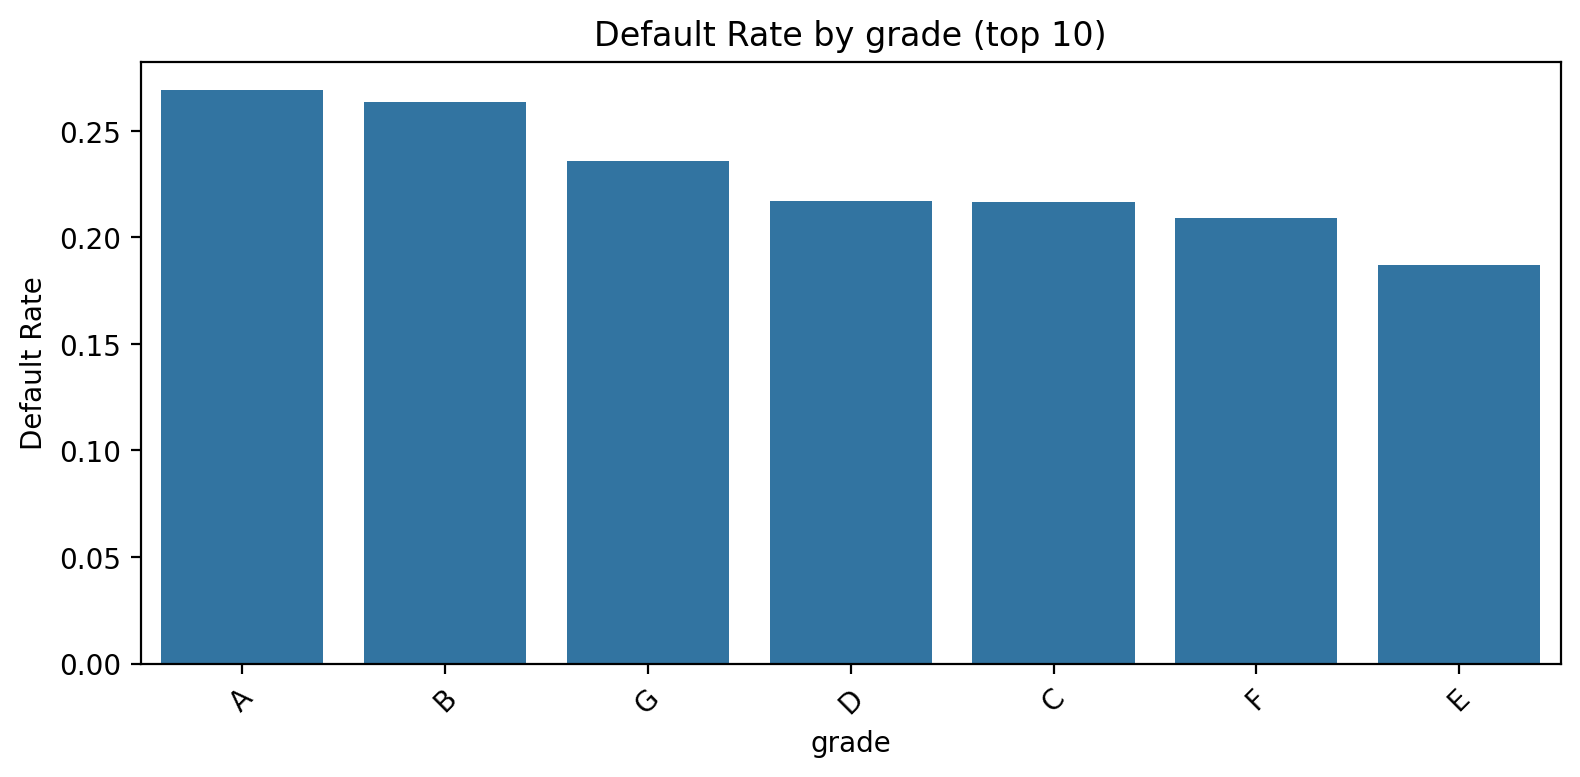


Default rate by sub_grade (top categories):
               mean  count
sub_grade                 
B3         0.280966  33844
B2         0.268493  29390
B4         0.265287  33198
B5         0.252277  29313
A5         0.247076  27016
B1         0.244883  26968
C1         0.235184  31975
C2         0.228569  31356
C3         0.206815  30080
C4         0.194653  29103


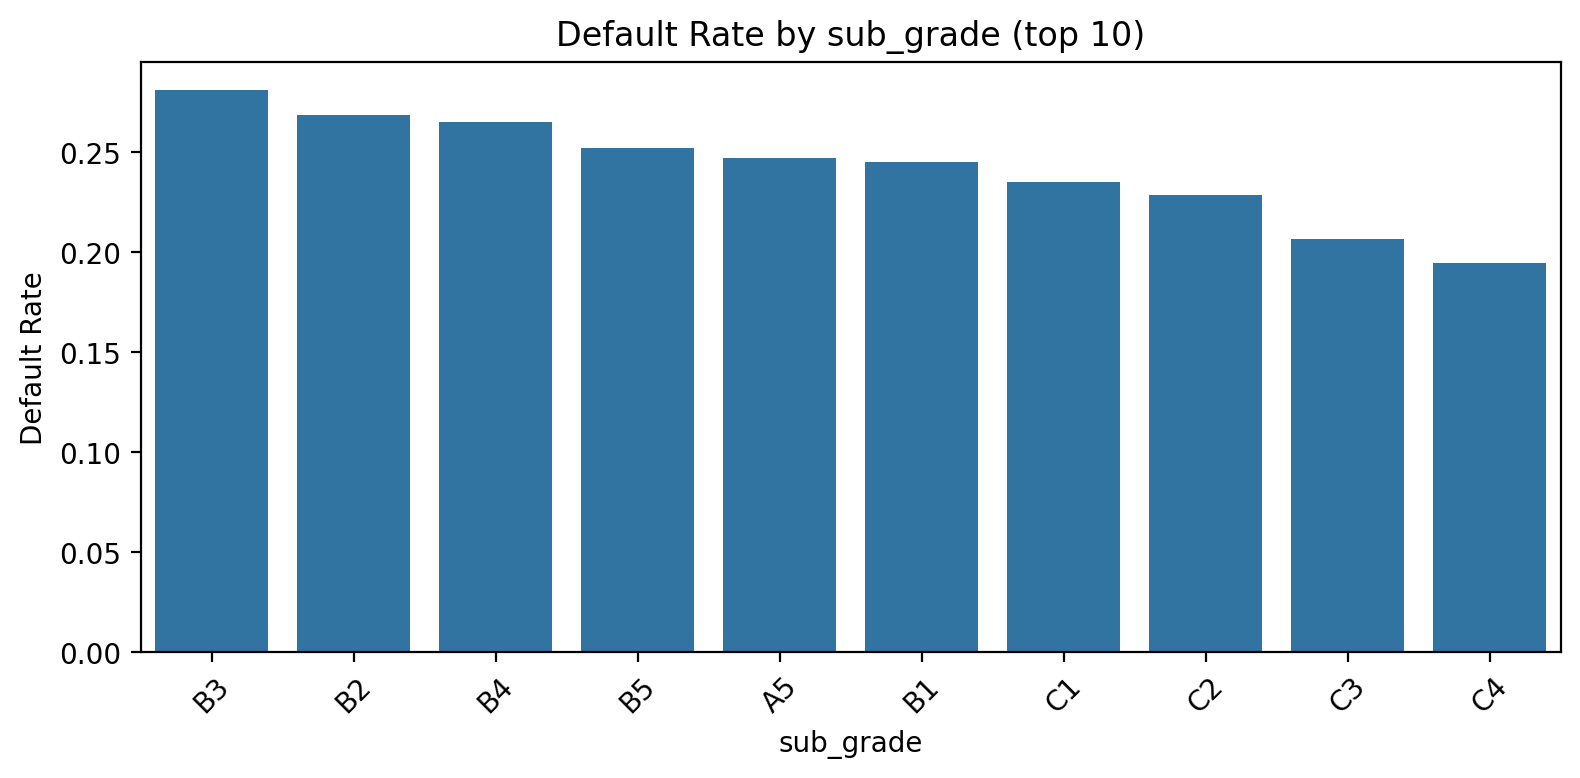


Default rate by term (top categories):
               mean   count
term                       
36 months  0.272733  372793
60 months  0.151308  159635


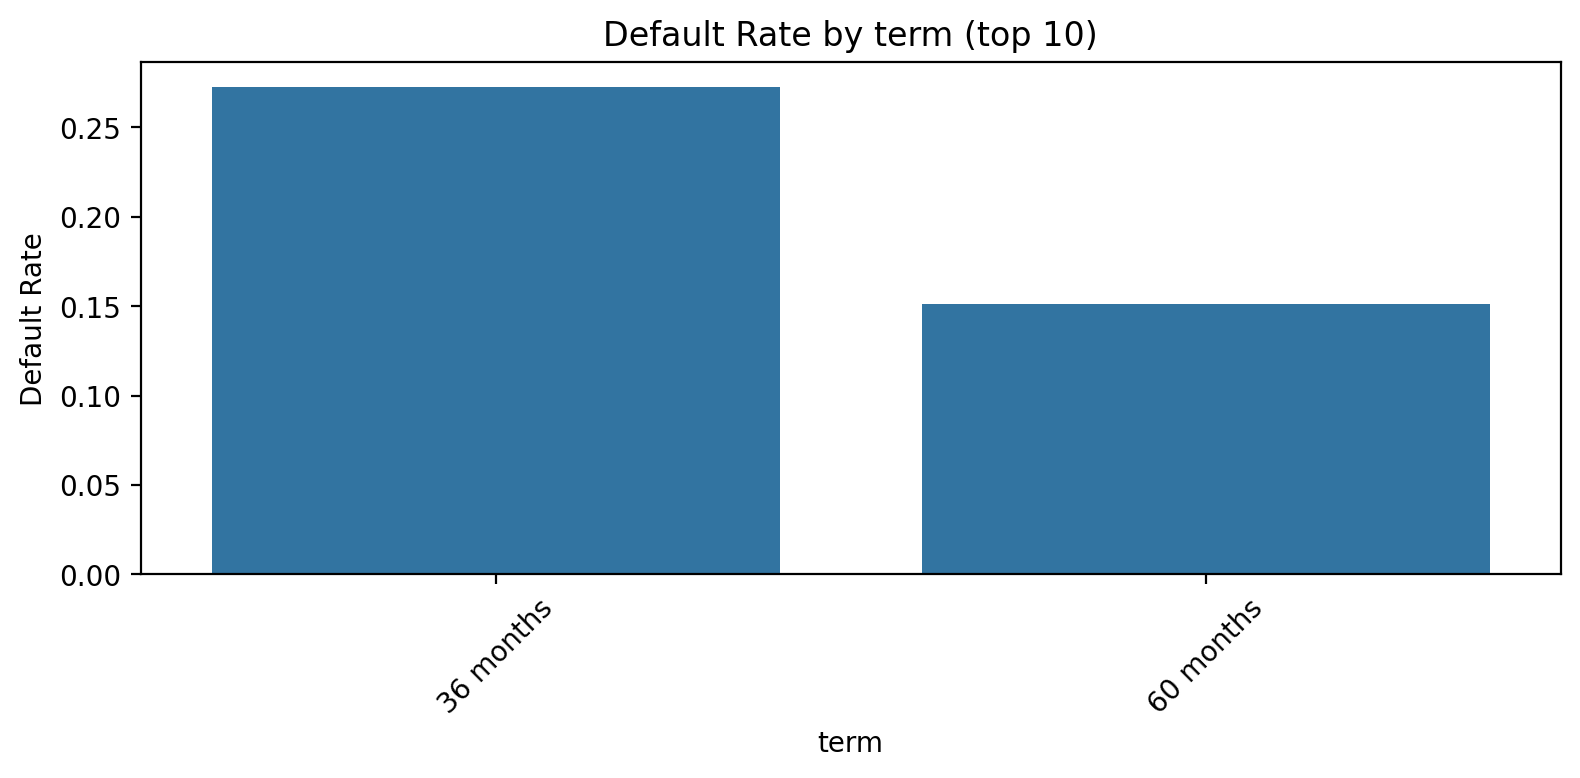


Default rate by home_ownership (top categories):
                    mean   count
home_ownership                  
NONE            0.777778      36
OTHER           0.769231     117
ANY             0.333333       3
RENT            0.239554  213668
MORTGAGE        0.239137  265940
OWN             0.207485   52664


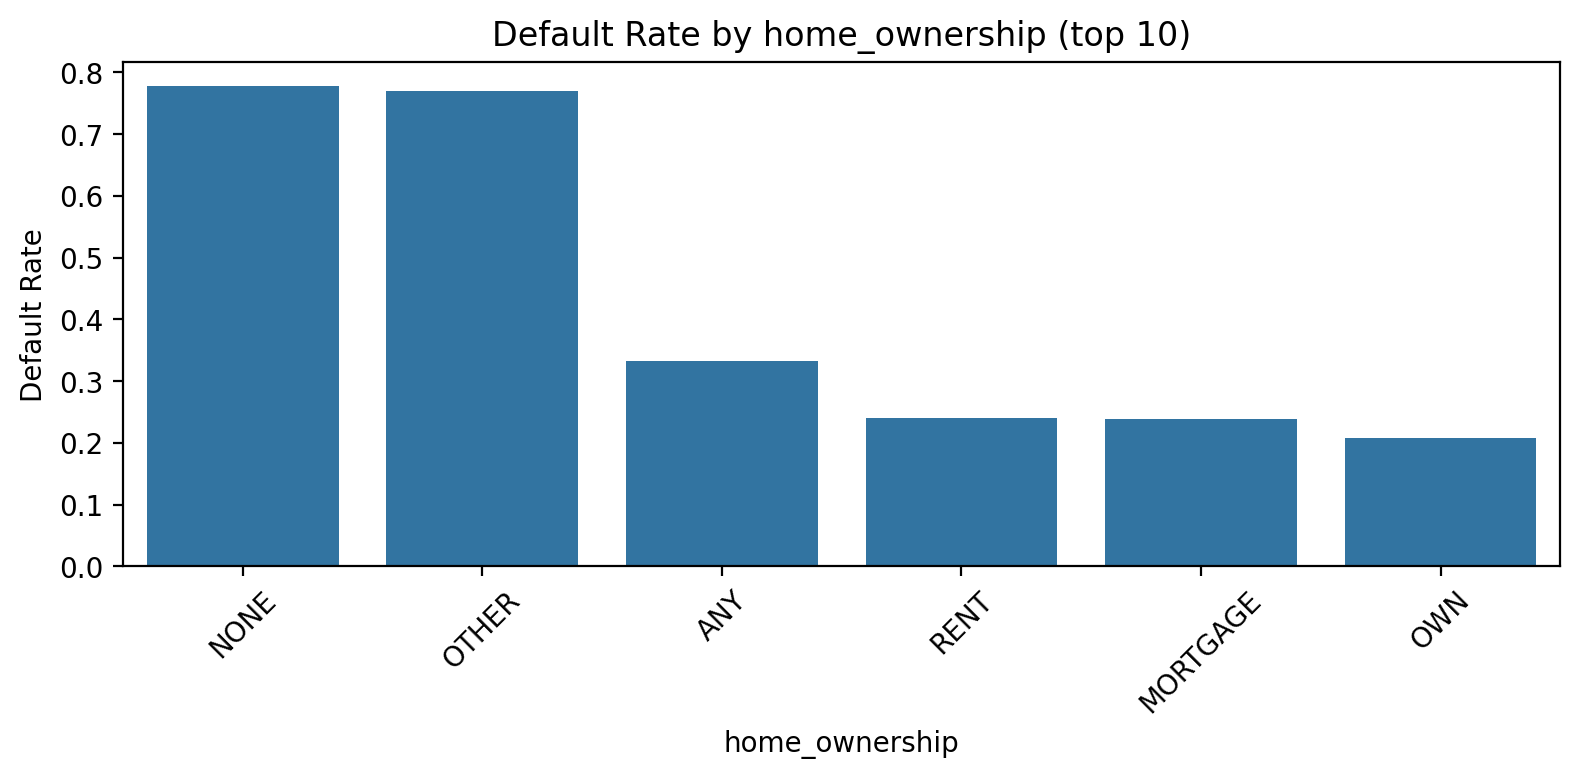


Default rate by verification_status (top categories):
                         mean   count
verification_status                  
Not Verified         0.280967  159976
Verified             0.254479  174702
Source Verified      0.184177  197750


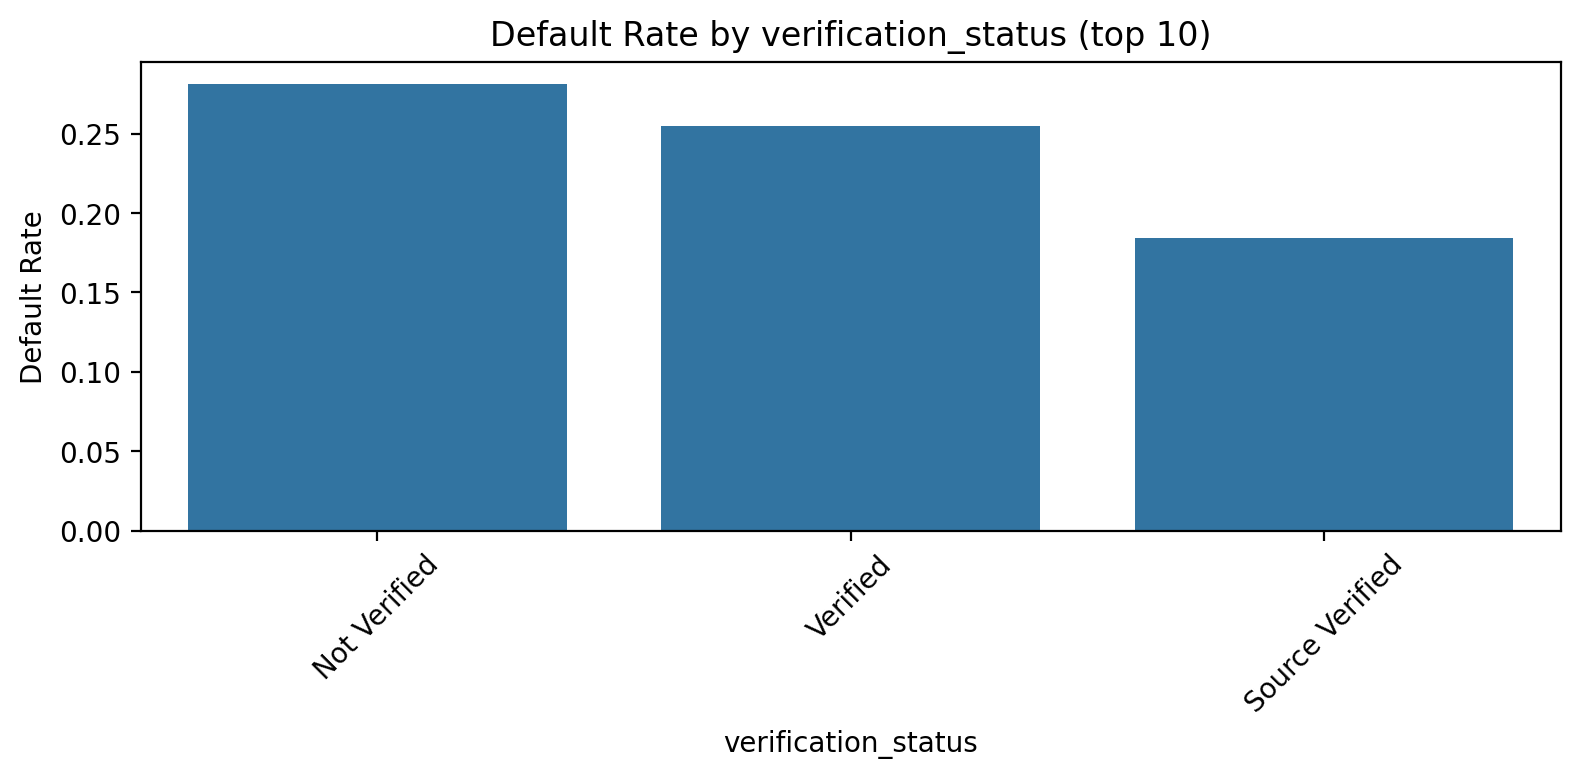


Default rate by purpose (top categories):
                        mean   count
purpose                             
car                 0.367262    5266
small_business      0.332574    6146
major_purchase      0.318456   10284
moving              0.300956    3243
vacation            0.273826    2812
other               0.272220   25652
medical             0.271839    5117
home_improvement    0.248625   31087
debt_consolidation  0.231840  314989
credit_card         0.206162  123670


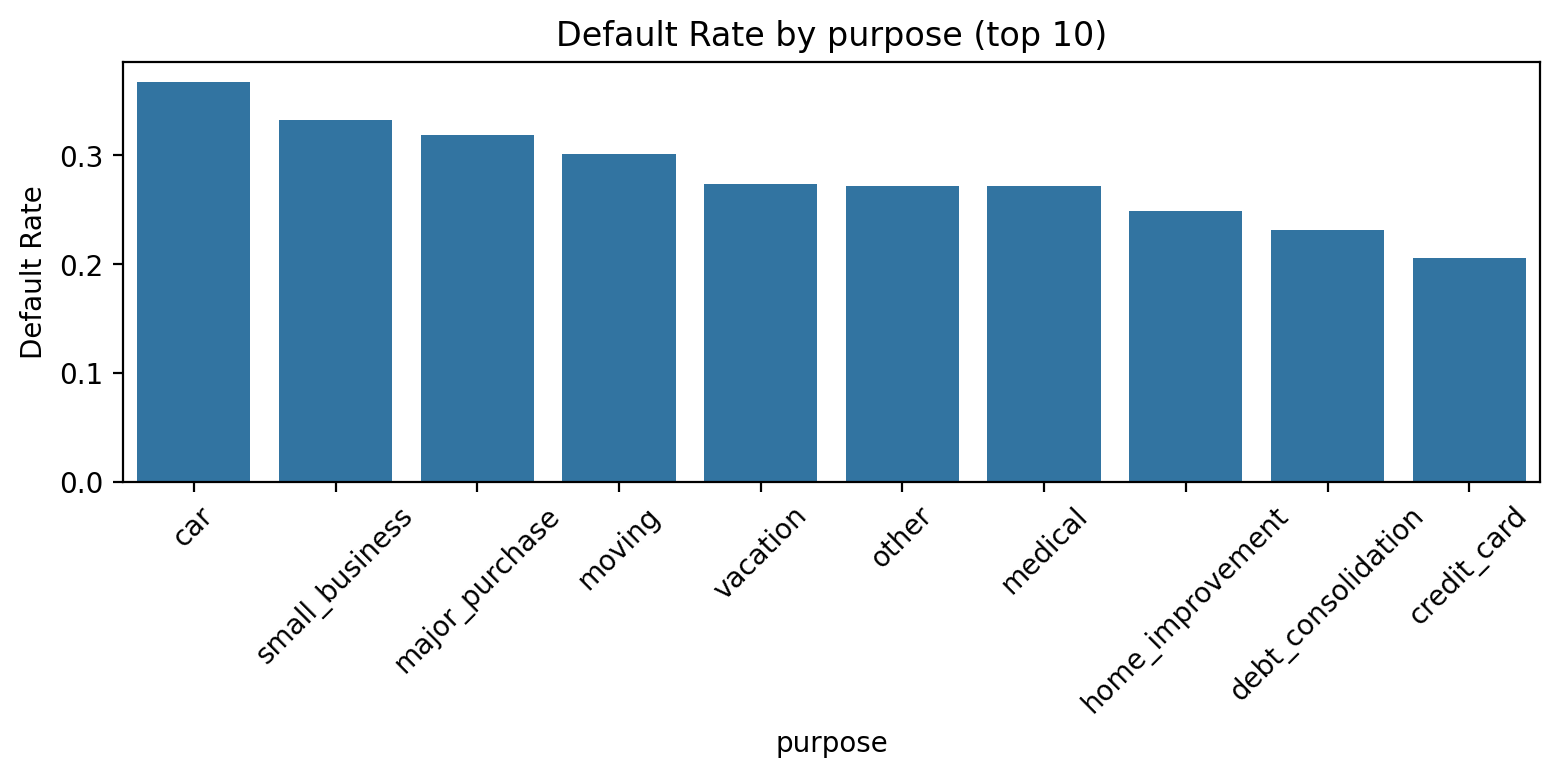


Default rate by application_type (top categories):
                      mean   count
application_type                  
INDIVIDUAL        0.236460  532123
JOINT             0.003279     305


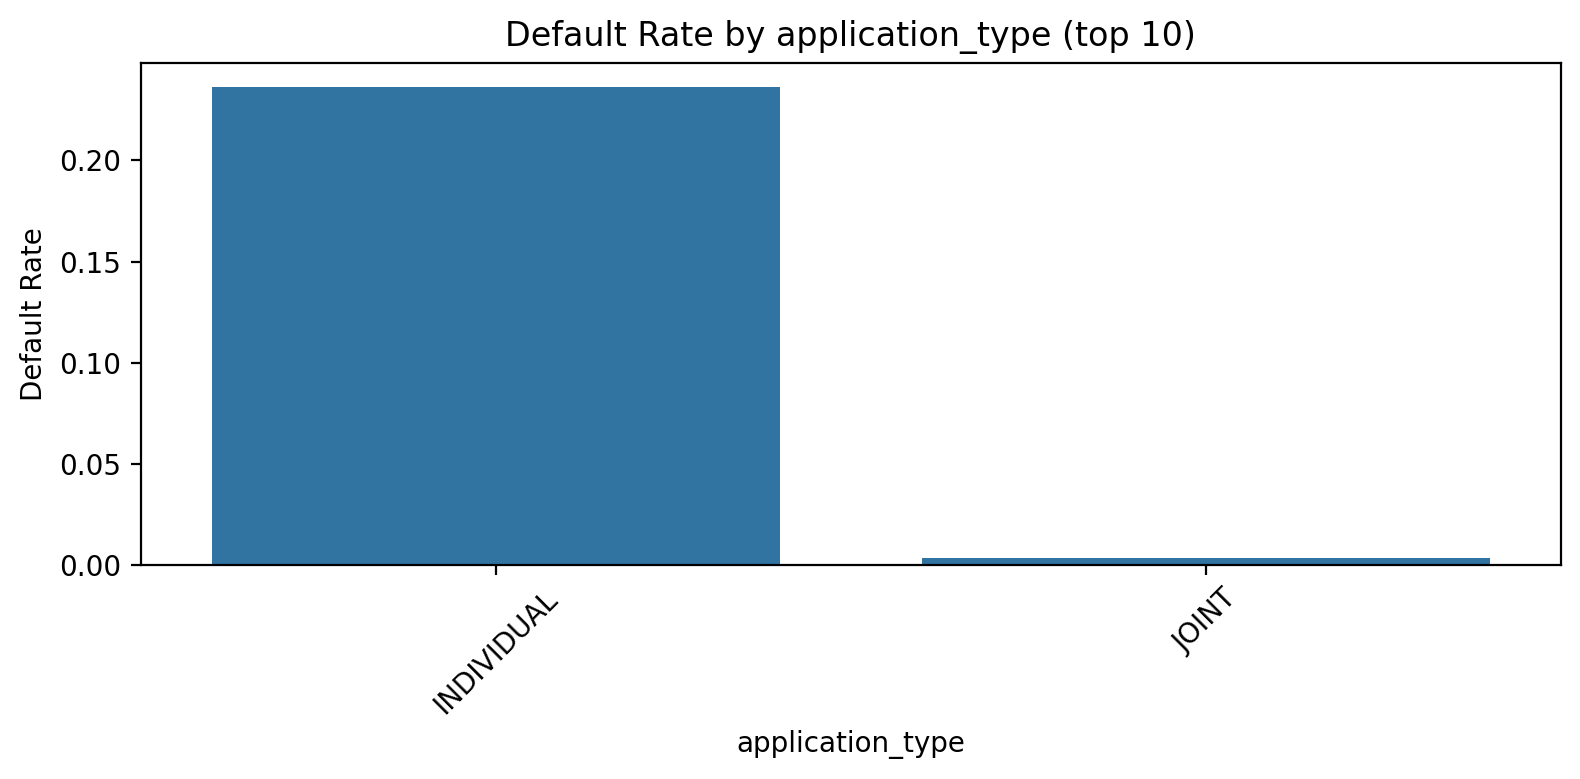


Default rate by last_week_pay (top categories):
                   mean  count
last_week_pay                 
52th week      0.218452  19391
35th week      0.195573  24037
39th week      0.193562  23796
4th week       0.171919  25704
26th week      0.152211  27475
22th week      0.136000  26000
13th week      0.117331  30333
17th week      0.116763  22036
9th week       0.107280  28626
31th week      0.087932  21437


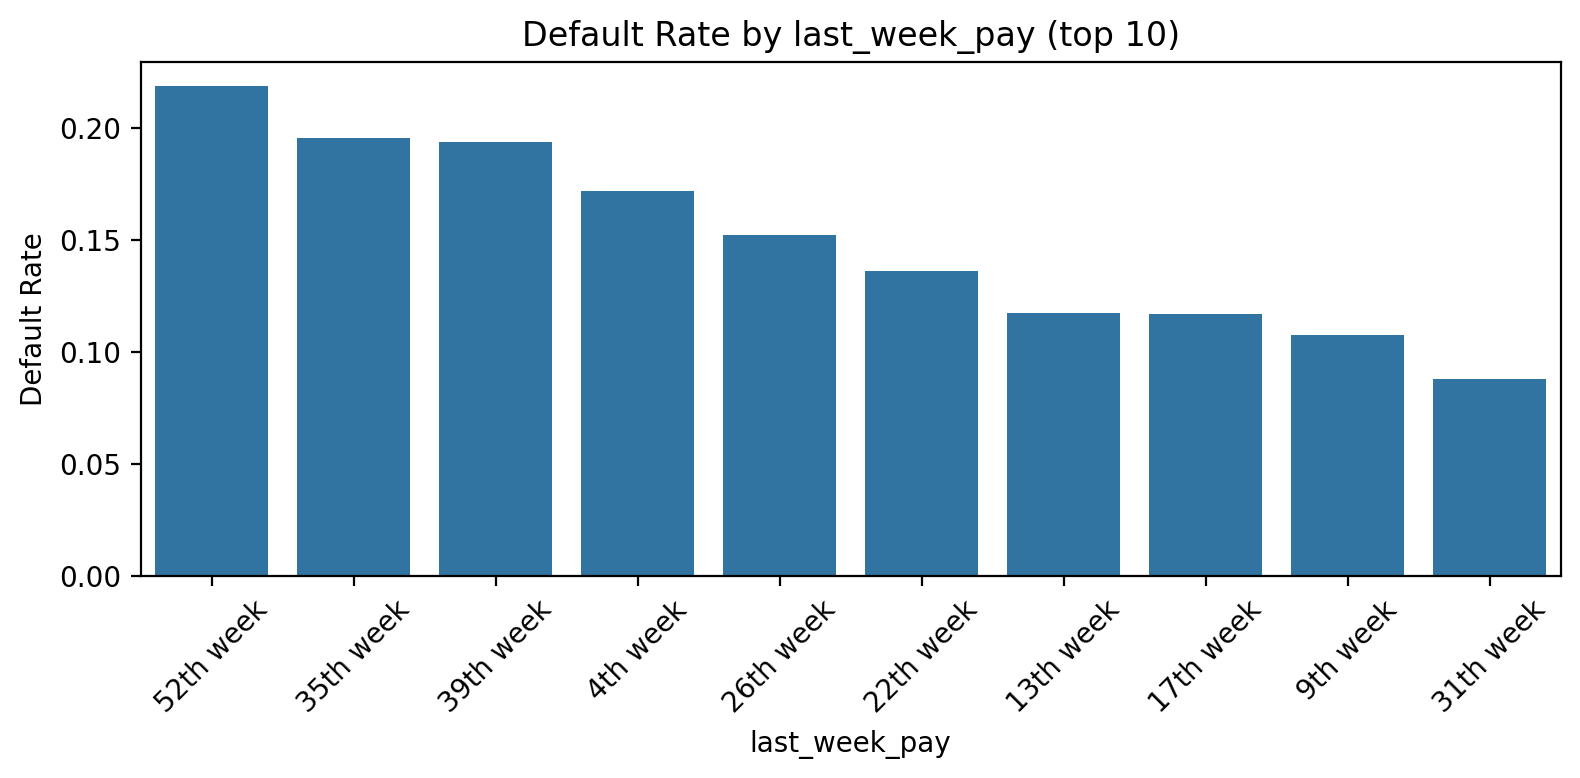

In [21]:
cat_to_plot = ['grade', 'sub_grade', 'term', 'home_ownership', 'verification_status', 'purpose', 'application_type', 'last_week_pay']
for col in cat_to_plot:
	if col not in df.columns:
		continue
	top_cats = df[col].value_counts().nlargest(10).index
	grp = df[df[col].isin(top_cats)].groupby(col)['loan_status'].agg(['mean','count']).sort_values('mean', ascending=False)
	print(f"\nDefault rate by {col} (top categories):")
	print(grp)
	plt.figure(figsize=(8,4))
	sns.barplot(x=grp.index, y=grp['mean'])
	plt.xticks(rotation=45)
	plt.ylabel("Default Rate")
	plt.title(f"Default Rate by {col} (top 10)")
	plt.tight_layout()
	plt.show()


### **Most Risky Categories**

#### **Highest Default Rates:**
1. **Home Ownership: NONE** - 77.8% (extremely high but small sample)
2. **Home Ownership: OTHER** - 76.9% (very high, small sample)
3. **Car loans** - 36.7%
4. **Small Business** - 33.3%
5. **Major Purchase** - 31.8%

#### **Safest Categories:**
1. **Joint Applications** - 0.3% (extremely low!)
2. **60-month term** - 15.1%
3. **Source Verified** - 18.4%
4. **OWN home ownership** - 20.7%

---

### **Key Insights by Category**

#### **1. Home Ownership (Most Surprising)**
- **NONE/OTHER/ANY** have catastrophic default rates (33-78%) but very small samples
- **RENT** and **MORTGAGE** have identical risk (~24%)
- **OWN** is actually the safest (20.7%) - counter-intuitive!

#### **2. Application Type (Most Dramatic Difference)**
- **JOINT** applications are incredibly safe (0.3% default)
- **INDIVIDUAL** applications are 72x riskier (23.6%)
- *This suggests joint applicants may have stronger financial stability*

#### **3. Loan Purpose**
- **Car, Small Business, Major Purchases** are highest risk
- **Debt Consolidation** and **Credit Card** refinancing are medium risk
- Lenders should price these purposes differently

#### **4. Verification Status**
- **Not Verified** borrowers are highest risk (28.1%)
- **Source Verified** are most reliable (18.4%)
- *Verification process is working effectively*

#### **5. Loan Term (Counter-Intuitive)**
- **36-month** loans are much riskier (27.3%) than **60-month** (15.1%)
- This likely reflects different borrower profiles and loan purposes by term

#### **6. Grade vs Sub-Grade Anomaly**
- **Grade A** has higher default rate than **Grade B** (26.9% vs 26.3%) - this is unusual!
- Within sub-grades: **B3, B2, B4** are riskier than many lower grades
- *Suggests the grading model may need recalibration*

#### **7. Payment History**
- Later weeks (**52th, 35th, 39th**) have higher default rates
- Earlier weeks have lower risk
- *Could indicate seasonal patterns or borrower fatigue*

---

### **Business Recommendations**

1. **Promote Joint Applications** - they're dramatically safer
2. **Review Grading Model** - the risk order is inverted in places
3. **Adjust Pricing** for high-risk purposes (car, business, major purchases)
4. **Focus Verification** resources on highest-risk segments
5. **Investigate** why shorter-term loans are riskier

The **grade/sub-grade inconsistency** is particularly important - your A-grade loans are performing worse than B-grades, which indicates a potential issue with your risk rating system that needs immediate attention.

In [22]:
df.term.unique()

array(['36 months', '60 months'], dtype=object)

In [23]:
sum(df.loan_amnt), sum(df.funded_amnt), sum(df.funded_amnt_inv)

(7857357175, 7850262875, 7829314711.096795)

### **Last total payment amount received - amount of loan**

In [24]:
df['total_amount_to_be_paid'] = df.apply(lambda row: (row['loan_amnt'] * (((row['int_rate']/100)/12) * (1 + ((row['int_rate']/100)/12))**(int(row['term'].split()[0]))) / (((1 + ((row['int_rate']/100)/12))**(int(row['term'].split()[0]))) - 1)) * int(row['term'].split()[0]) if (row['int_rate']/100)/12 != 0 else row['loan_amnt'], axis=1)


In [25]:
df['total_amount_to_be_paid'].sum()

10262209048.68738

## **Univariate Analysis (Numerical Features)**

### **Histogram**

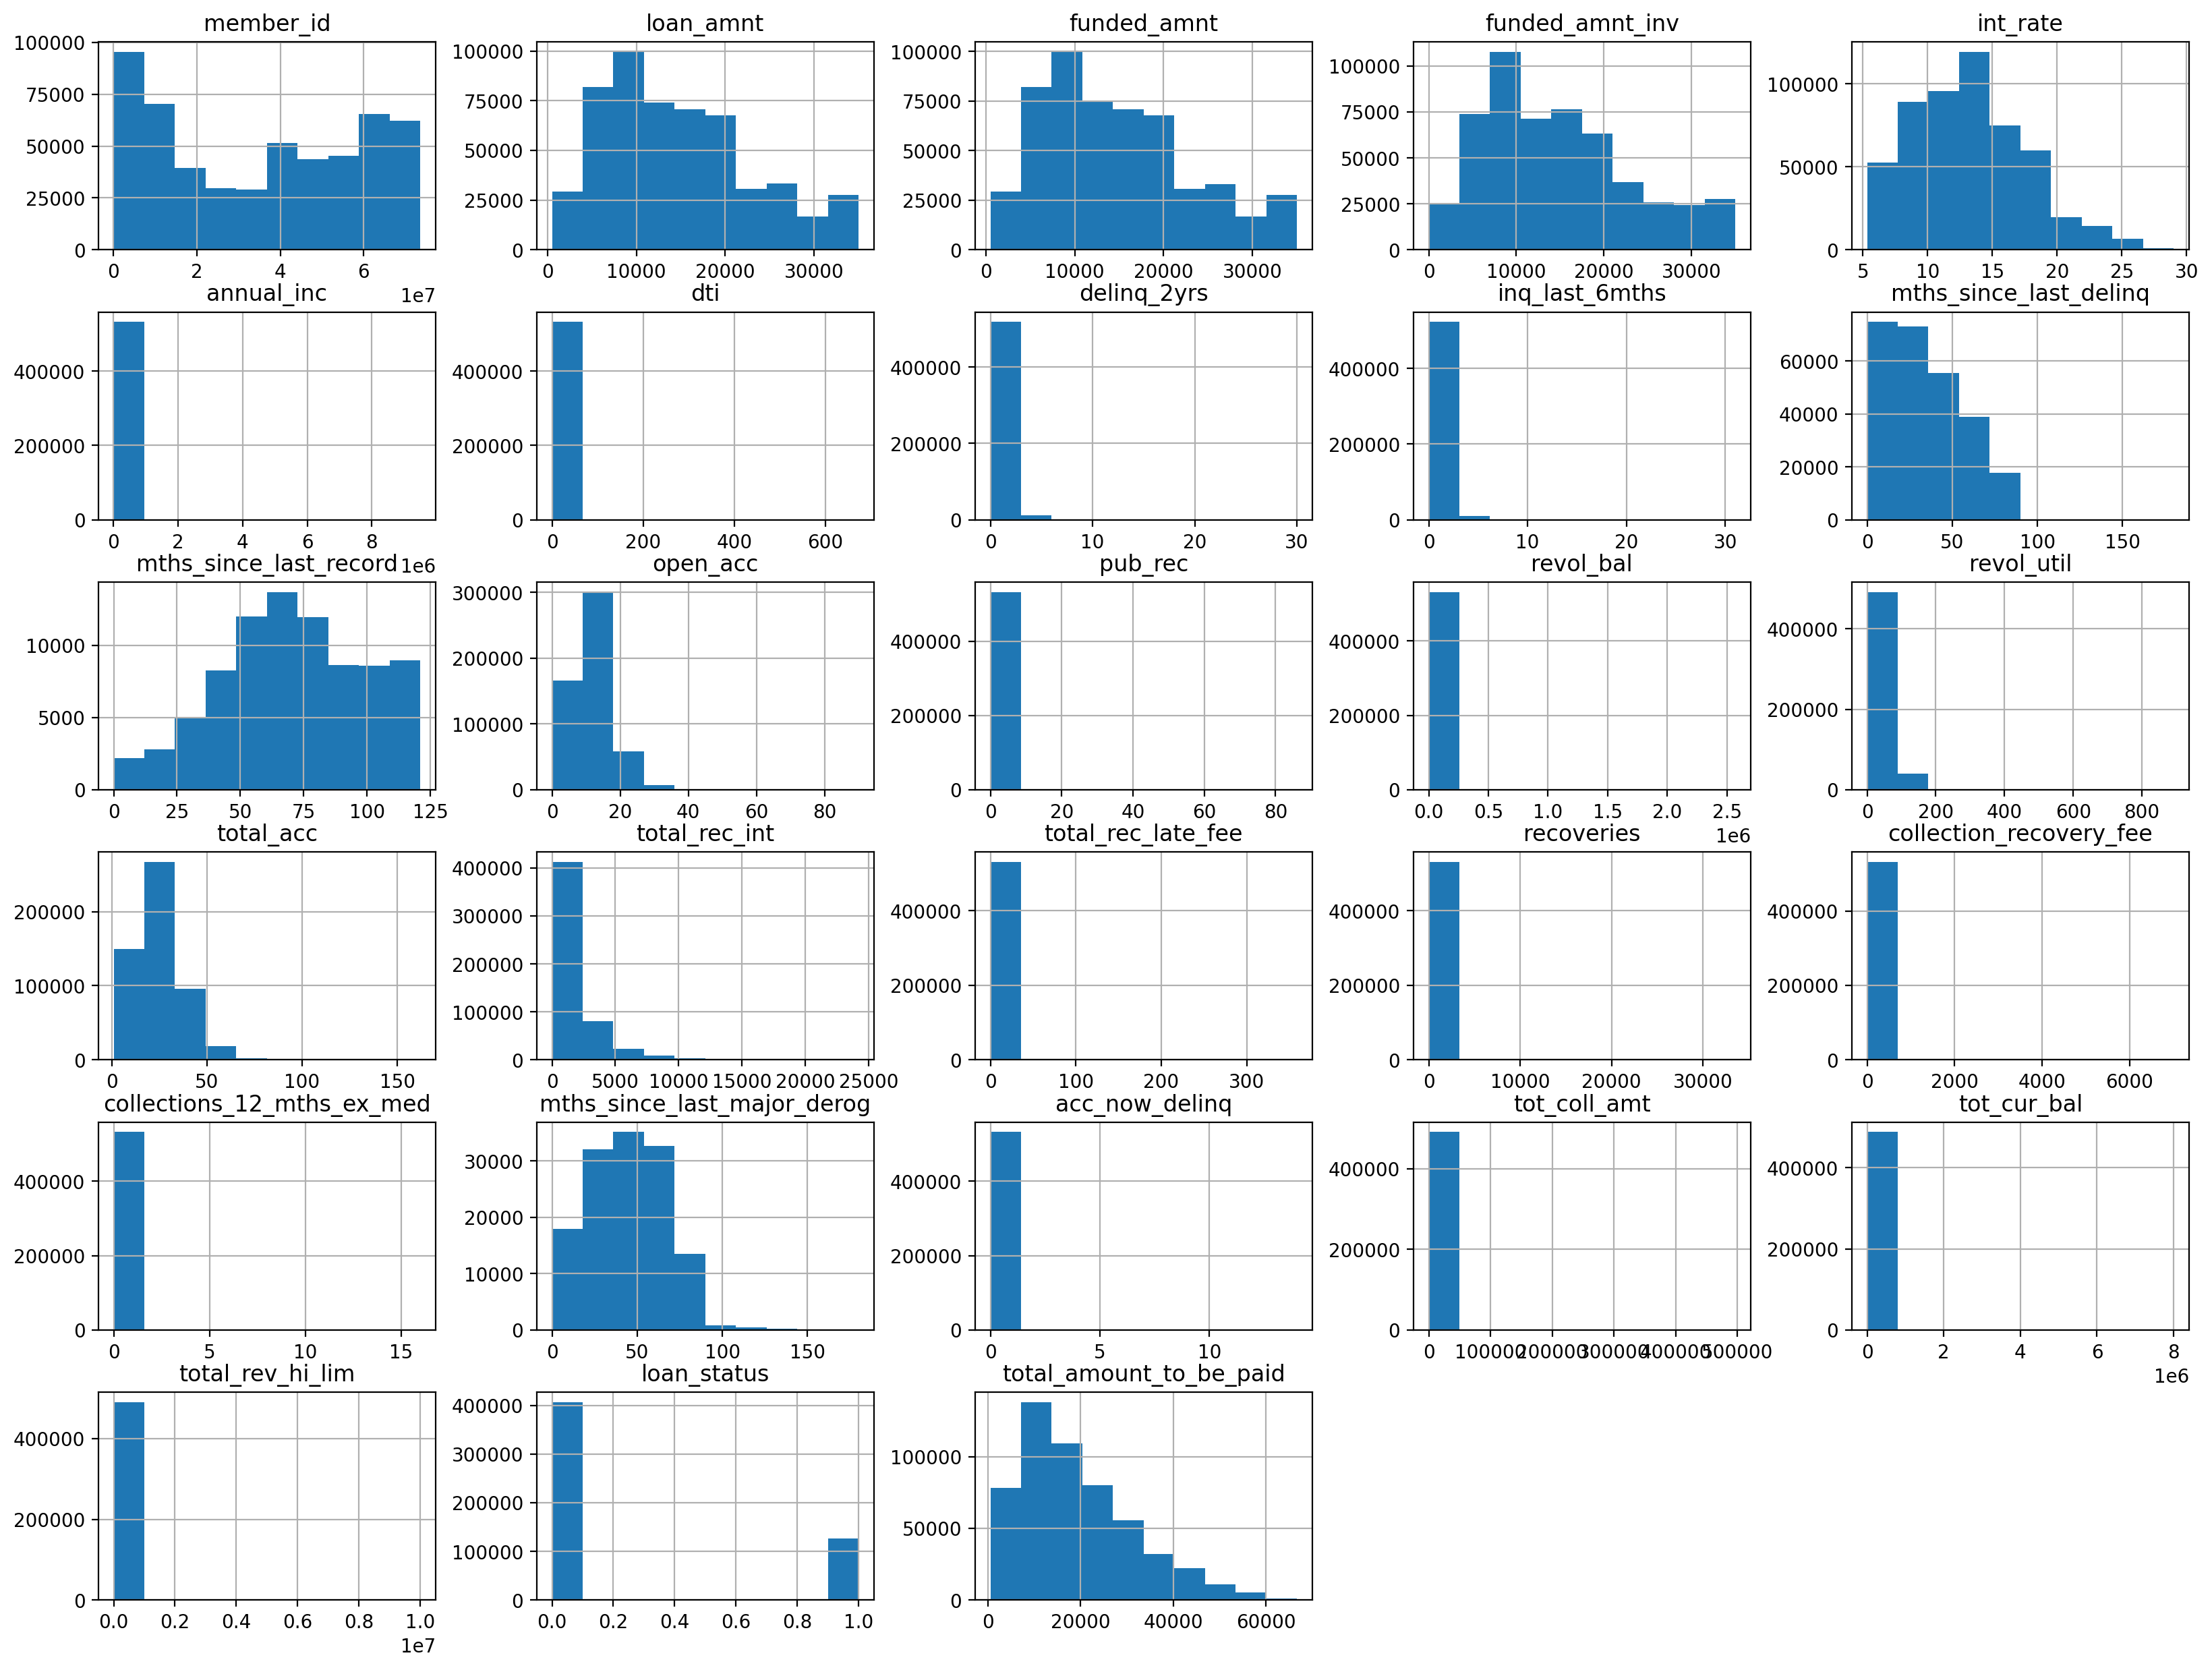

In [26]:
df.hist(figsize=(20,15))
plt.show()

**1. member_id**
- Uniform distribution across values
- Just an identifier with no predictive power - should be dropped

**2. loan_amnt, funded_amnt, funded_amnt_inv**
- Concentrated between $5k-$20k with tail to $35k+
- Most borrowers take small-medium loans
- Right-skewed - may need log-transform for linear models

**3. int_rate**
- Bell-shaped distribution between 7%-25%
- Strong predictor as proxy for creditworthiness

**4. annual_inc**
- Extreme right skew with most under $150k
- Benefits from log-transform or winsorizing

**5. dti**
- Spike at 0 and extreme values
- Requires cleanup of unrealistic tails

**6. delinq_2yrs, inq_last_6mths, pub_rec**
- Tall spike at 0, few higher values
- Sparse but high predictive power

**7. mths_since_last... variables**
- Many zeros/missing with spread to 150 months
- Suggest creating binary "has_default_history" feature

**8. open_acc, total_acc**
- Range 5-25 accounts typically
- Both very low and very high counts indicate risk

**9. revol_bal, revol_util**
- Right-skewed balances
- High utilization (>80%) strong risk indicator

**10. total_rec_int, total_rec_late_fee, recoveries**
- Mostly zeros with some extremes
- Highly predictive when non-zero

**11. acc_now_delinq**
- Almost all zeros
- Even value of 1 is major red flag

**12. tot_coll_amt, tot_cur_bal, total_rev_hi_lim**
- Extreme right skew with long tails
- Require careful handling of outliers

**13. loan_status (target)**
- Heavy class imbalance
- Requires AUC/precision-recall metrics

**Key Data Characteristics:**
- Heavy right-skew in financial variables
- Sparse but predictive delinquency features
- Extreme outliers present
- Severe class imbalance
- Non-linear relationships

**Modeling Recommendations:**
- Tree models handle this data structure well
- Log-transform/winsorize skewed variables
- Create missingness indicators
- Use AUC/recall/F1 instead of accuracy

### **BOXPLOT**

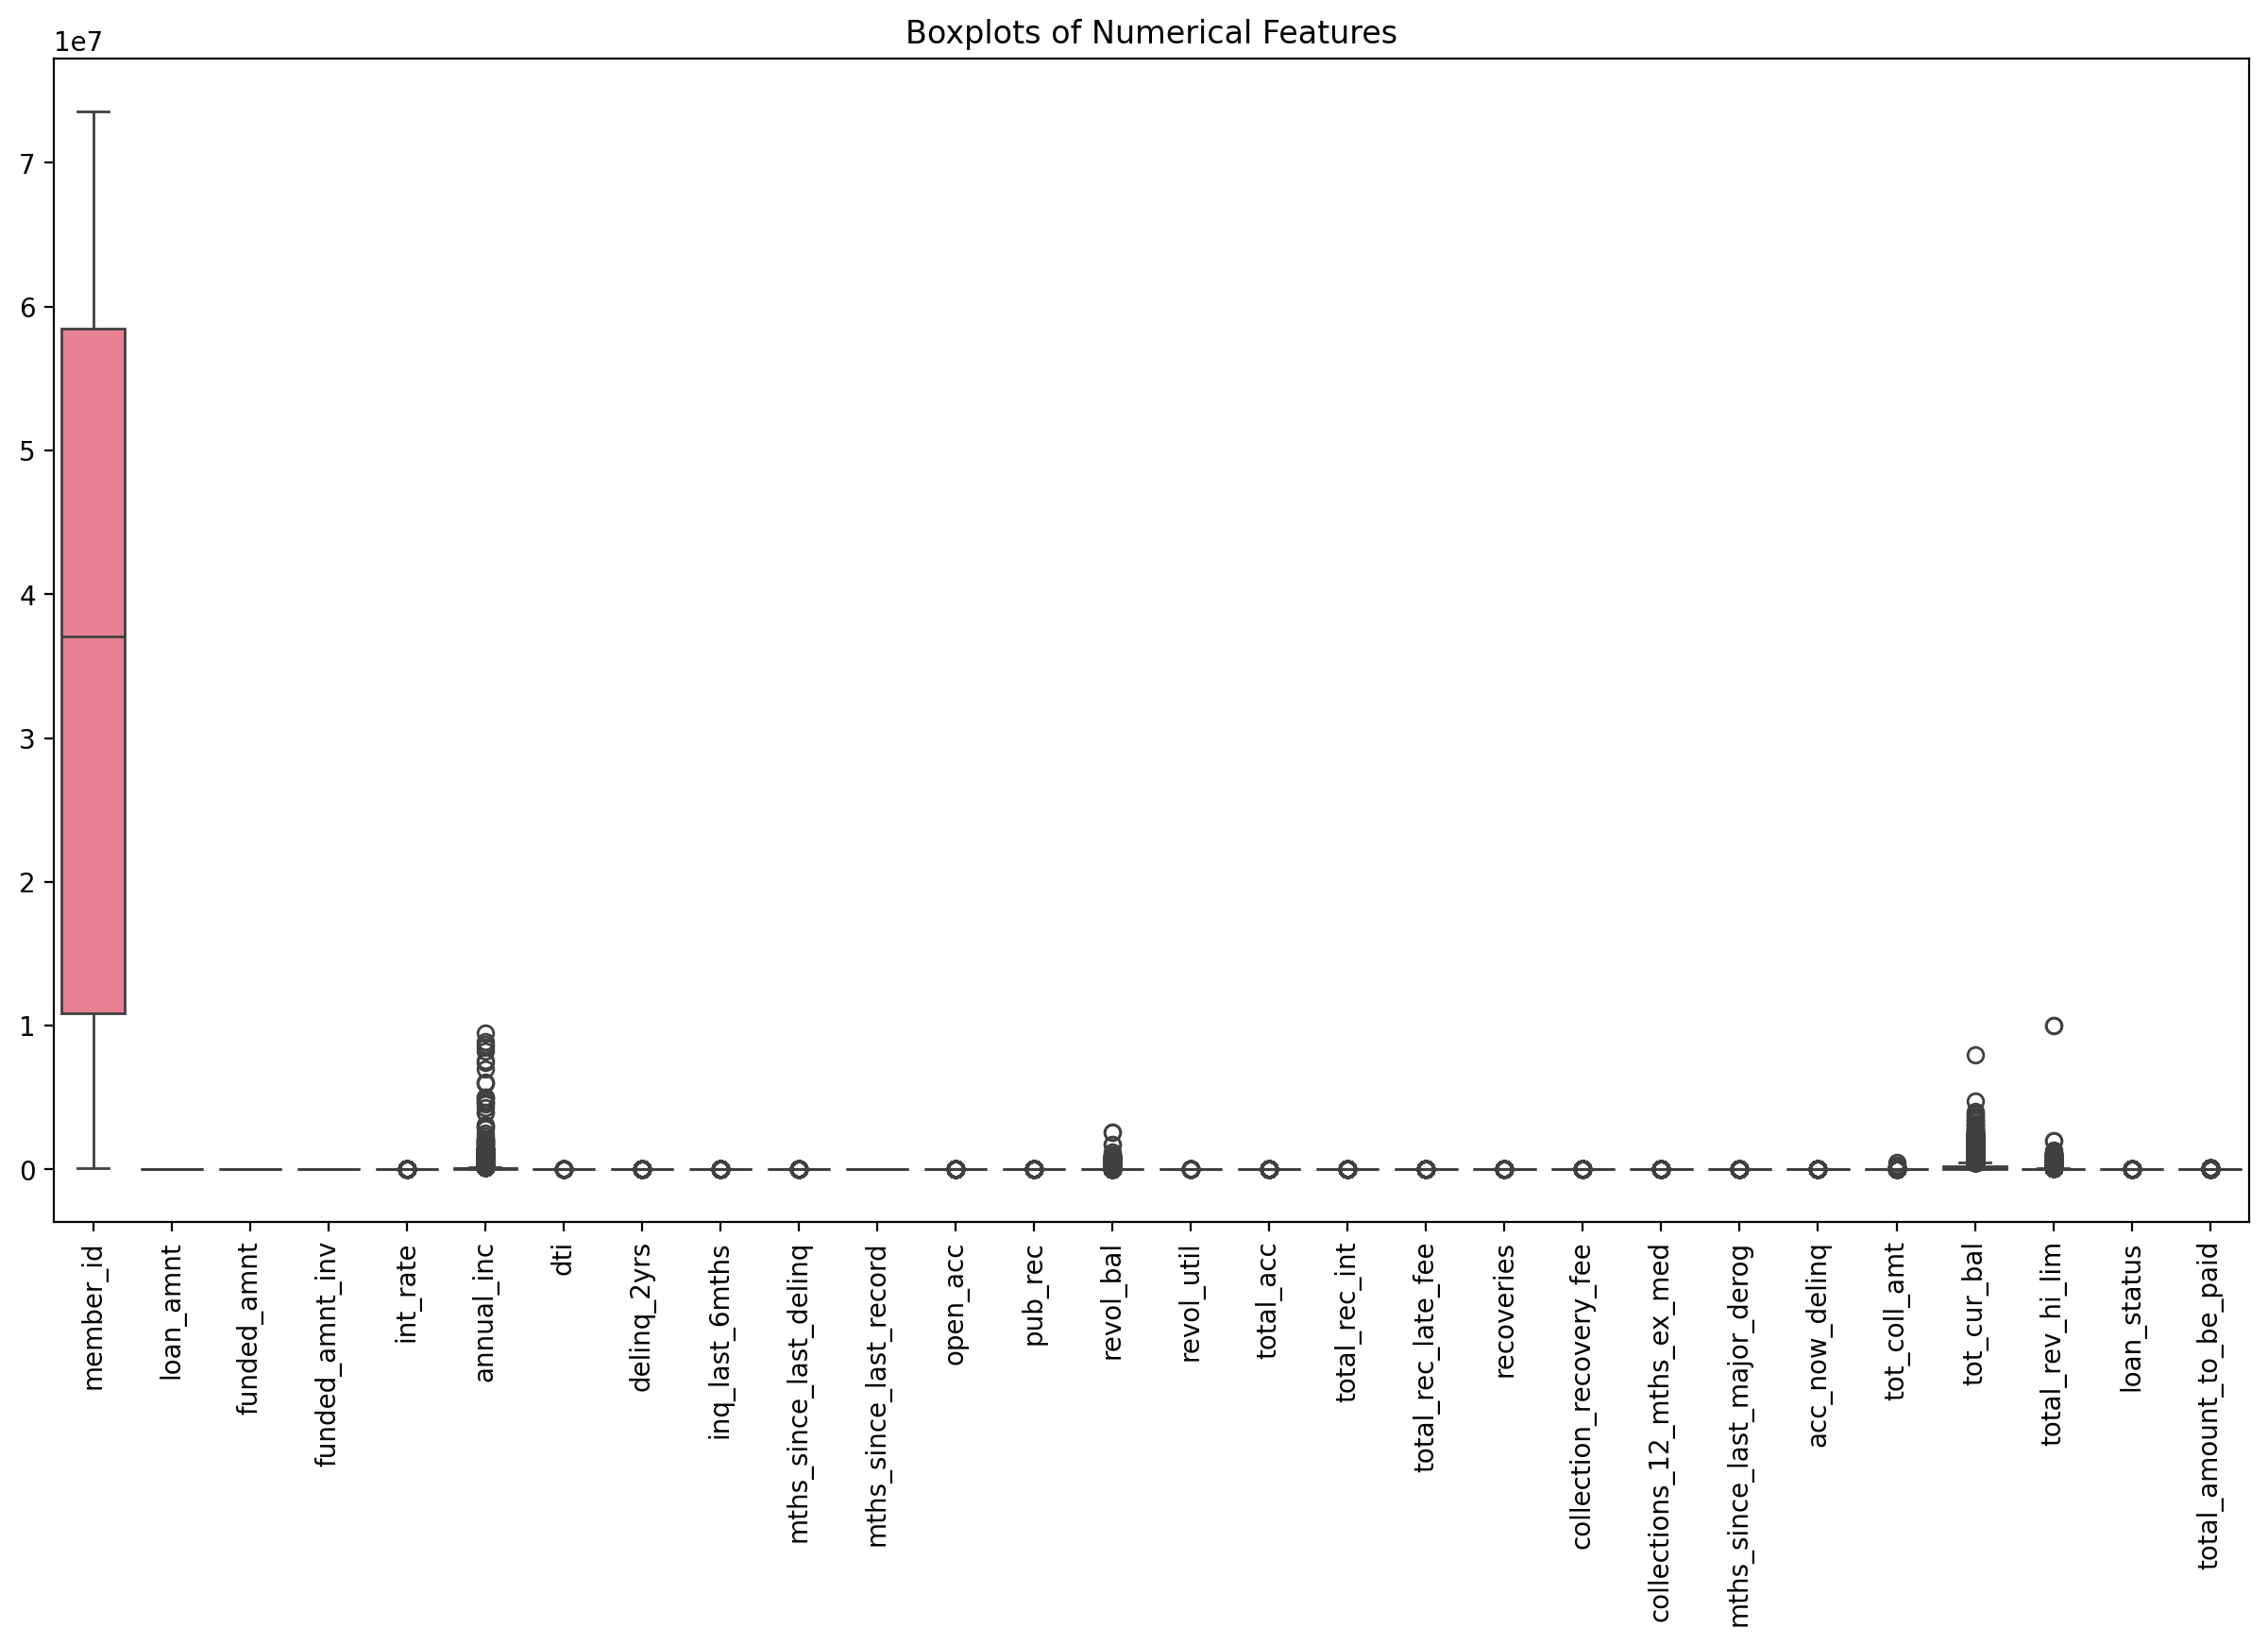

In [27]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title("Boxplots of Numerical Features")
plt.show()

### **Boxplot Analysis & Modeling Strategy**

**1. Extreme Scaling & Right-Skew**
The boxplots reveal massive disparities in scale. While most features are tightly clustered near zero, financial variables (like `annual_inc` and `tot_cur_bal`) exhibit extreme outliers and heavy right tails.

**2. Sparse but Critical Signals**
Risk-related features (e.g., `delinq_2yrs`, `collections`) are "zero-heavy." Although the vast majority of applicants have a value of 0, any **non-zero value** is likely a highly predictive indicator of default.

**3. Algorithm Selection**
Standard linear models (like Logistic Regression) would struggle here without aggressive scaling and transformation. Therefore, **Tree-based models (XGBoost, Random Forest, LightGBM)** are the ideal choice. They are naturally robust to outliers, handle non-linear relationships well, and do not require feature scaling.

### **Outlier Handing**

In [28]:
num_features

['member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'loan_status']

In [29]:
cat_features

['term',
 'batch_enrolled',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'initial_list_status',
 'application_type',
 'verification_status_joint',
 'last_week_pay']

In [30]:
for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_values = df[(df[col] < lower_limit) | (df[col] > upper_limit)][col]
    print(f"\nFeature: {col}")
    print(f"Number of outliers in {col}: {len(outlier_values)}")
    print(f"Lower limit: {lower_limit:.2f}")
    print(f"Upper limit: {upper_limit:.2f}")
    print(f"Min outlier value: {outlier_values.min() if not outlier_values.empty else 'None'}")
    print(f"Max outlier value: {outlier_values.max() if not outlier_values.empty else 'None'}")


Feature: member_id
Number of outliers in member_id: 0
Lower limit: -60566594.88
Upper limit: 129922678.12
Min outlier value: None
Max outlier value: None

Feature: loan_amnt
Number of outliers in loan_amnt: 0
Lower limit: -10000.00
Upper limit: 38000.00
Min outlier value: None
Max outlier value: None

Feature: funded_amnt
Number of outliers in funded_amnt: 0
Lower limit: -10000.00
Upper limit: 38000.00
Min outlier value: None
Max outlier value: None

Feature: funded_amnt_inv
Number of outliers in funded_amnt_inv: 0
Lower limit: -10000.00
Upper limit: 38000.00
Min outlier value: None
Max outlier value: None

Feature: int_rate
Number of outliers in int_rate: 3674
Lower limit: 0.68
Upper limit: 25.51
Min outlier value: 25.57
Max outlier value: 28.99

Feature: annual_inc
Number of outliers in annual_inc: 23851
Lower limit: -22500.00
Upper limit: 157500.00
Min outlier value: 157528.0
Max outlier value: 9500000.0

Feature: dti
Number of outliers in dti: 53
Lower limit: -6.10
Upper limit: 41

In [31]:
non_integer_floats_col2 = df[df['member_id'].apply(lambda x: not float(x).is_integer())]['member_id']
print("Non-integer floats in 'member_id':\n", non_integer_floats_col2)

Non-integer floats in 'member_id':
 Series([], Name: member_id, dtype: int64)


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

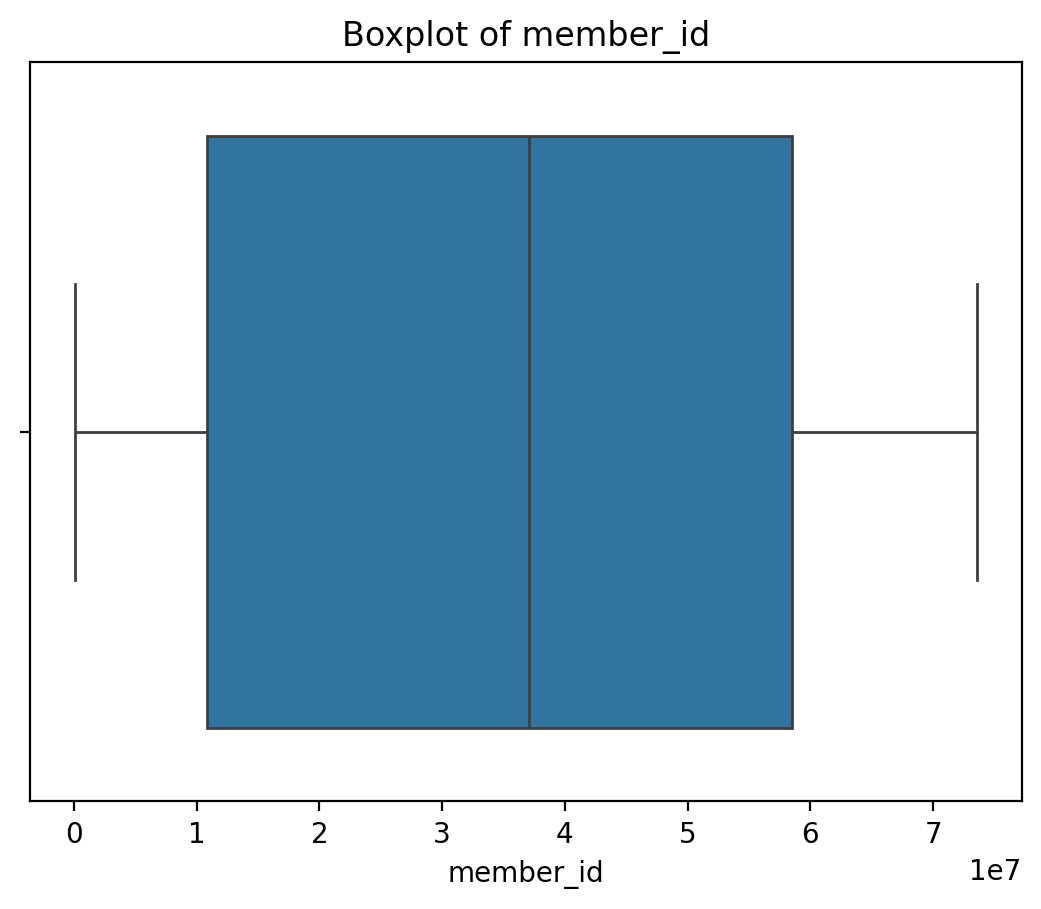

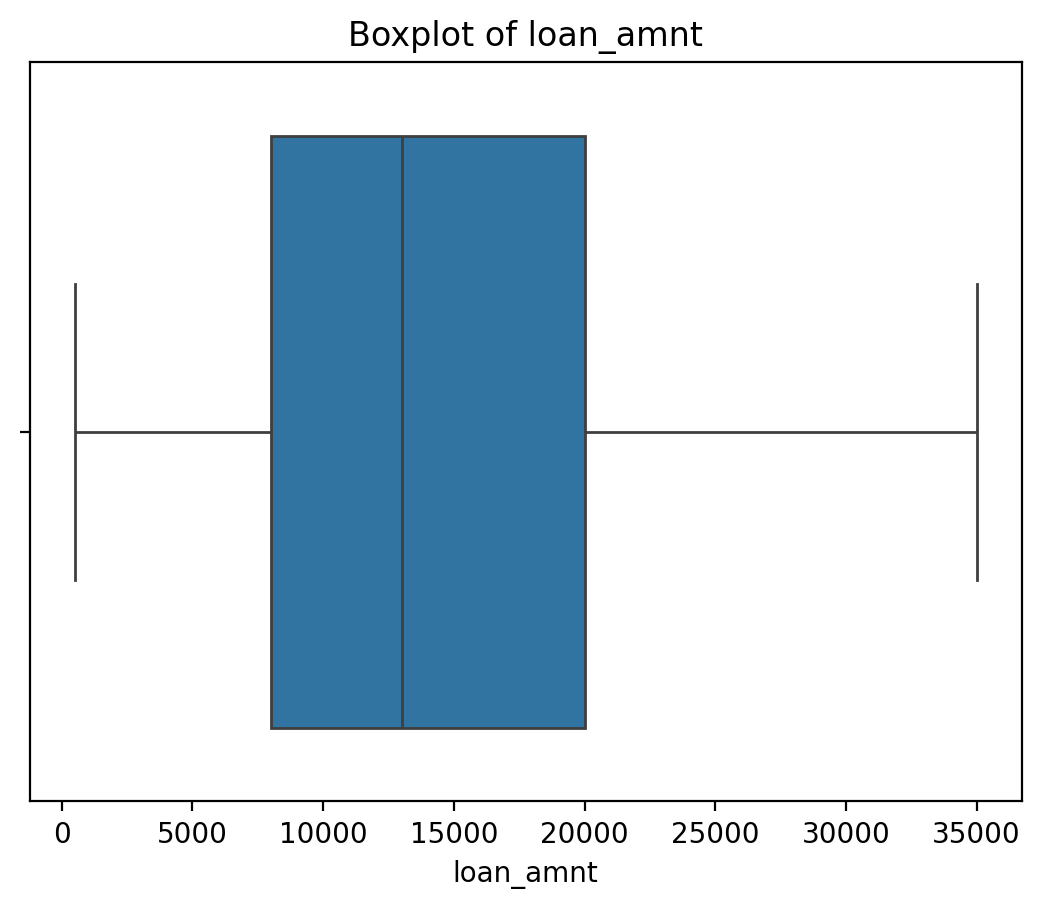

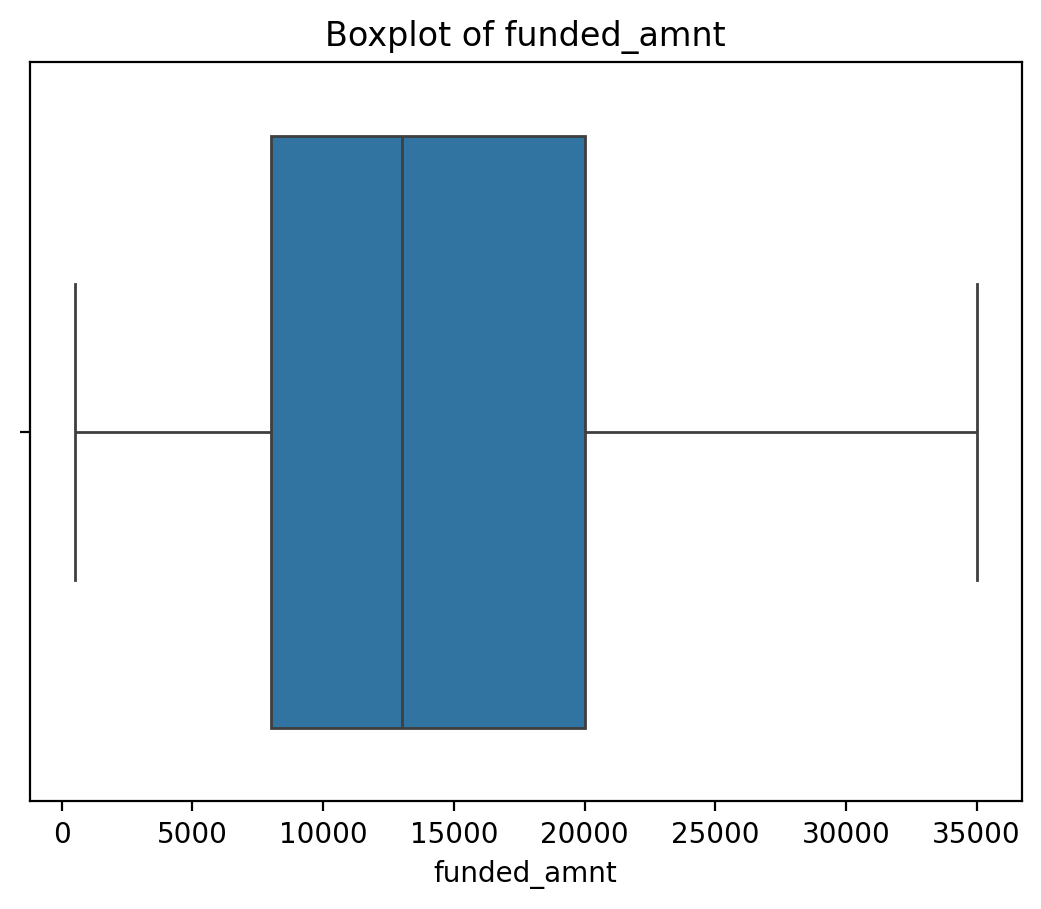

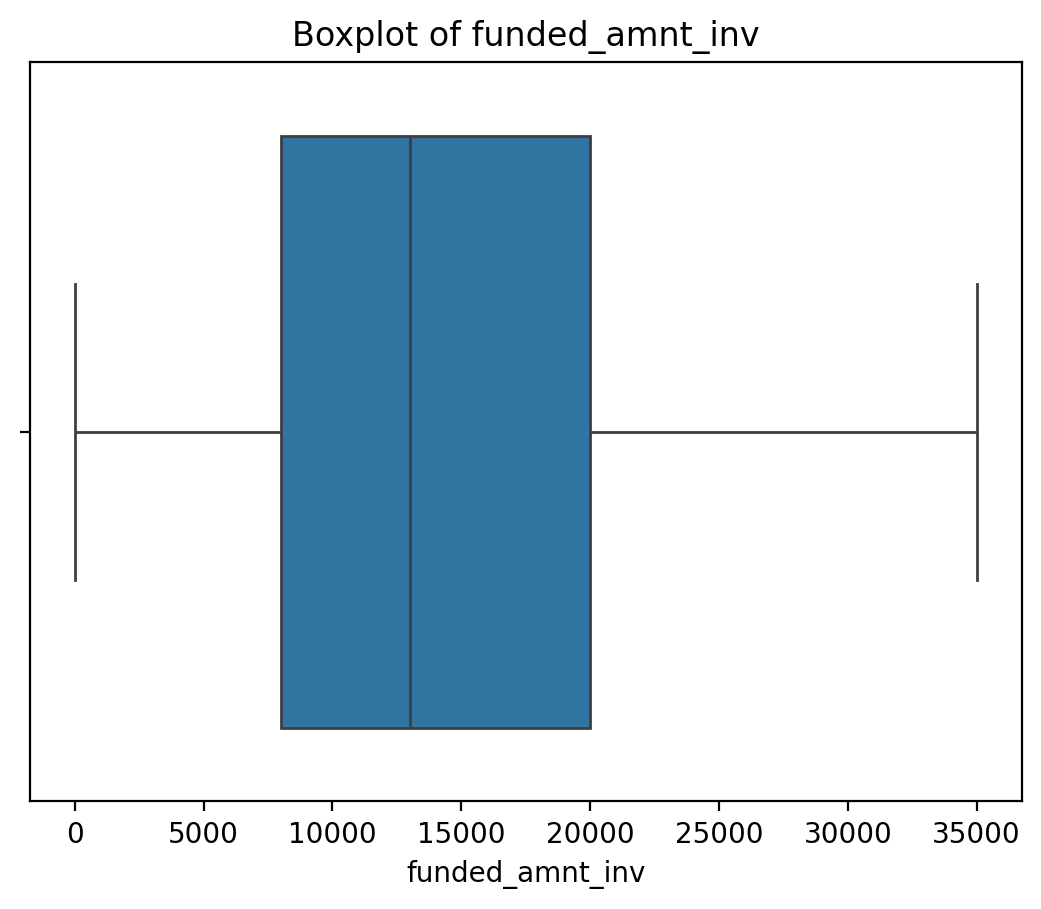

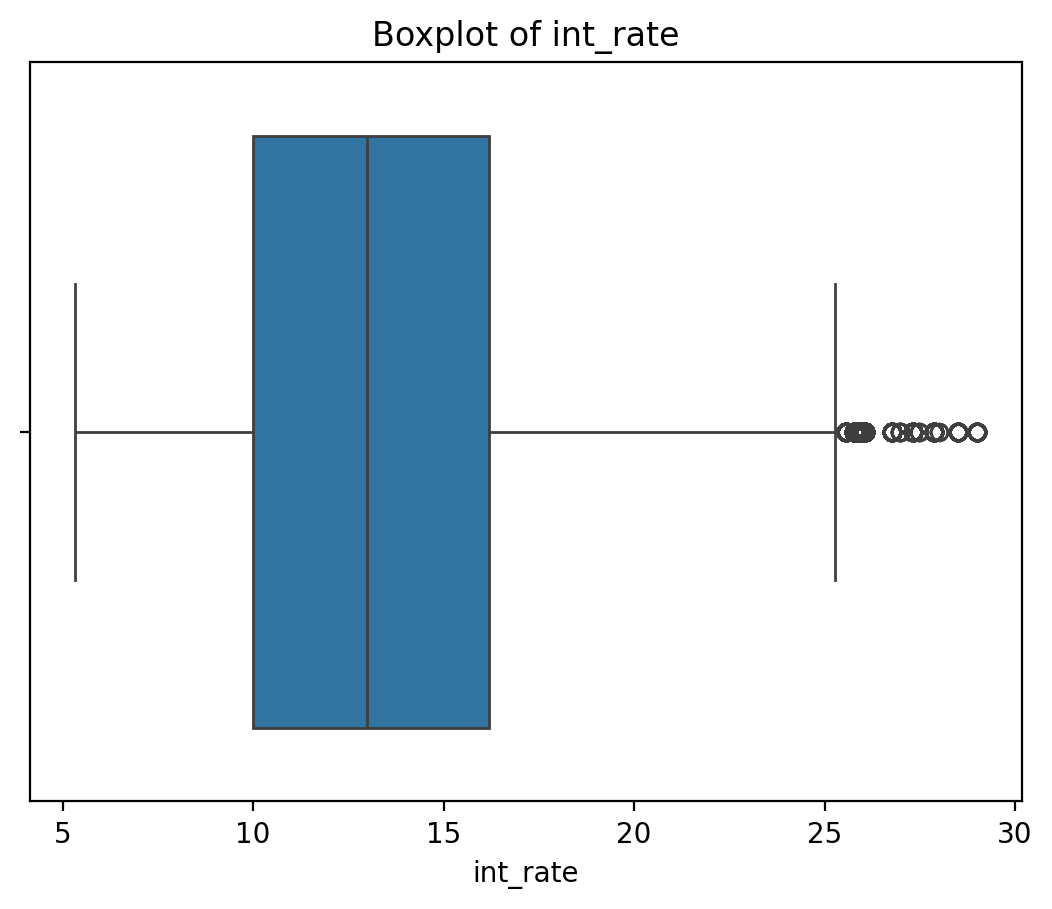

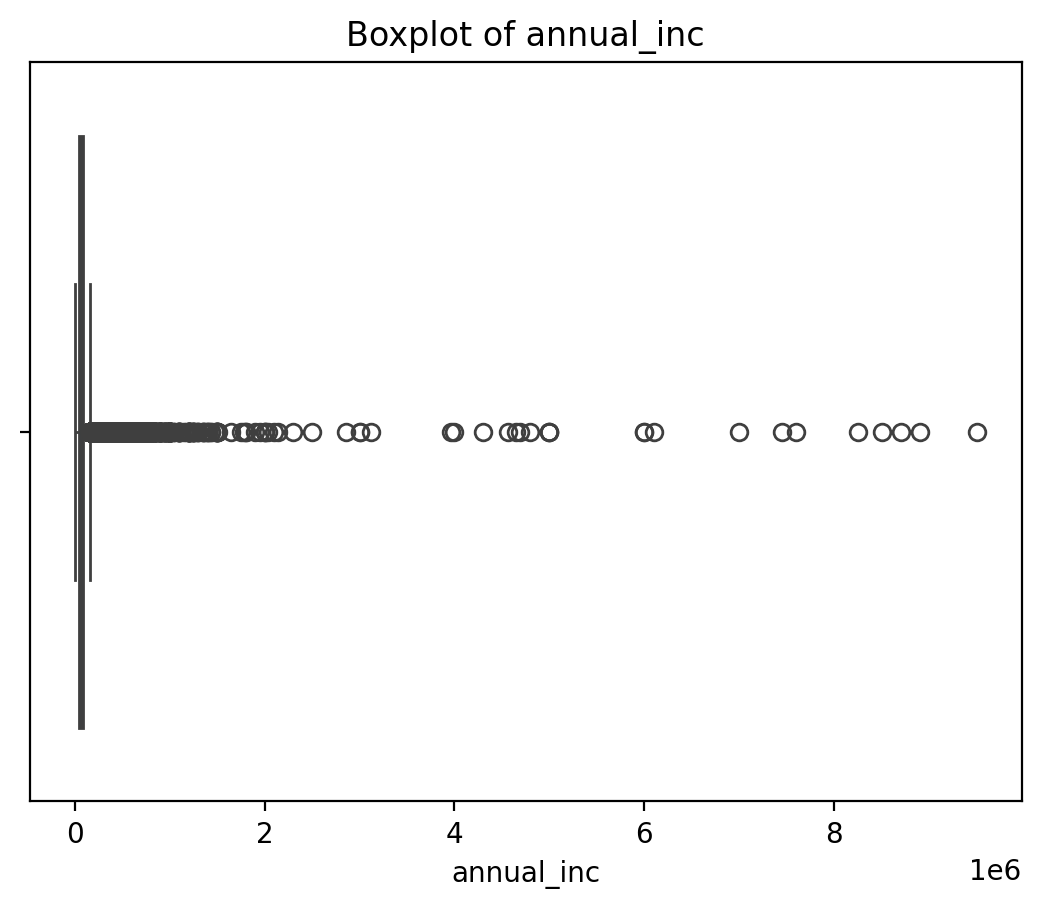

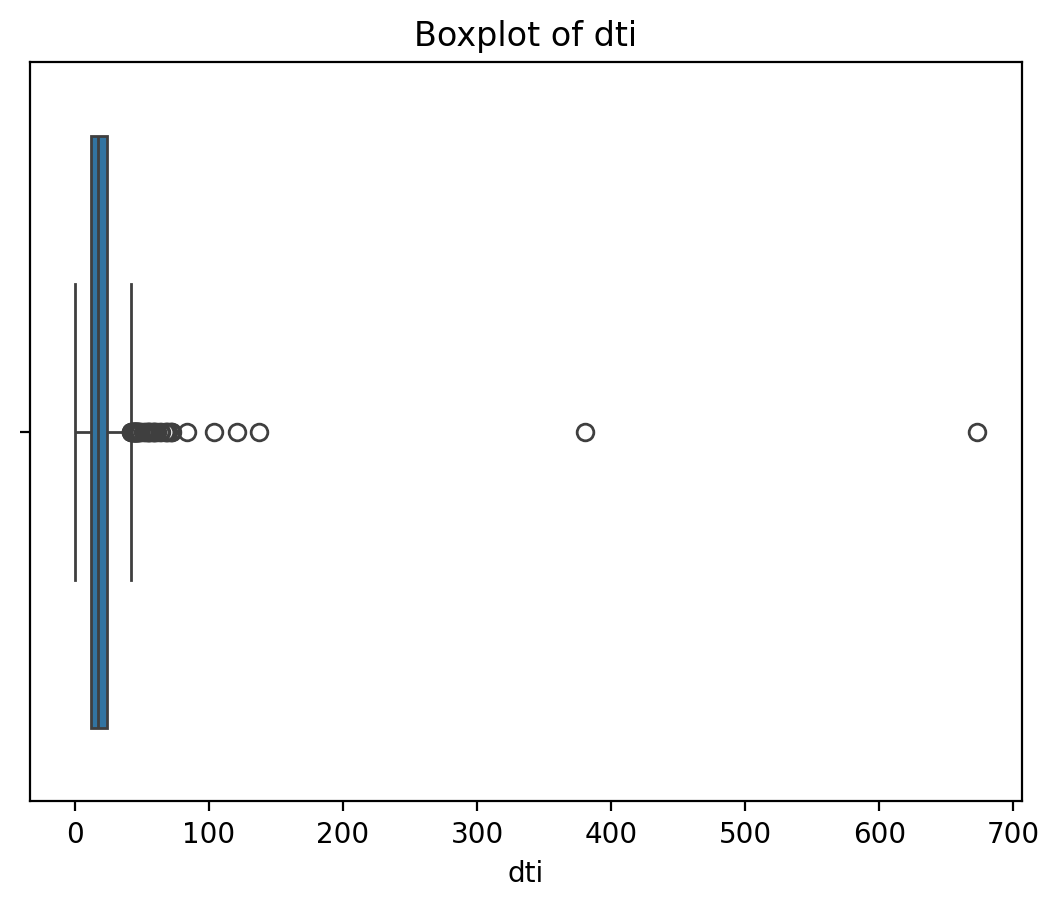

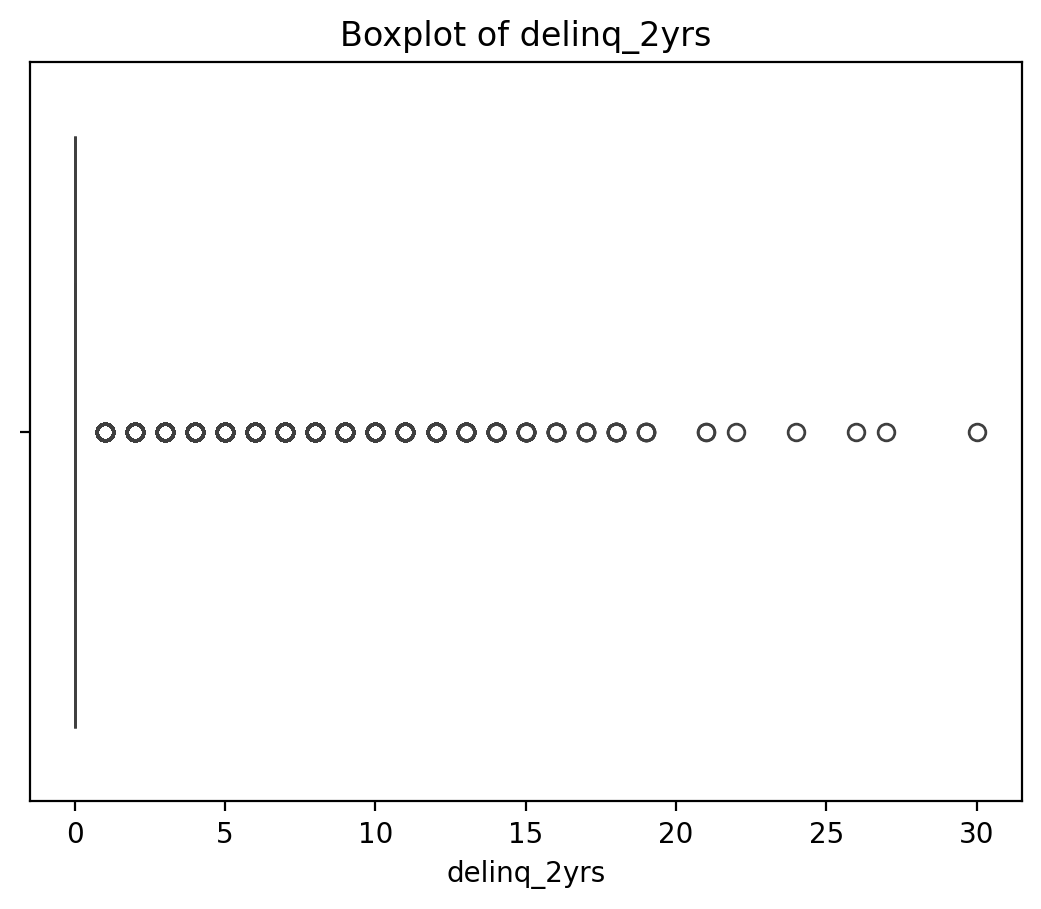

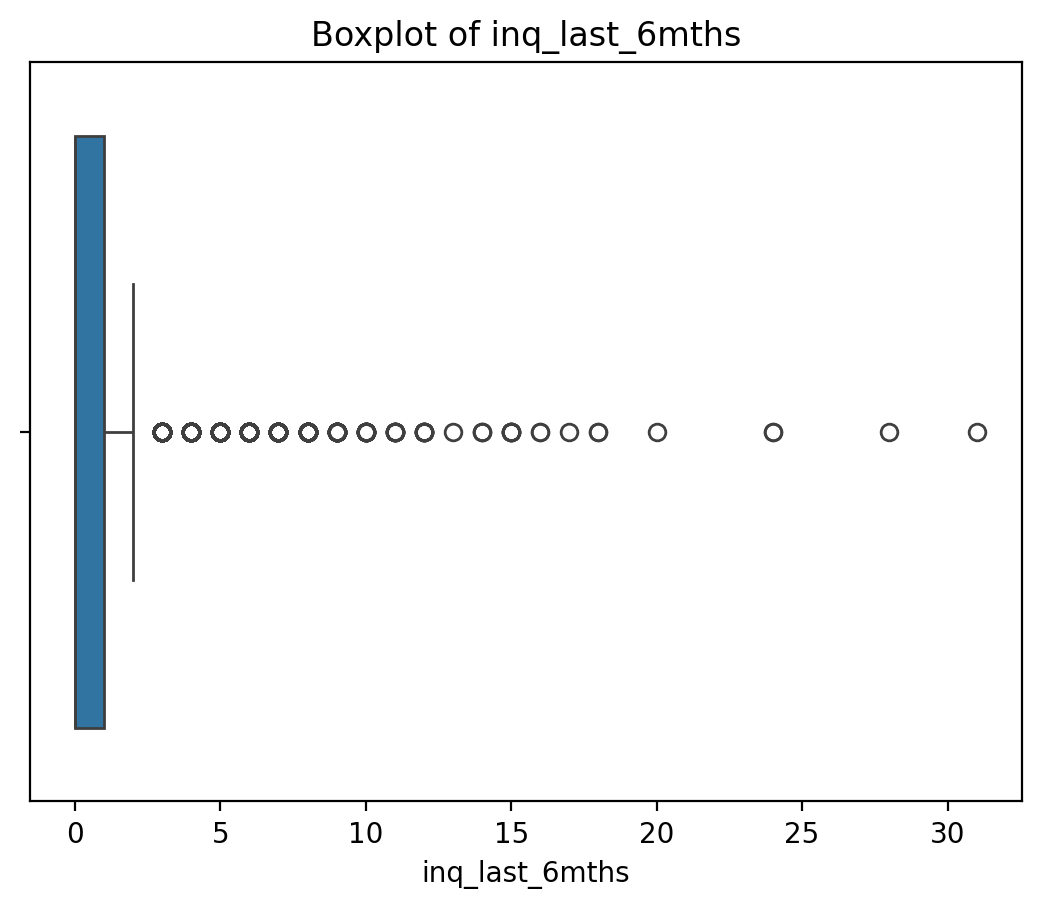

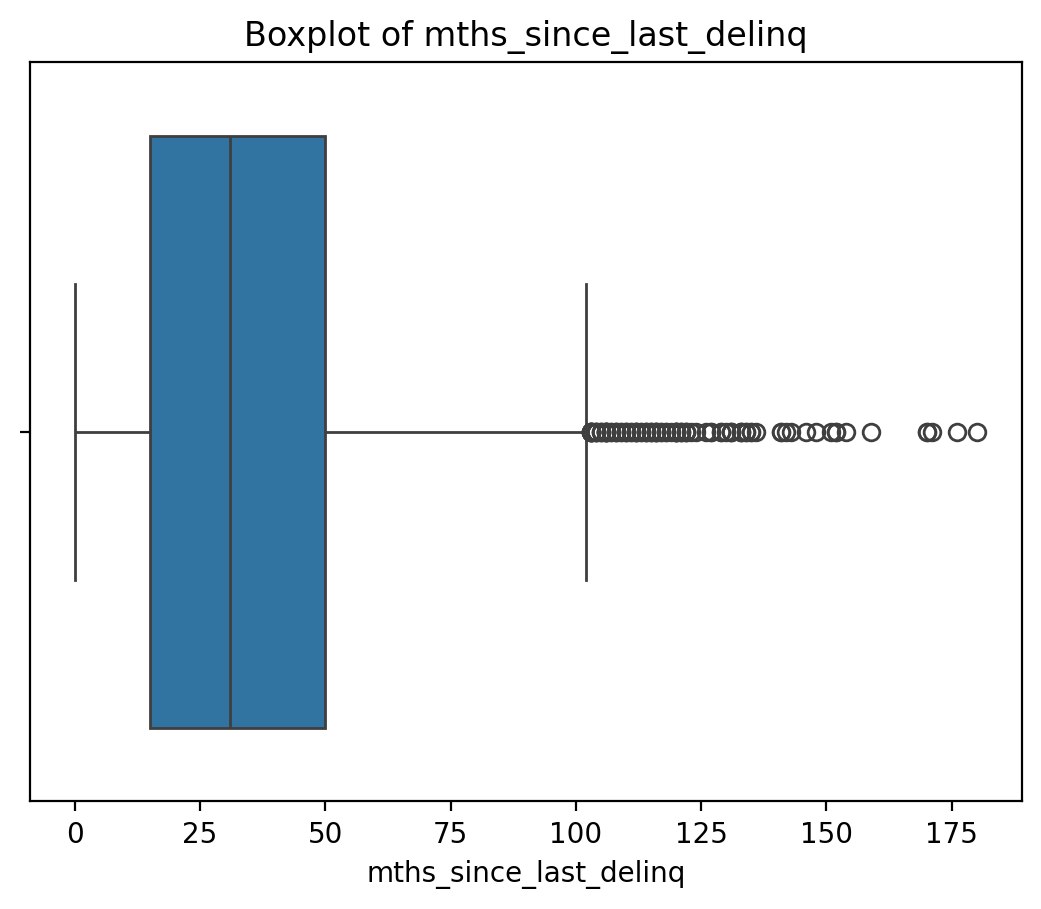

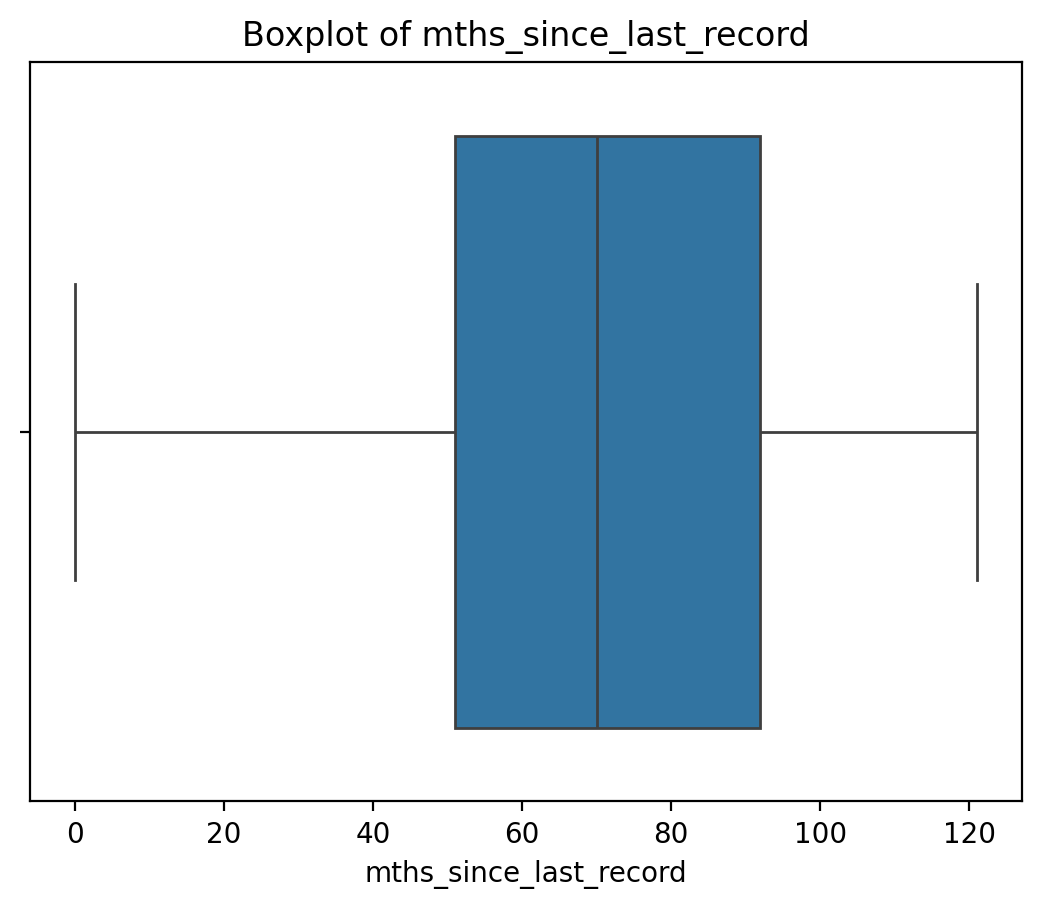

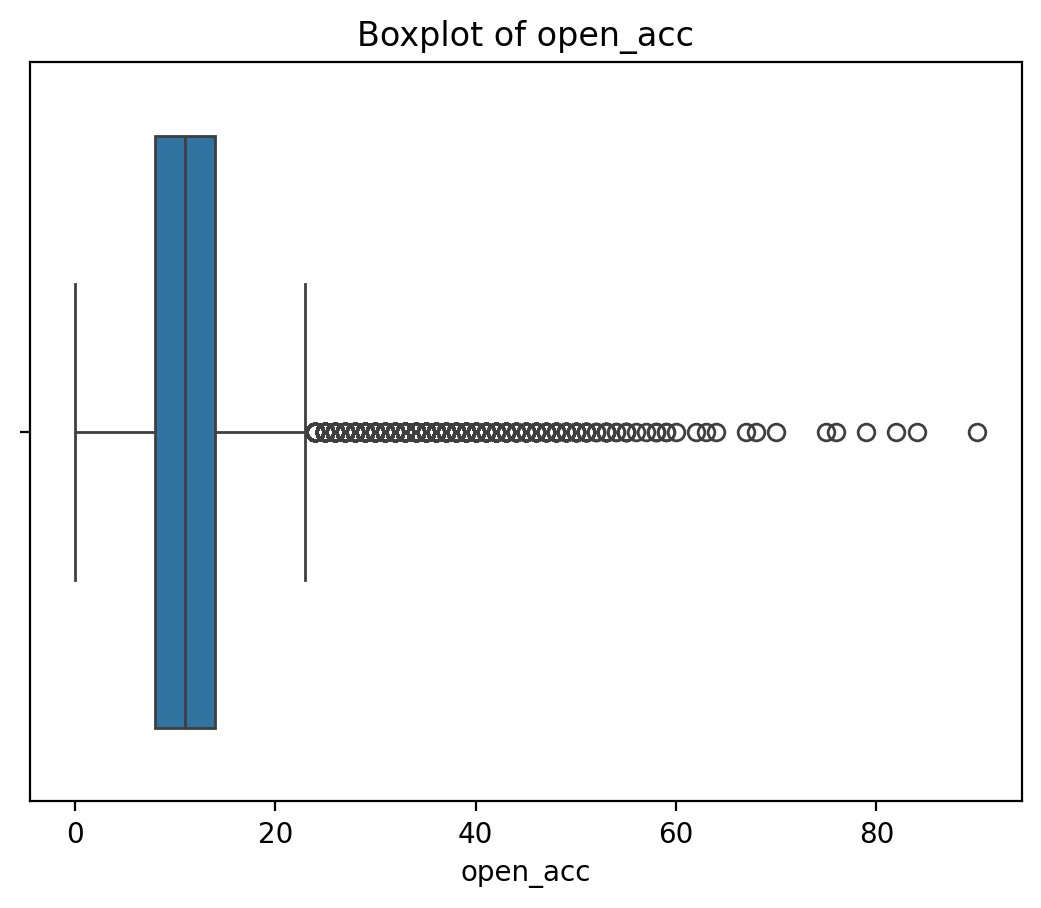

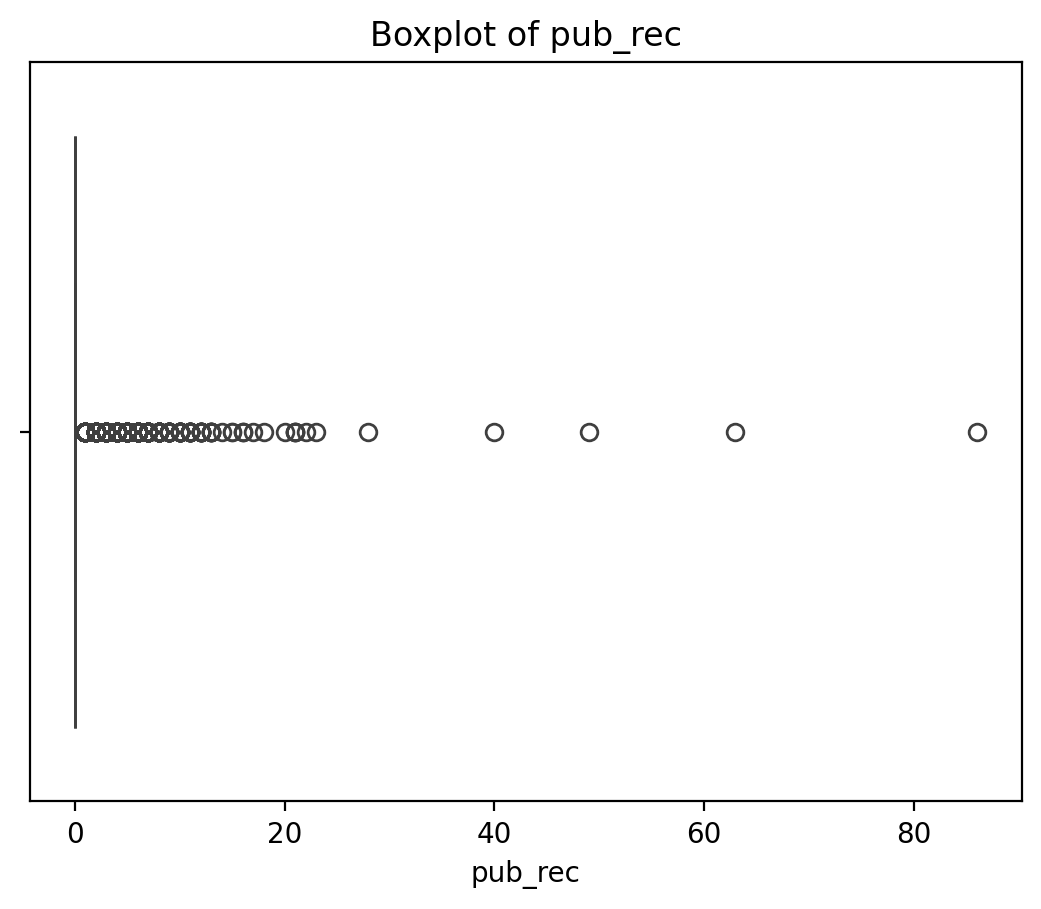

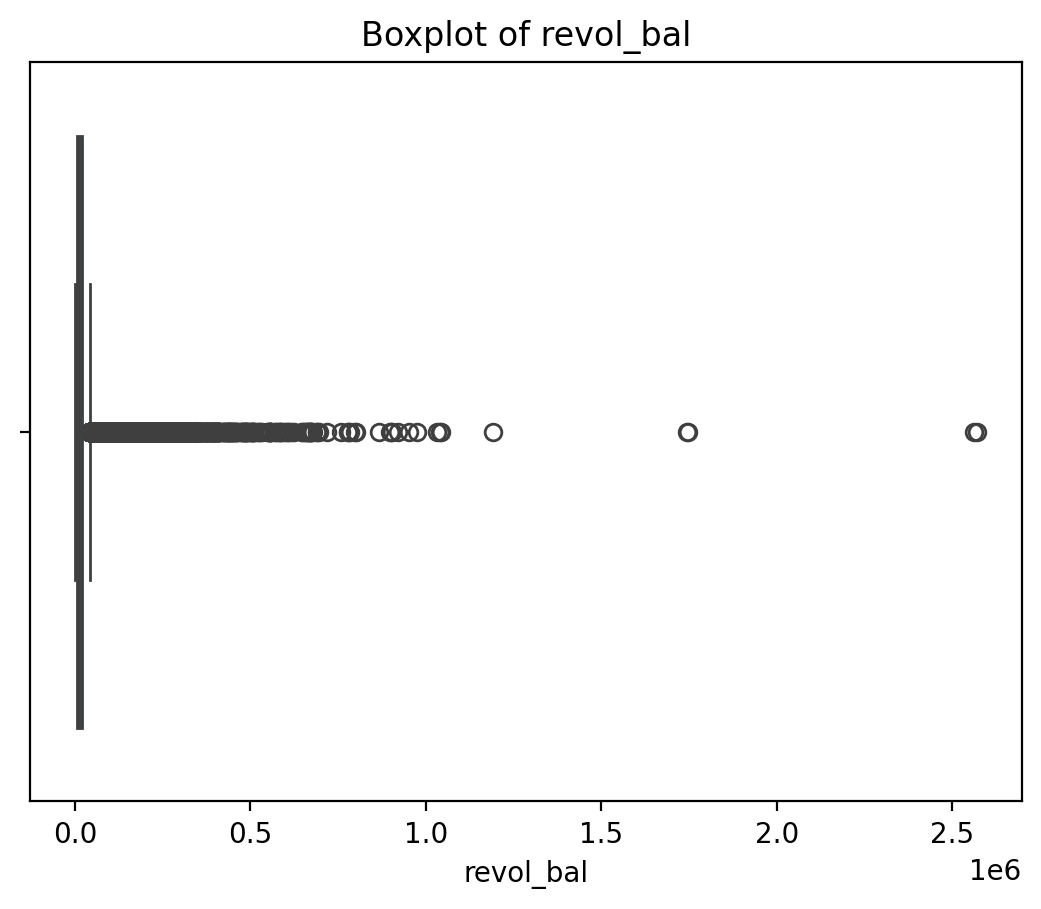

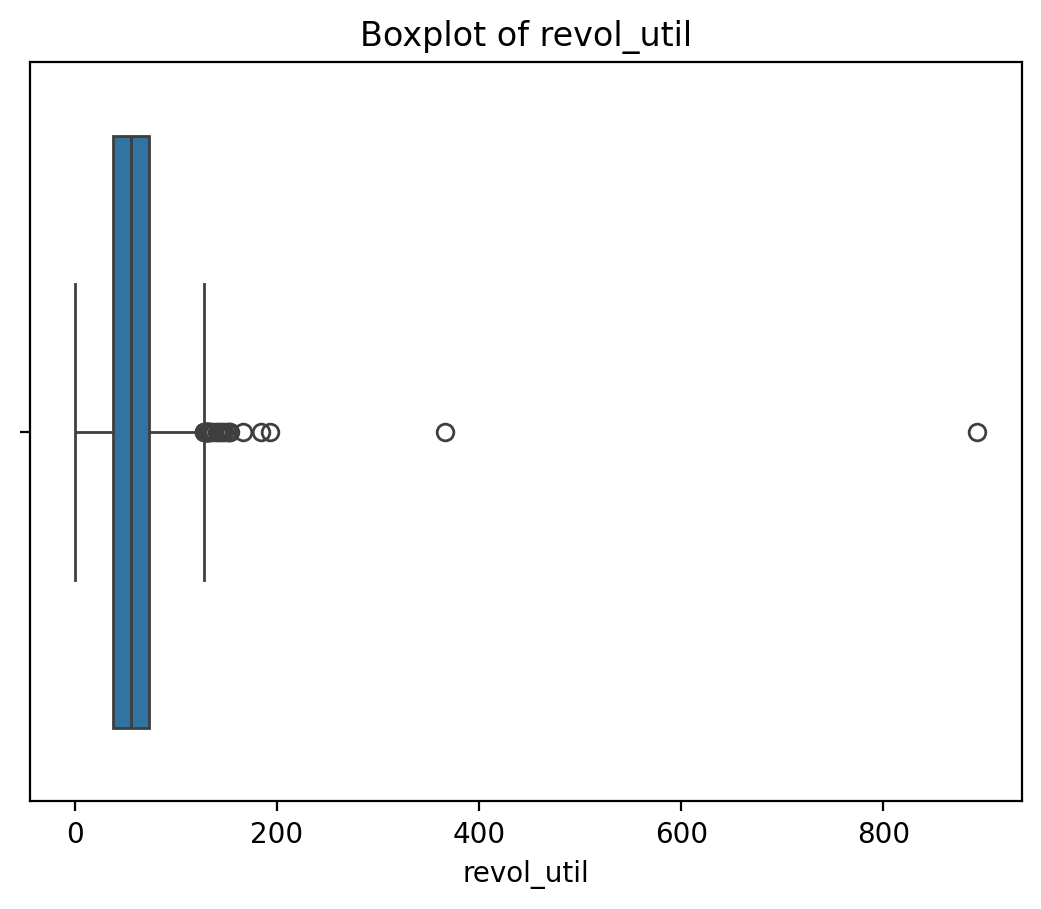

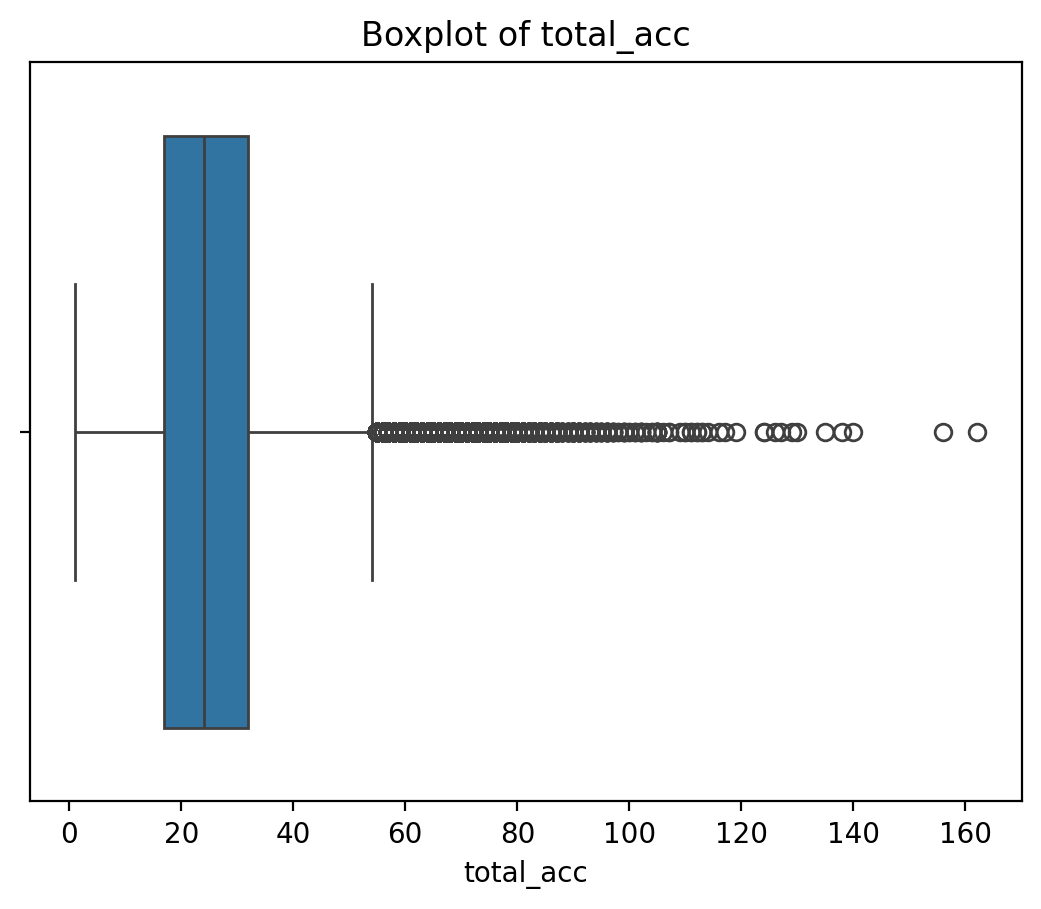

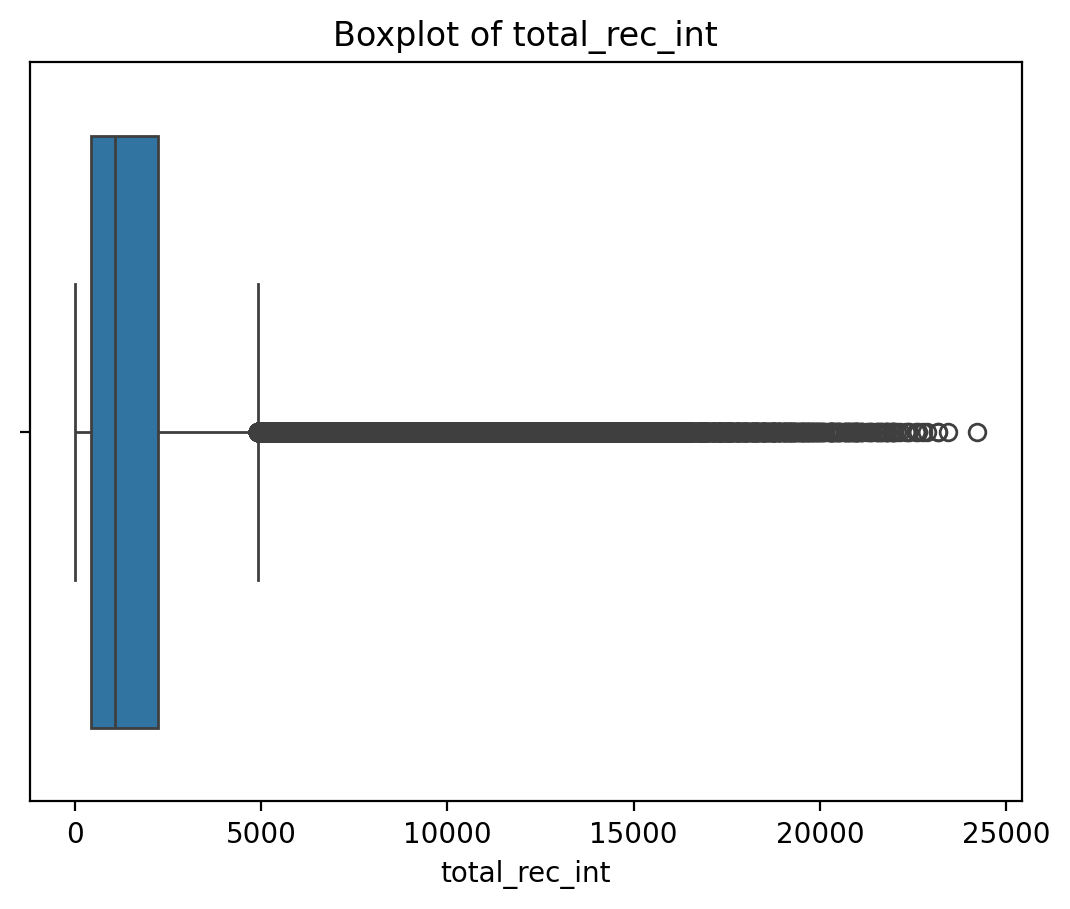

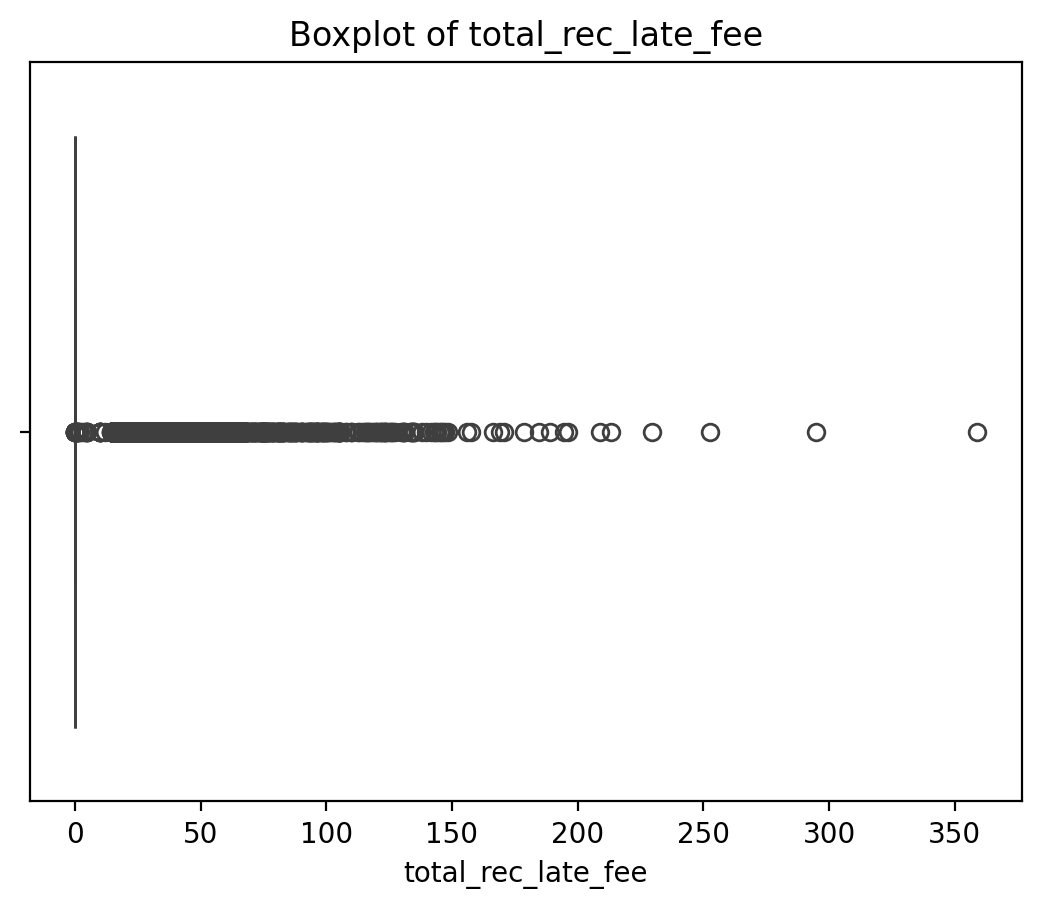

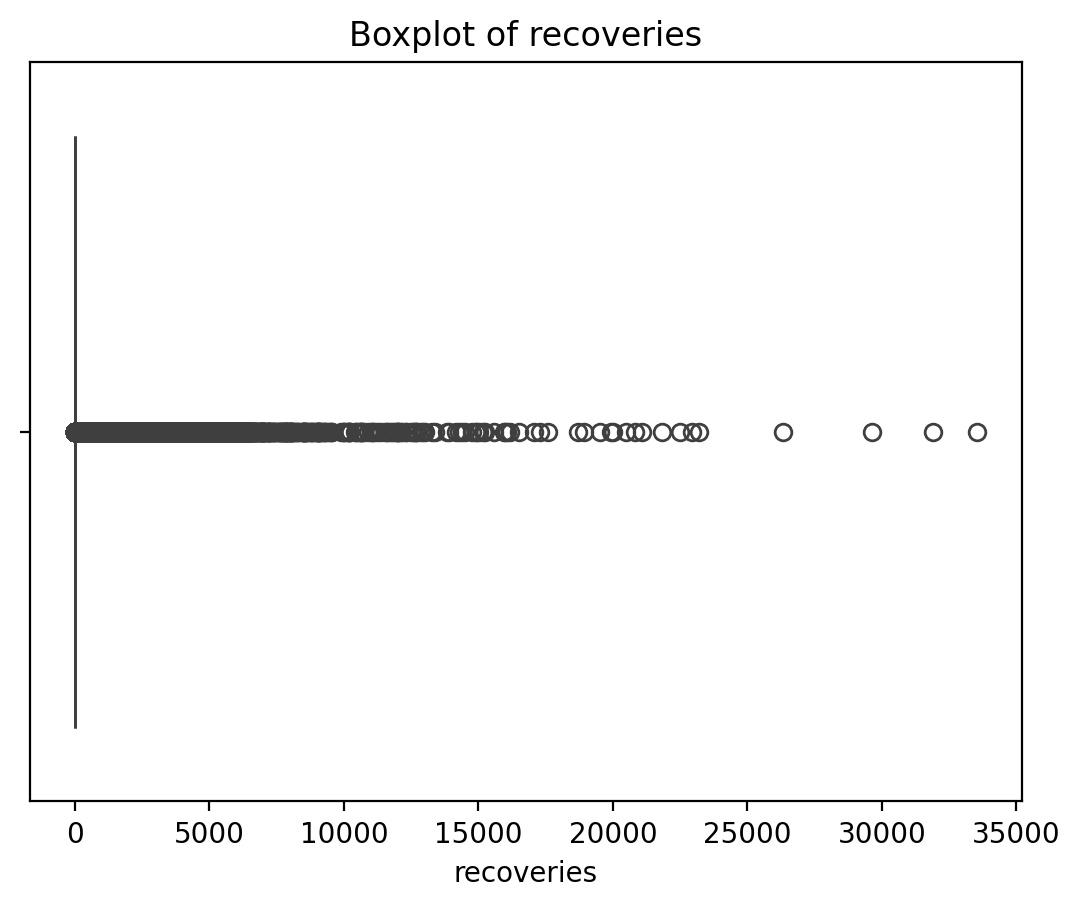

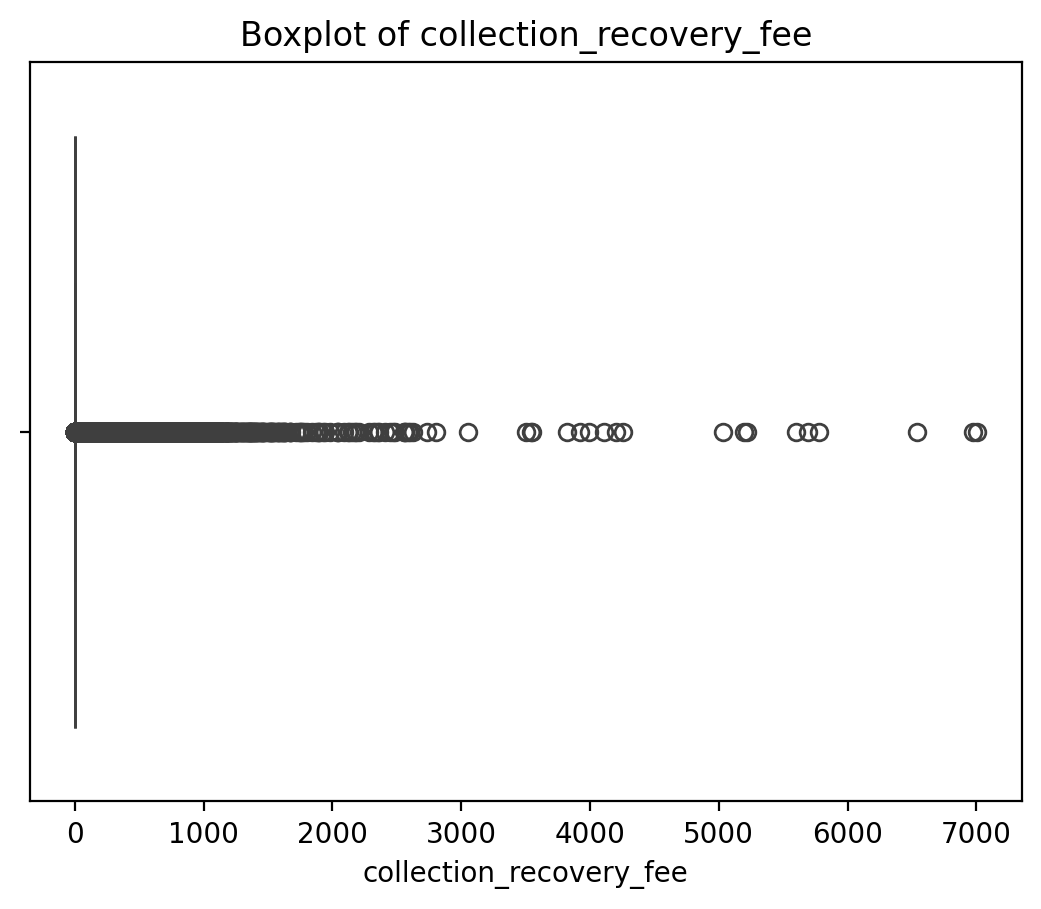

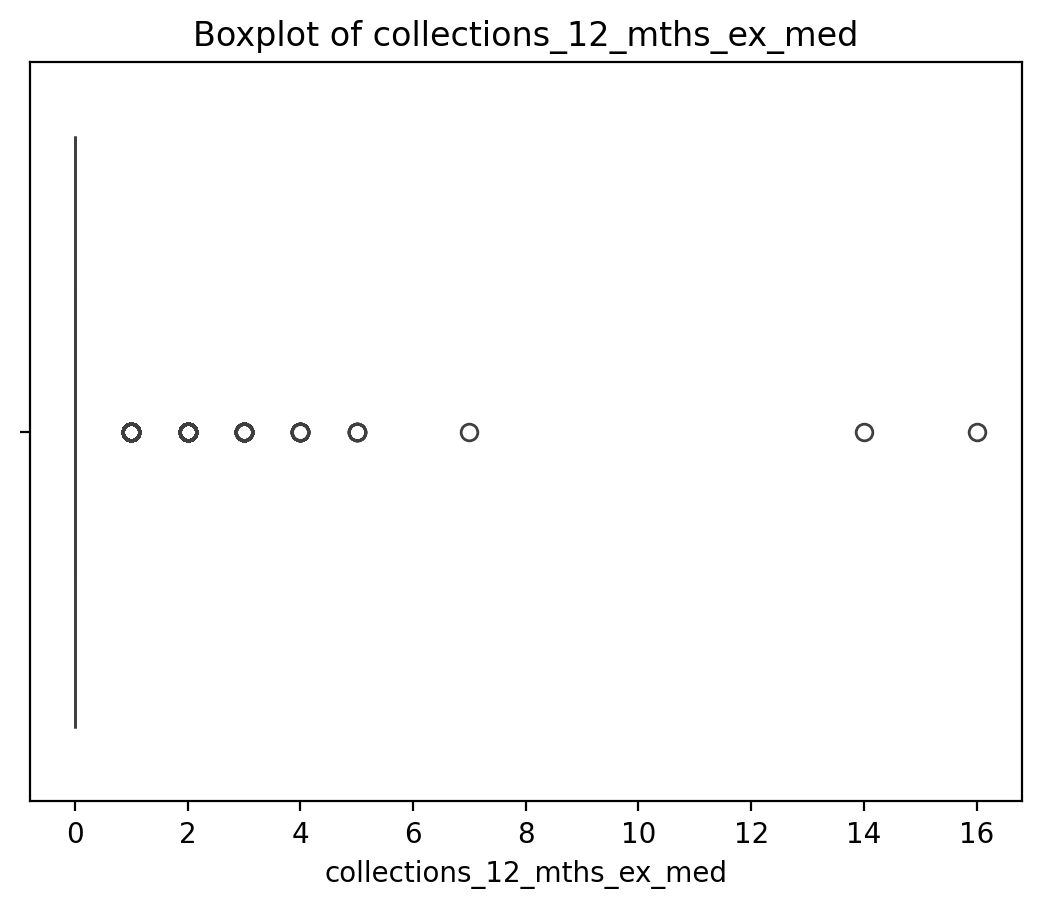

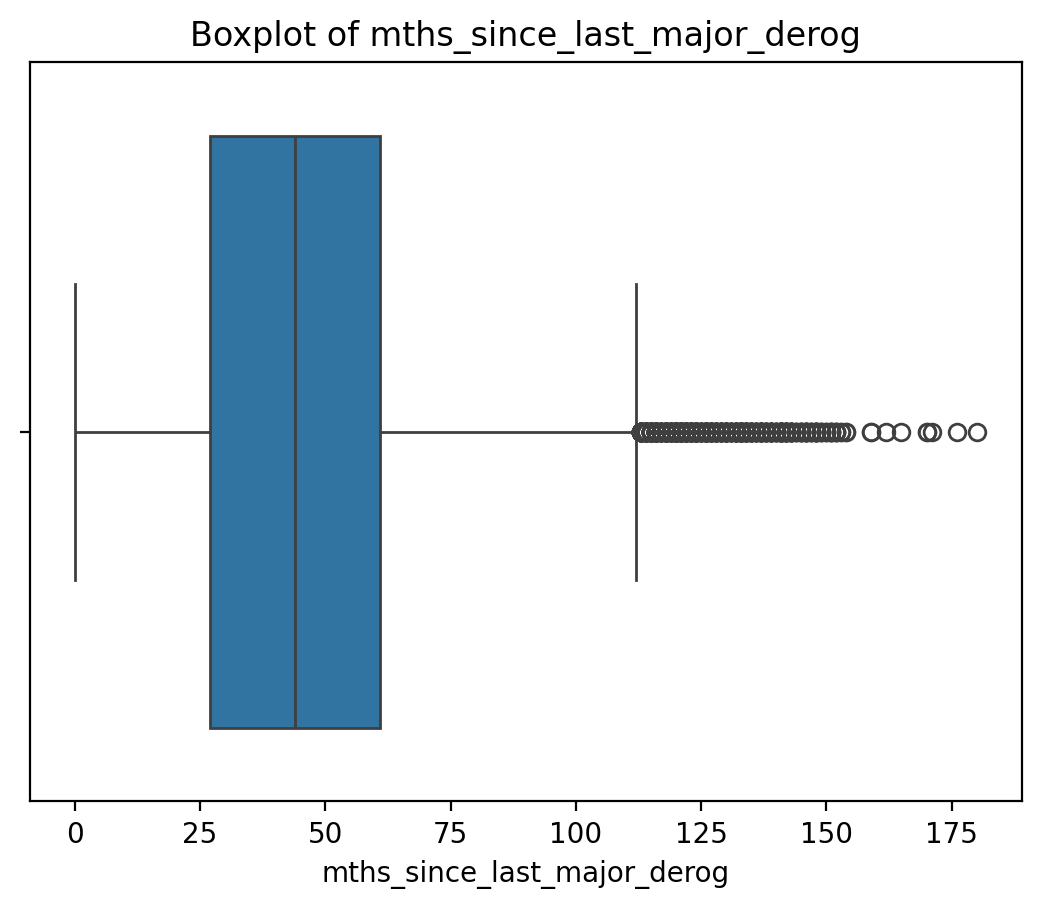

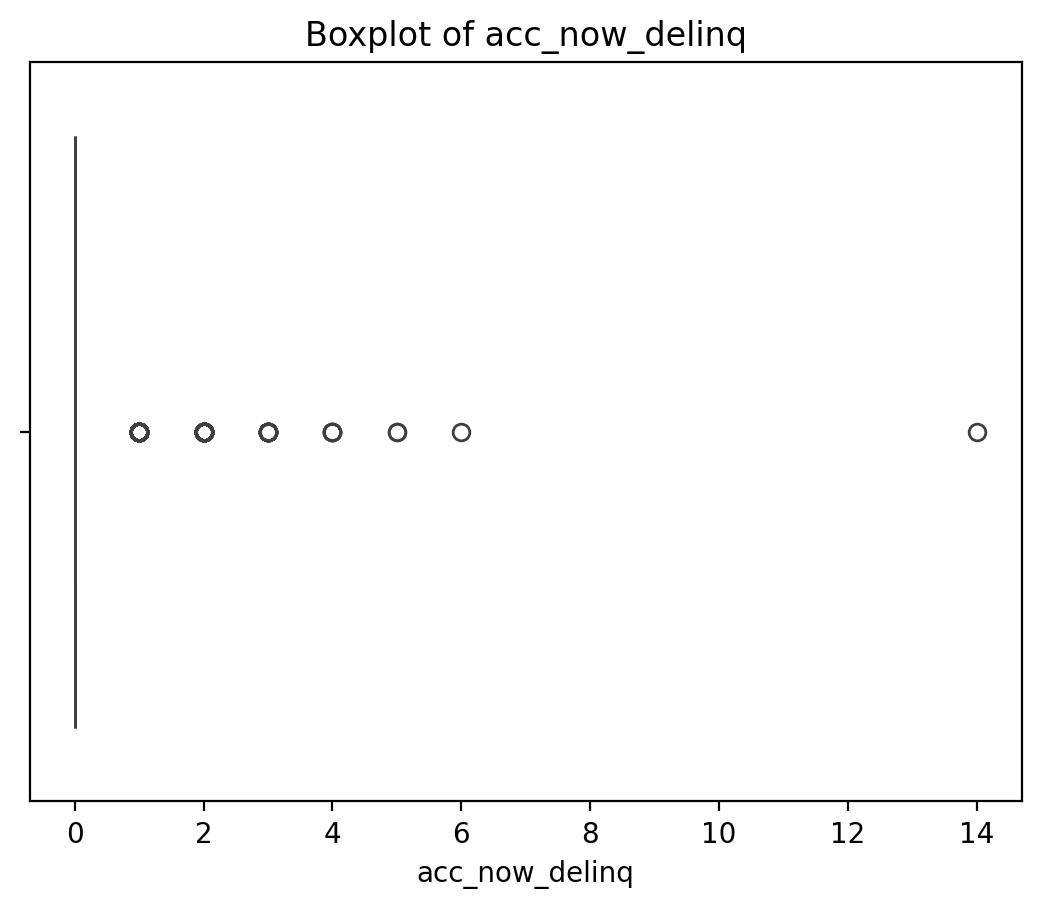

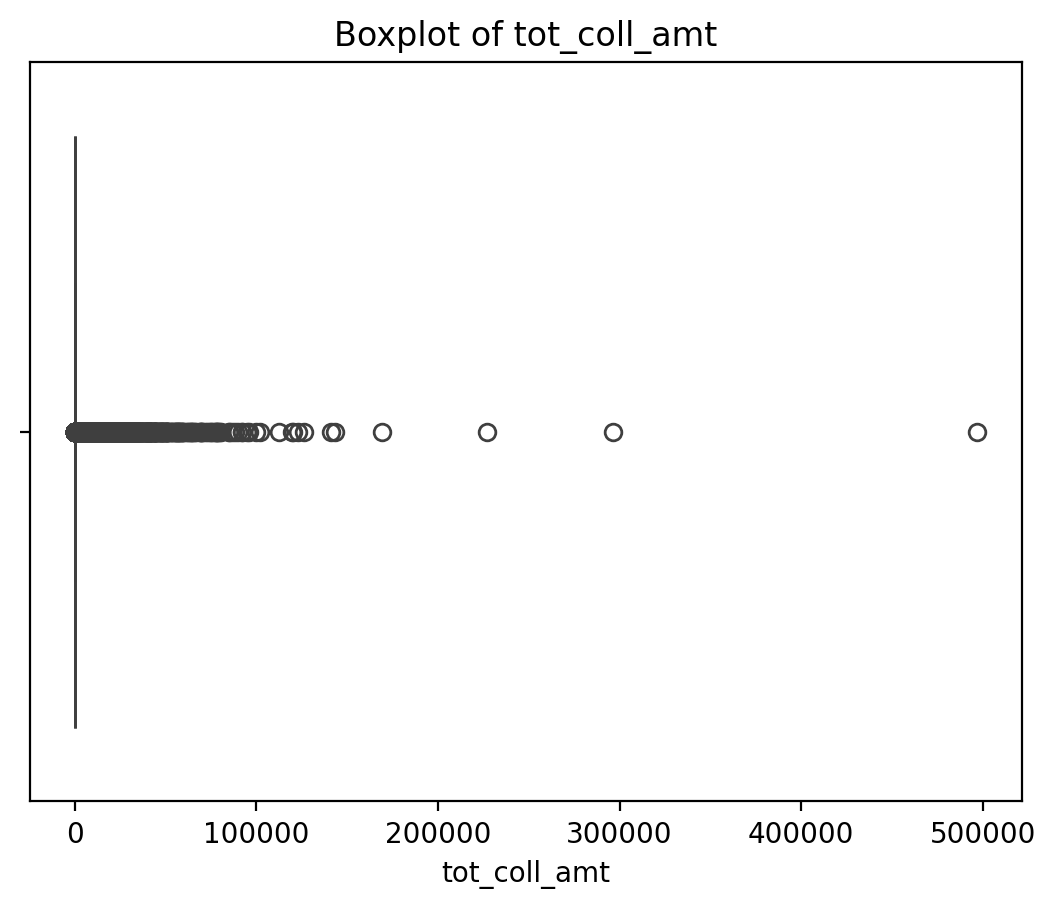

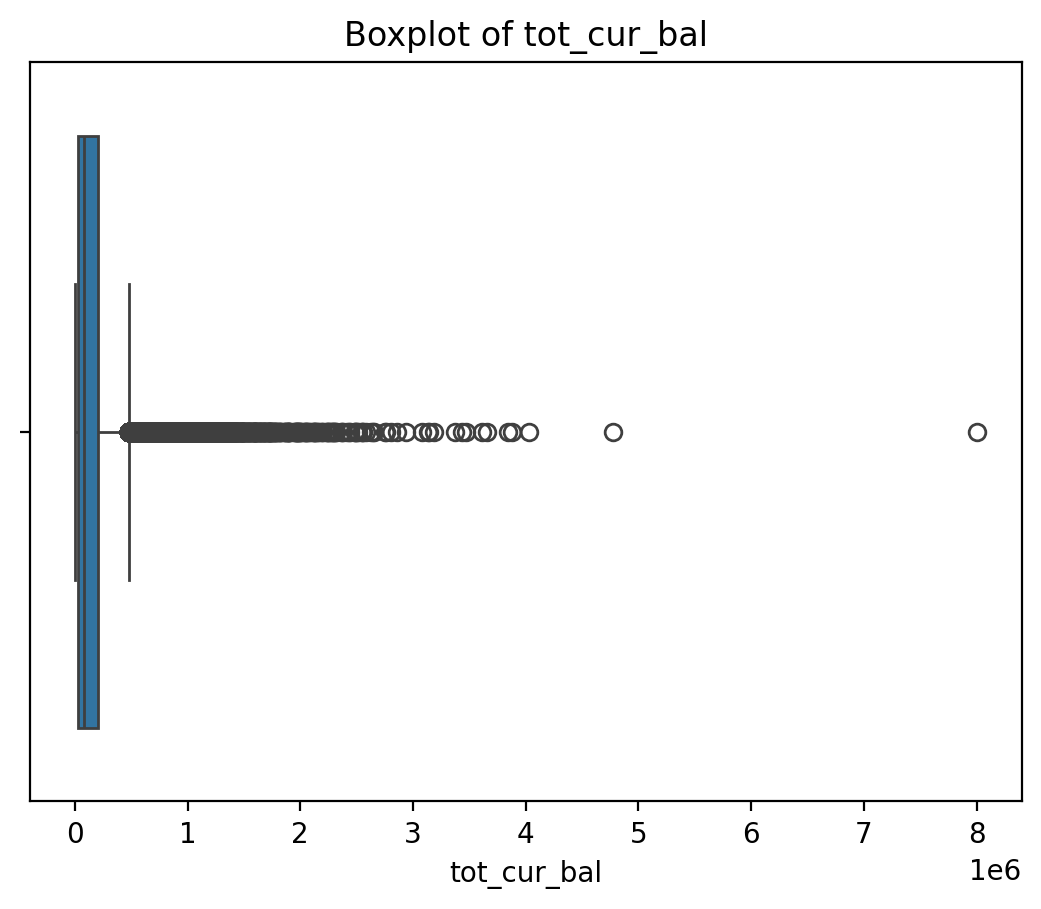

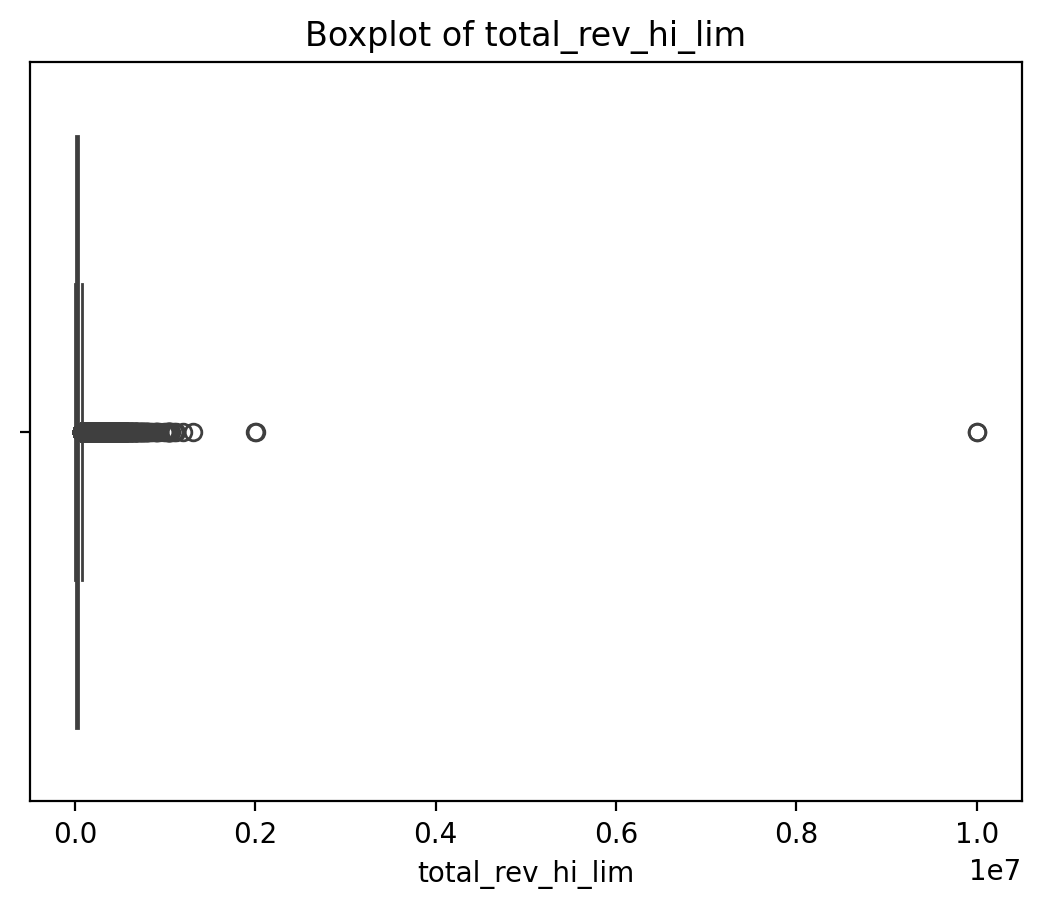

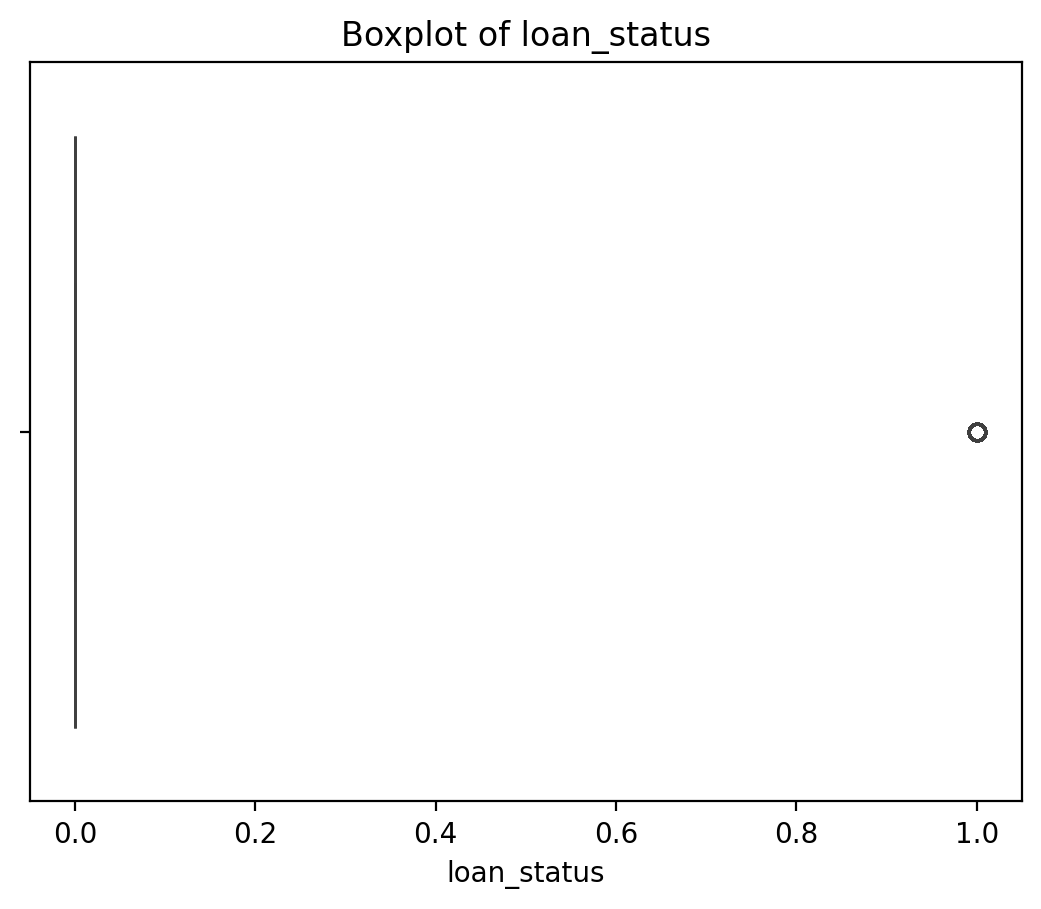

In [33]:
for col in num_features:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### **Missingness impact: default rate for rows with vs without key missing columns**

### Missingness as Information

In credit risk modeling, a **NaN** (missing value) is rarely just an error—it is often a signal. We must interpret *why* the data is missing rather than blindly filling it.

**1. Informative Missingness (The "Good" NaNs)**
*   **Examples:** `mths_since_last_delinq`, `collections_12_mths_ex_med`.
*   **Interpretation:** A missing value here typically means the event **never happened**.
    *   *Example:* If `mths_since_last_delinq` is NaN, the borrower has likely **never been delinquent**.
*   **Action:** These should be filled with a value representing "safe" (e.g., 0 or a distinct category), as they indicate good credit behavior.

**2. Hidden Risk (The "Bad" NaNs)**
*   **Examples:** `annual_inc`, `emp_length`.
*   **Interpretation:** When a borrower fails to report financial stability metrics, it correlates with **higher default probability** or potential fraud.
*   **Action:** We treat this missingness as a predictive feature. We may create a binary flag (e.g., `income_missing = 1`) to allow the model to learn this risk pattern.

**Conclusion:**
Missingness is not noise; it is a predictive feature. We will handle these two types of missing values differently to preserve their signals.

In [34]:
df.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              91
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [35]:
key_missing_cols = ['emp_title', 'emp_length', 'mths_since_last_delinq', 'mths_since_last_record', 'tot_cur_bal']
for col in key_missing_cols:
	if col in df.columns:
		has = df[df[col].notnull()]['loan_status'].mean()
		missing = df[df[col].isnull()]['loan_status'].mean()
		print(f"\nColumn: {col} -> default rate: present={has:.4f}, missing={missing:.4f}, missing_pct={(df[col].isnull().mean()*100):.2f}%")


Column: emp_title -> default rate: present=0.2381, missing=0.2074, missing_pct=5.79%

Column: emp_length -> default rate: present=0.2400, missing=0.1669, missing_pct=5.05%

Column: mths_since_last_delinq -> default rate: present=0.2150, missing=0.2567, missing_pct=51.19%

Column: mths_since_last_record -> default rate: present=0.1951, missing=0.2439, missing_pct=84.58%

Column: tot_cur_bal -> default rate: present=0.1886, missing=0.7934, missing_pct=7.89%


### **High-Risk Missing Patterns**

**1. tot_cur_bal (Critical Risk)**
- Missing: 79.3% default rate vs 18.9% present
- Missing indicates extreme risk (4x higher default)
- Action: Create binary flag for missing, treat as high-risk segment

**2. mths_since_last_record**
- Missing: 24.4% default vs 19.5% present
- 84.6% of values are missing
- Missing likely means "no records exist" - slightly riskier

**3. mths_since_last_delinq**
- Missing: 25.7% default vs 21.5% present
- 51.2% missing - very common
- Missing indicates moderate risk increase

### **Lower-Risk Missing Patterns**

**4. emp_length & emp_title**
- Missing: ~16-21% default vs ~24% present
- Missing employment info actually indicates LOWER risk
- Possibly represents self-employed/entrepreneurs with better credit

### **Strategic Implications**

**Missing Data Strategy:**
- **Keep missing values** - they contain predictive information
- Create **binary missing indicators** for all these columns
- **tot_cur_bal missing** should be treated as a major red flag
- **Employment info missing** might indicate favorable borrower segment

**Data Quality Note:**
The high missing rates for delinquency timelines (51-85%) suggest either data collection issues or that most borrowers simply don't have these events in their history.

**Bottom Line:** Missingness patterns are highly predictive and should be engineered as features rather than imputed or dropped.

### **Quick sampling pairwise scatter for a few numeric features to inspect relationships**

##### **Pairplot Analysis: Detecting Multicollinearity**

Pairwise plots are a powerful EDA tool for exposing relationships between features.

*   **The Visual Cue:** When two variables form a clear **diagonal line** in the plot, it indicates they are strongly correlated.
*   **The Problem:** This signals **Multicollinearity**—meaning the features provide duplicate information (e.g., `loan_amnt` vs. `funded_amnt`).
*   **The Action:** We can safely **drop one of the redundant features**. This simplifies the model and reduces overfitting without losing valuable predictive signal.

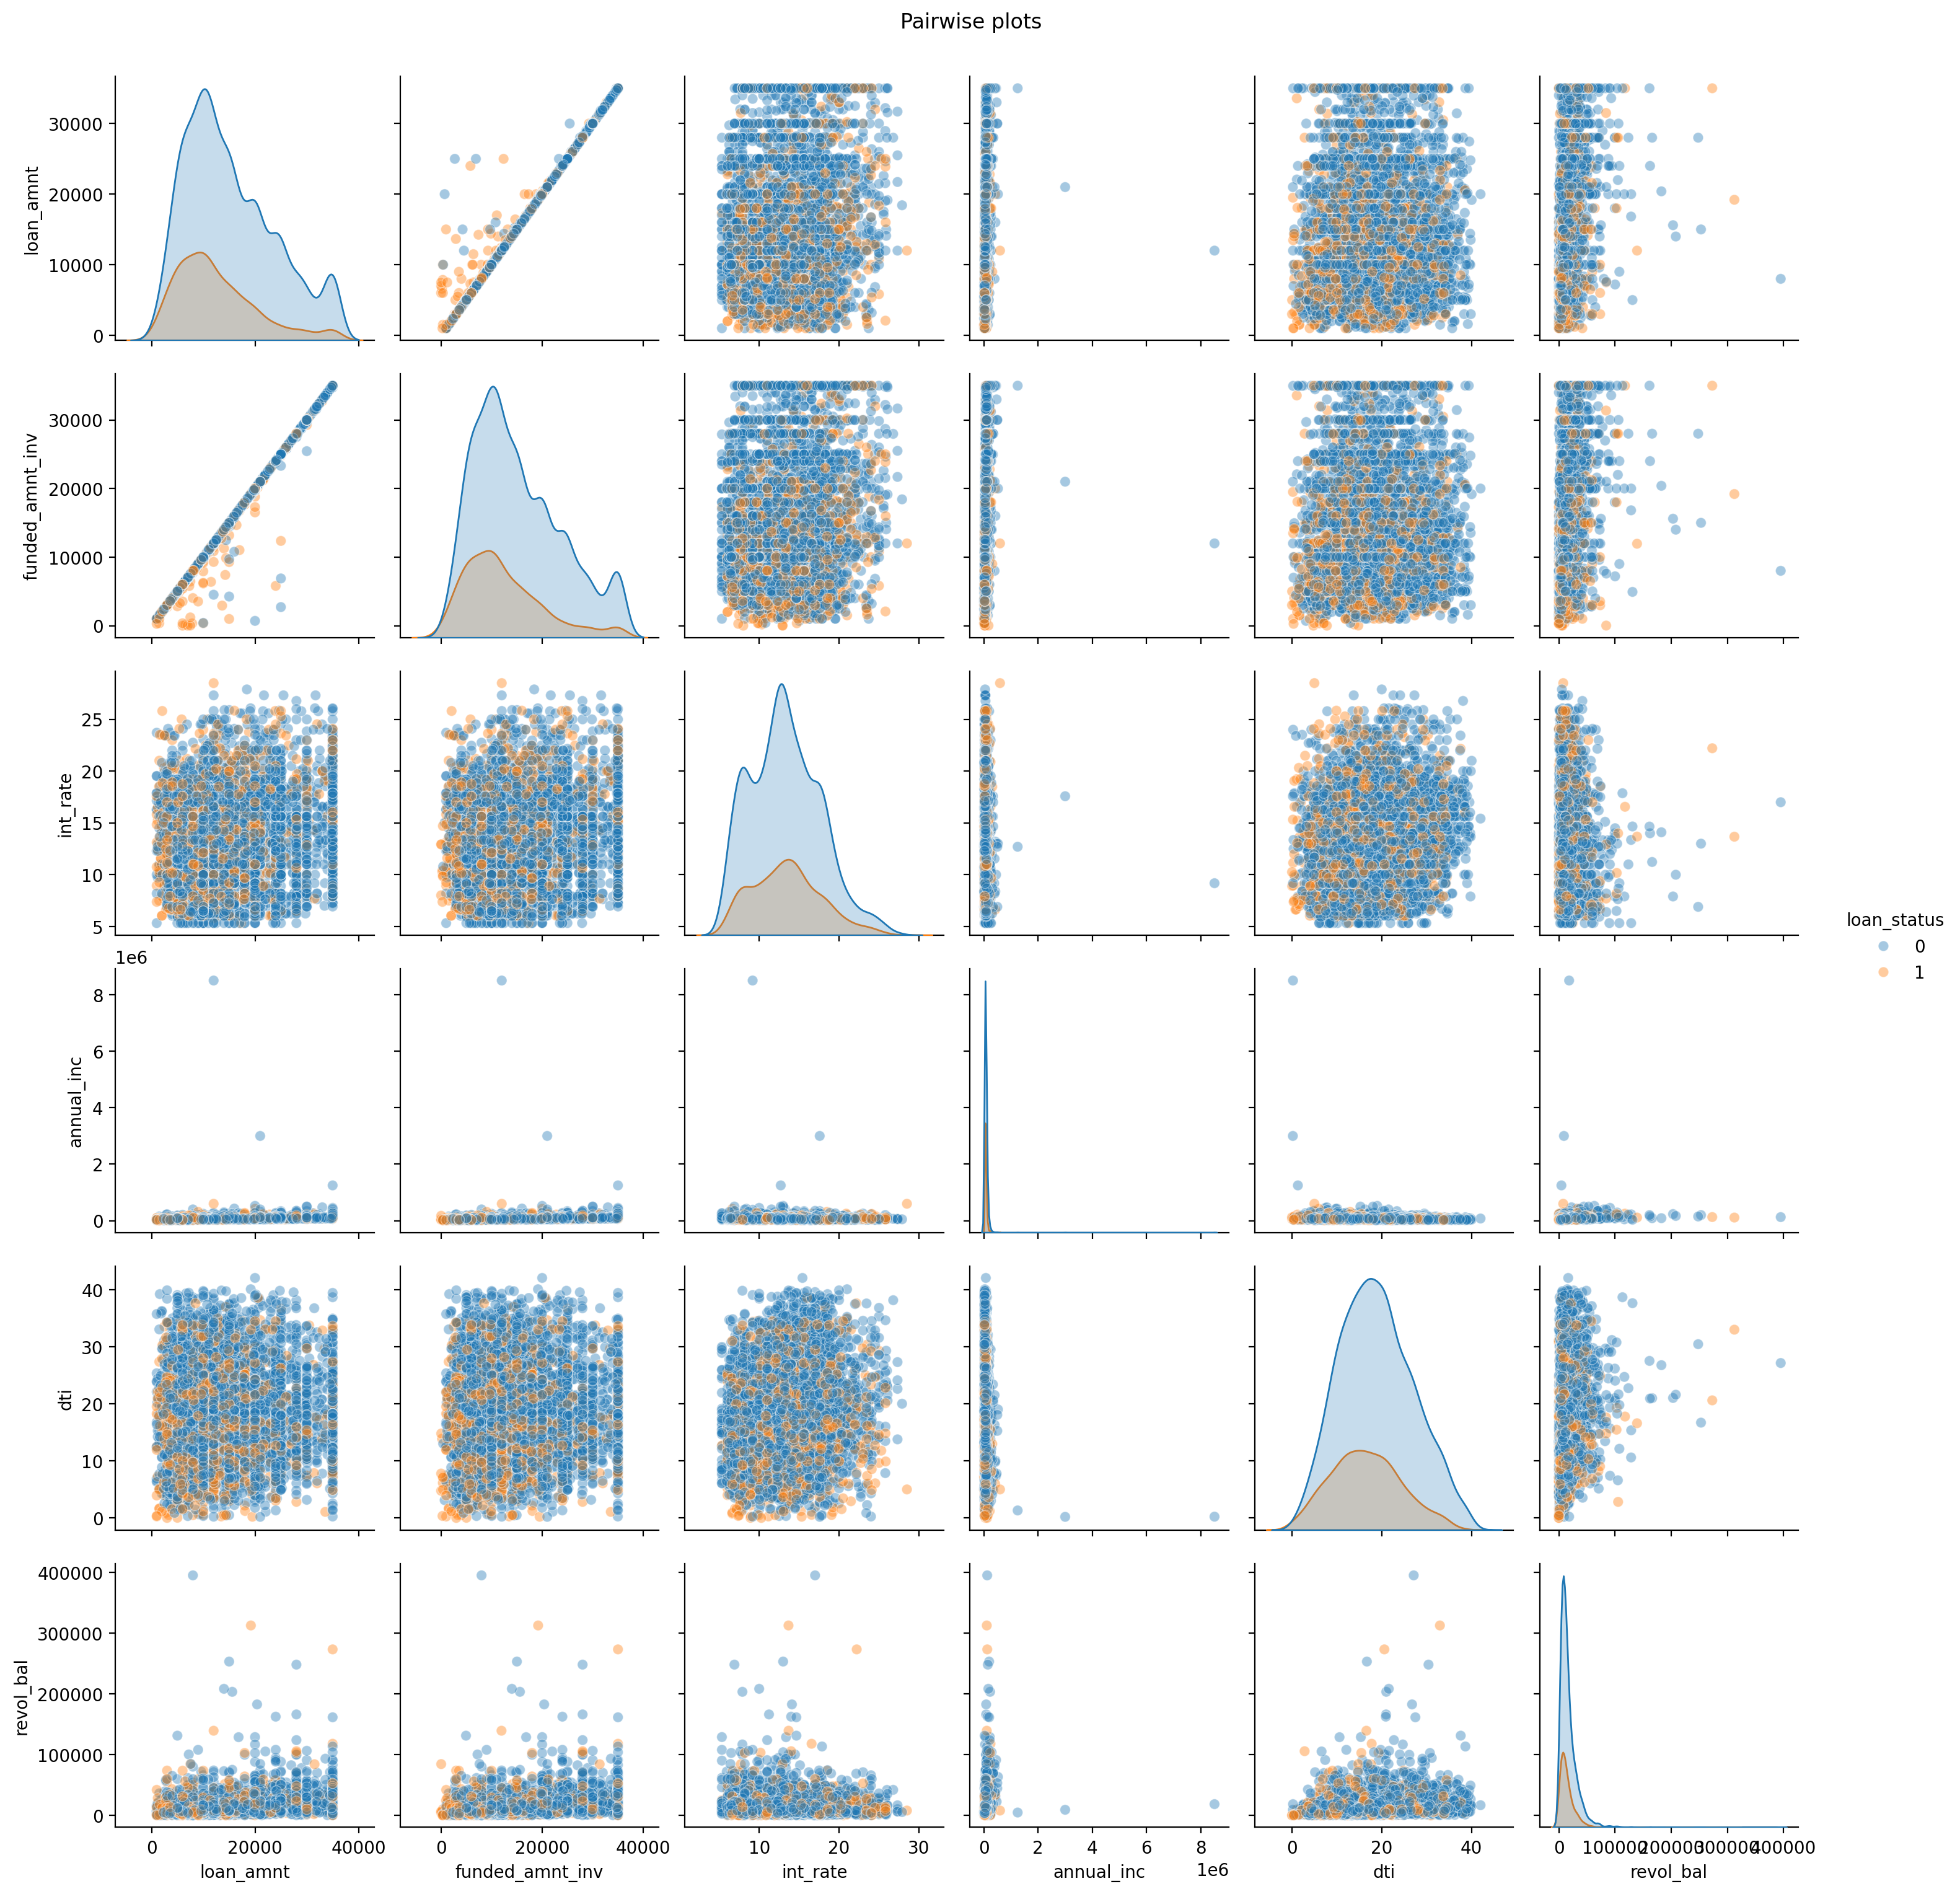

In [36]:
sample = df[numeric_cols].sample(n=min(5000, len(df)), random_state=0)
pair_cols = ['loan_amnt','funded_amnt_inv','int_rate','annual_inc','dti','revol_bal']
pair_cols = [c for c in pair_cols if c in sample.columns]
if len(pair_cols) >= 2:
	sns.pairplot(sample[pair_cols + ['loan_status']], hue='loan_status', plot_kws={'alpha':0.4}, diag_kind='kde', vars=pair_cols)
	plt.suptitle("Pairwise plots", y=1.02)
	plt.show()

In [37]:
df.groupby('grade')['loan_status'].mean().sort_values(ascending=False)

grade
A    0.268879
B    0.263278
G    0.235952
D    0.217167
C    0.216408
F    0.209171
E    0.186893
Name: loan_status, dtype: float64

##### **Note: Grade Anomaly**
- **Grade A** has higher default rate than **Grade B** (26.9% vs 26.3%) - this is unusual!

<Axes: xlabel='term'>

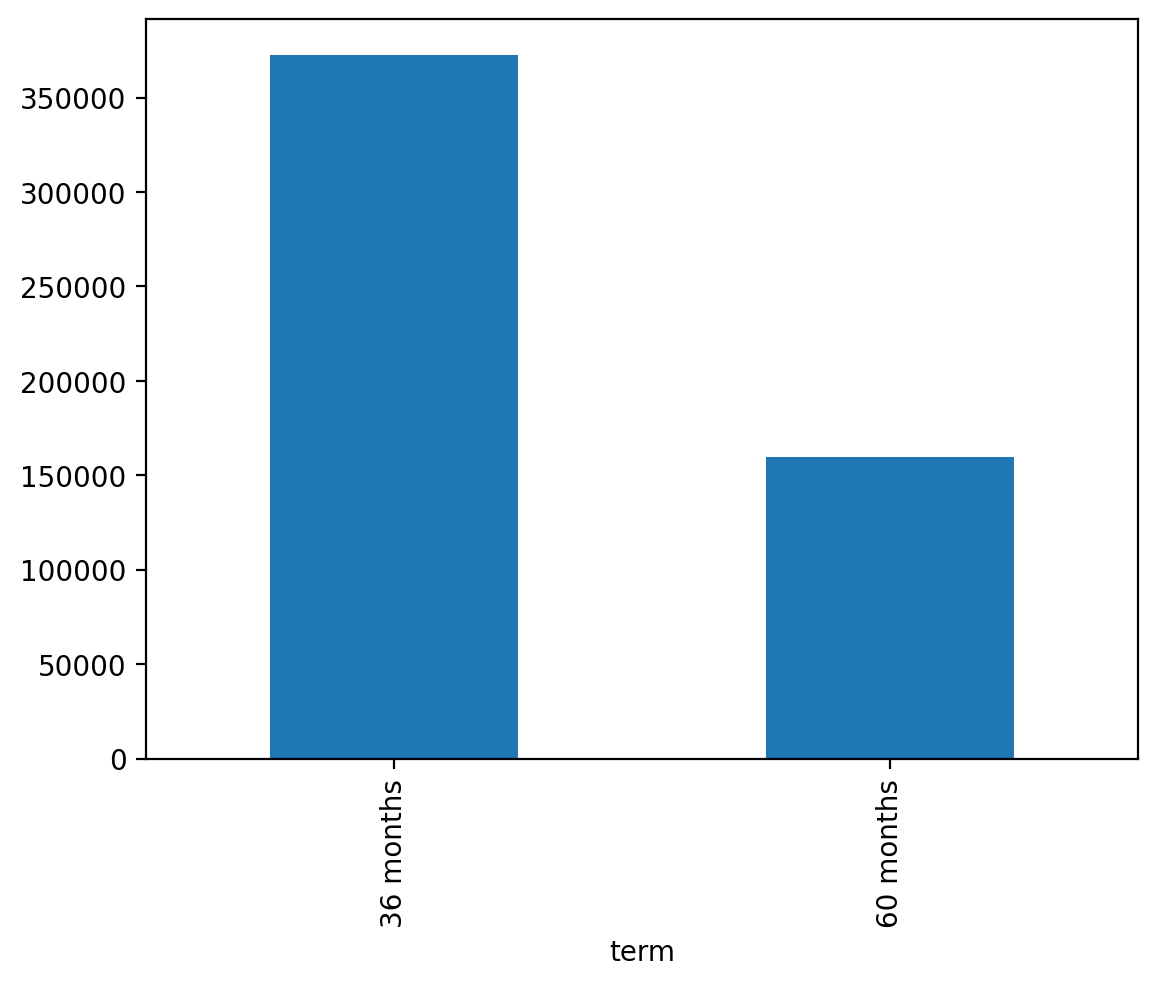

In [38]:
df.groupby('term').count()['member_id'].plot(kind='bar')

#### **Most borrowers prefer 36-month loans, and 60-month loans are chosen by fewer but riskier borrowers.**

### **Loan Purpose**


##### **A `debt consolidation loan` is a new loan used to pay off several existing debts and liabilities, such as credit card balances, medical bills, and other personal loans**

Text(0.5, 1.0, 'Purpose of Loan')

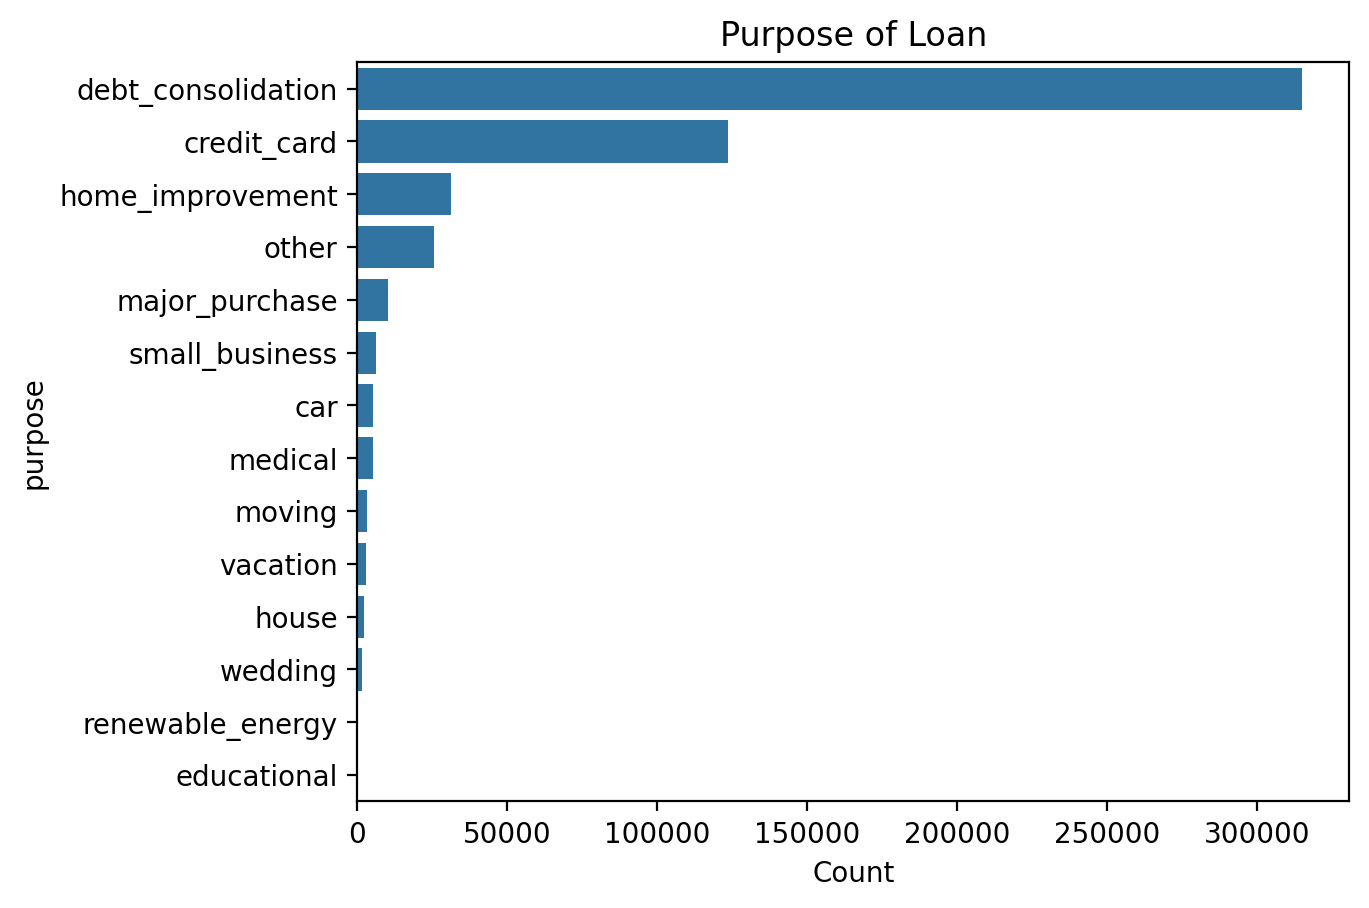

In [39]:
sns.countplot(y="purpose", data=df,
              order=df["purpose"].value_counts().index)
plt.xlabel('Count')
plt.title('Purpose of Loan')

#### **Dominant Loan Purposes**
1. **Debt Consolidation** - Overwhelmingly the most common (≈300K loans)
2. **Credit Card** - Distant second (≈120K loans)
3. **Home Improvement** - Third most popular
4. **Other** - Catch-all category with significant volume

- Primary customer need is **debt management** rather than buying something.


##### **The interest rate shows a  strong correlation with the credit grade. The higher the credit grade, the lower the interest rate.**

Text(0, 0.5, 'Interest Rate')

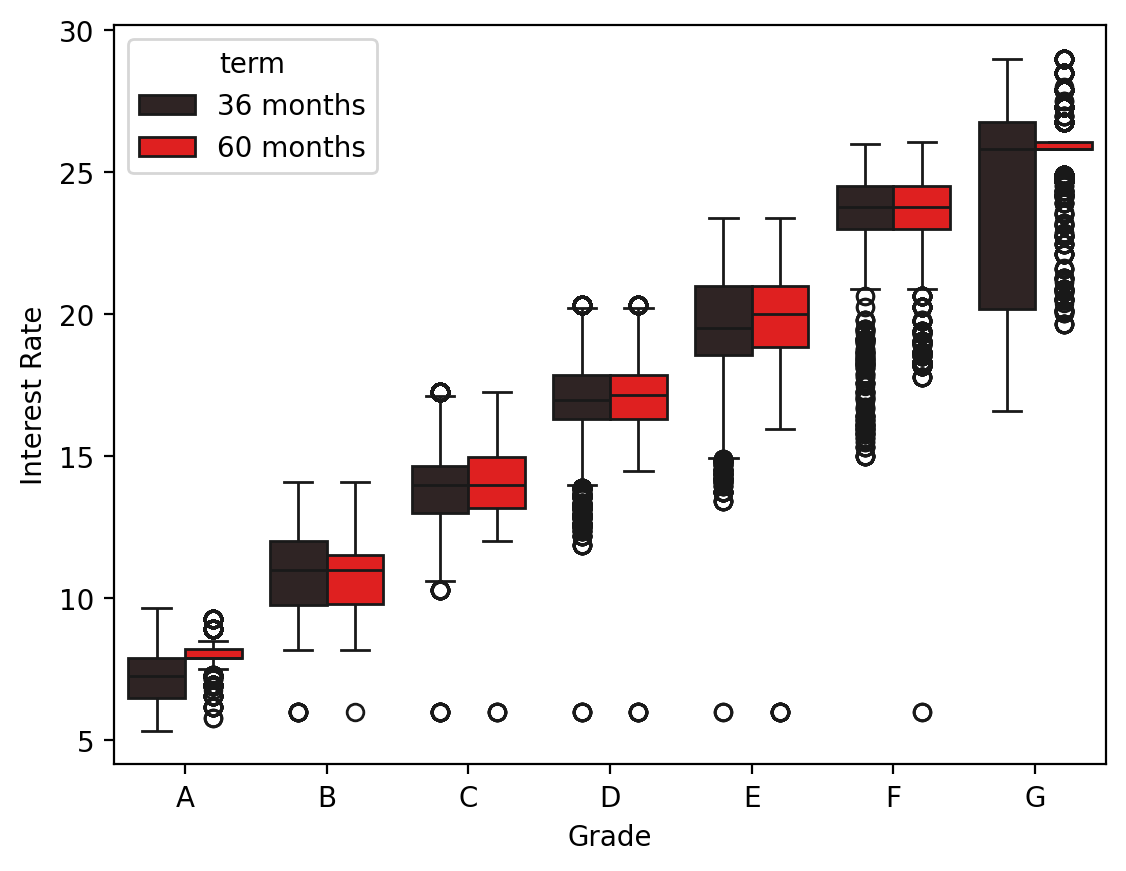

In [40]:
sns.boxplot(x='grade', y='int_rate', data=df,
            order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue='term', color='r')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')

##### **Interest Rate**
* Higher credit grade → lower interest.
* Longer loan term → higher interest.
* Risk and variability increase dramatically from Grade D onward.

##### **The interest rate shows a  strong correlation with the credit grade. The higher the credit grade, the lower the interest rate.**

<Axes: xlabel='term'>

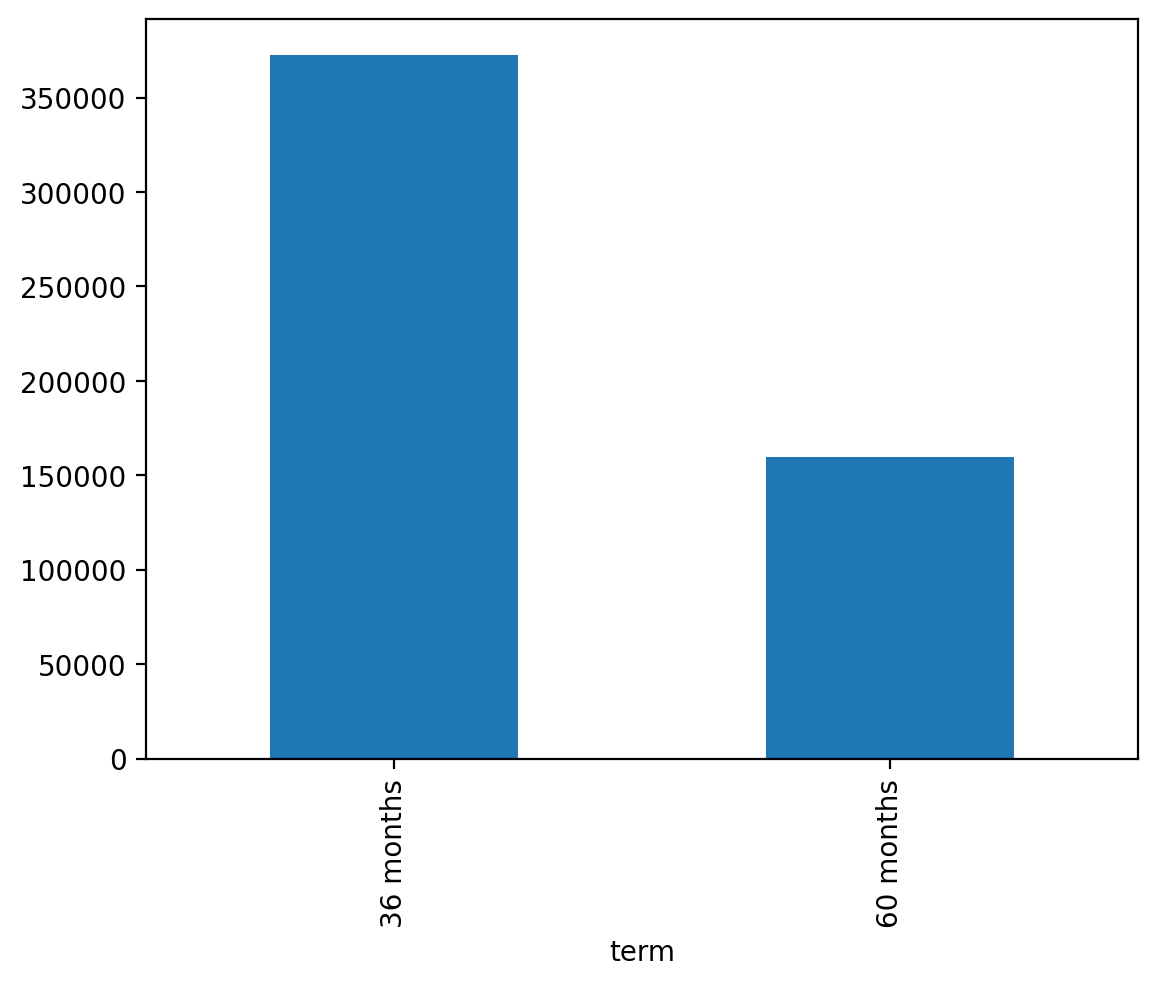

In [41]:
df.groupby('term').count()['int_rate'].plot(kind='bar')

##### **On average, the interest rate of a 60-month term loan is 3 to 4 % higher than that of a 36-month term loan. We can also see that the interest rates differ among different loan purposes. The maximum loan limit is up to $35,000.**

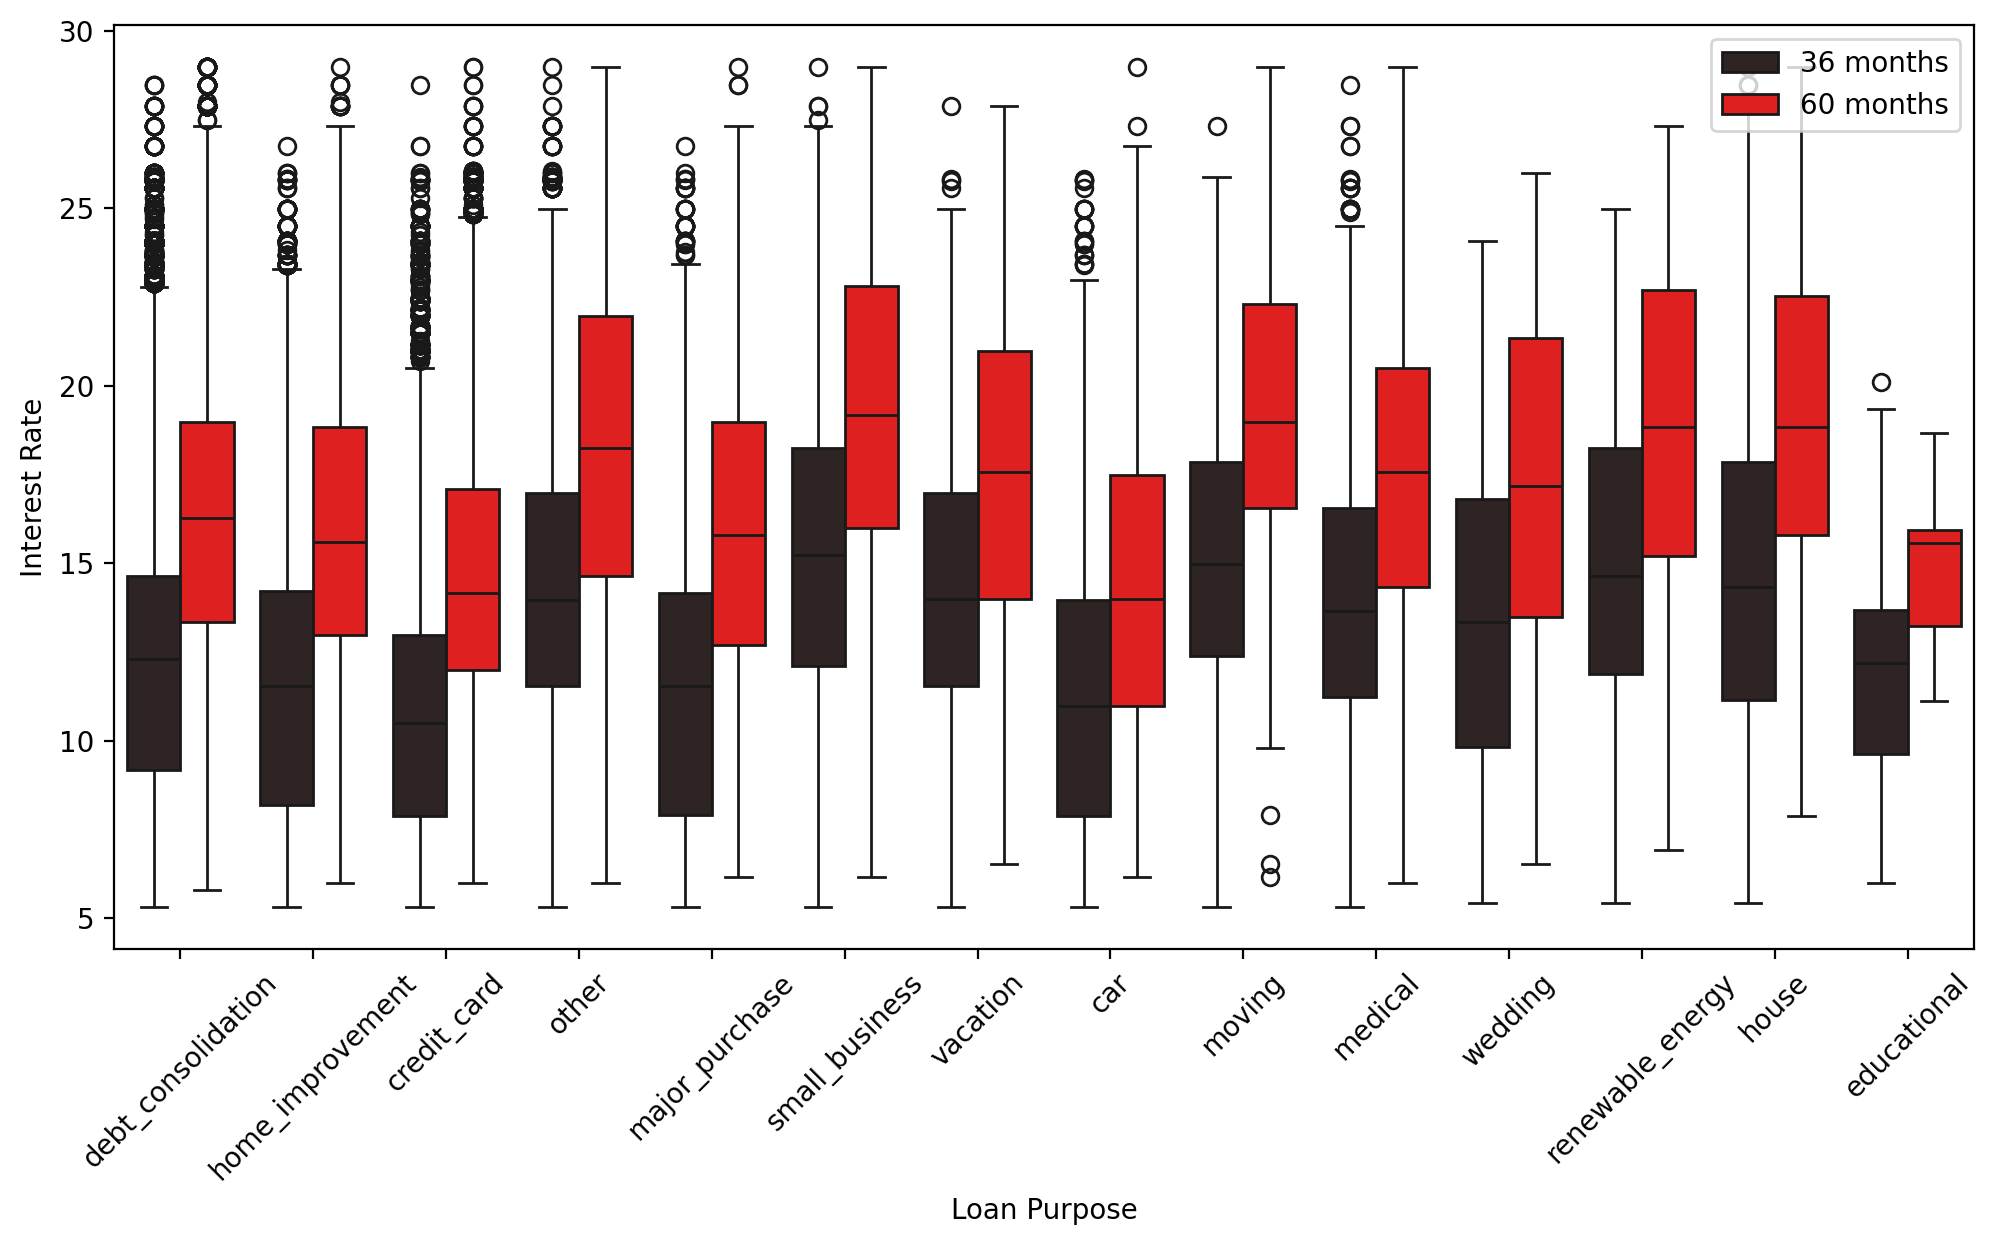

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='purpose', y='int_rate', data=df, hue='term', color='r')
plt.ylabel('Interest Rate')
plt.xlabel('Loan Purpose')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

* **High interest** → riskier borrower or riskier purpose.
* **60-month loans** → substantially higher risk than 36-month loans.
* **Small business, wedding, moving** → highest risk categories.
* **Car, home-improvement, education** → lowest risk categories.

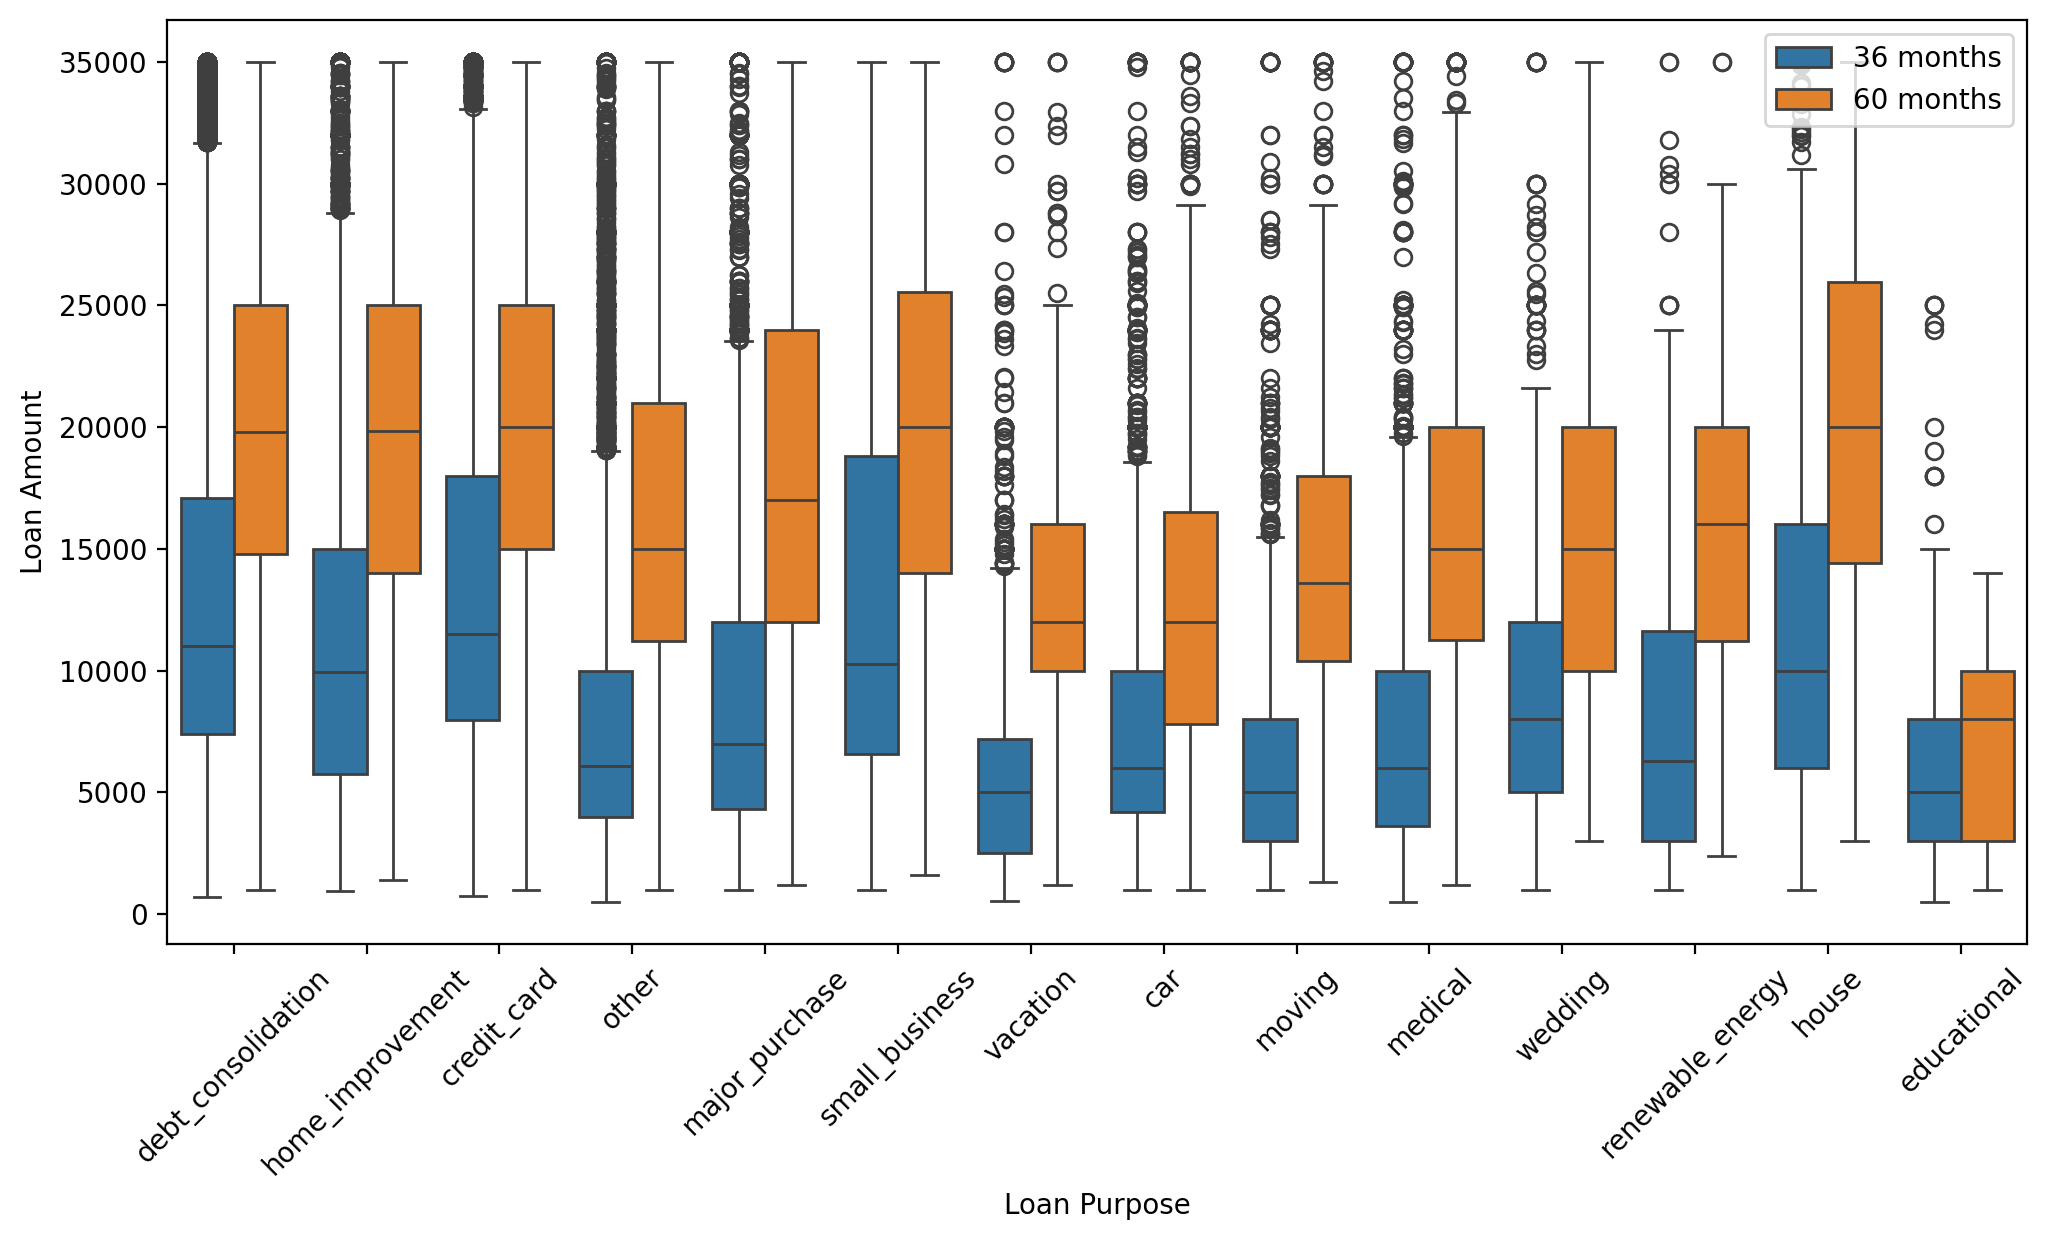

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='purpose', y='loan_amnt', data=df, hue='term')
plt.ylabel('Loan Amount')
plt.xlabel('Loan Purpose')
plt.xticks(rotation = 45)
plt.legend(loc='upper right')

* **60-month loans are used for bigger loan amounts.**
* **Loan amount varies heavily by loan purpose.**
* **`Debt consolidation`, `home improvement`, `major purchases`, and `small business loans` tend to require the `largest amounts`.**
* **`Vacation`, `educational`, `wedding`, and `moving loans` involve much `smaller amounts`.**

### **The geographical distribution of lenders is consistent with America's demographic profile.**

In [ ]:
# import plotly.graph_objects as go

# df_location = df.groupby(["addr_state"]).sum().reset_index()
# df_location = df_location.filter(["addr_state", "loan_amnt"], axis=1)

# fig = go.Figure(data=go.Choropleth(
#     locations=df_location['addr_state'],  # Spatial coordinates
#     z=df_location['loan_amnt'].astype(float),  # Data to be color-coded
#     locationmode='USA-states',  # set of locations match entries in `locations`
#     colorscale='Reds',
#     colorbar_title="Millions USD",
# ))

# fig.update_layout(
#     title_text='Total amount issued by State',
#     geo_scope='usa', 
# )

# fig.show(renderer="browser")

*  **Loan volume is heavily concentrated in large, high-population, high-cost states like `California`, `Texas`, `New York`, and `Florida`.**
*  **Rural and low-population states show little borrowing activity.**
*  **California alone accounts for a massive share of total lending volume.**

* **The debt to income ratio is calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. Most of these borrowers have a rough 15% debt to income ratio. We can see that maximum is no greater than 30%.**

Text(0.5, 1.0, 'Histogram of Debt to Income Ratio')

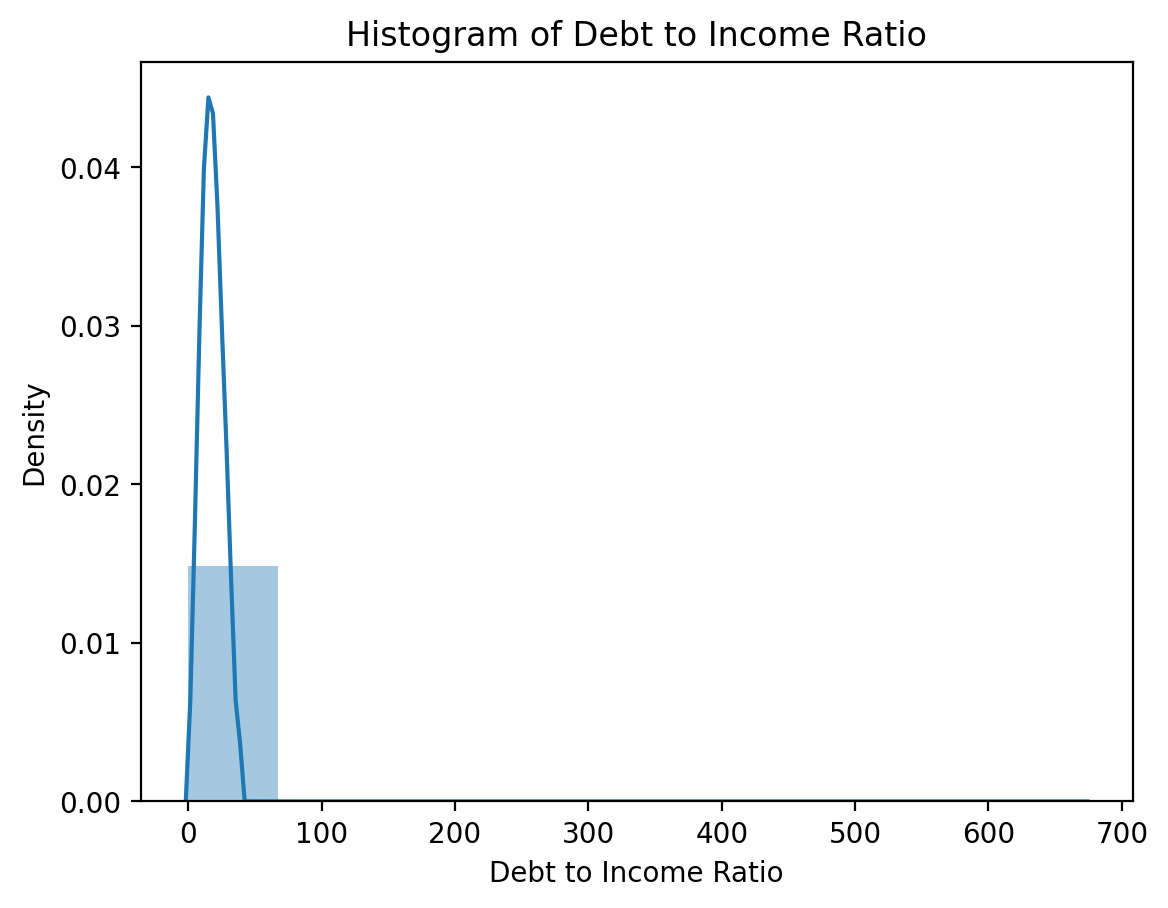

In [45]:
sns.distplot(df['dti'], bins=10)
plt.xlabel("Debt to Income Ratio")
plt.title("Histogram of Debt to Income Ratio")

* **Most borrowers have reasonable debt levels, but the dataset contains unrealistic extreme DTI values that skew the distribution**

<Axes: xlabel='grade', ylabel='count'>

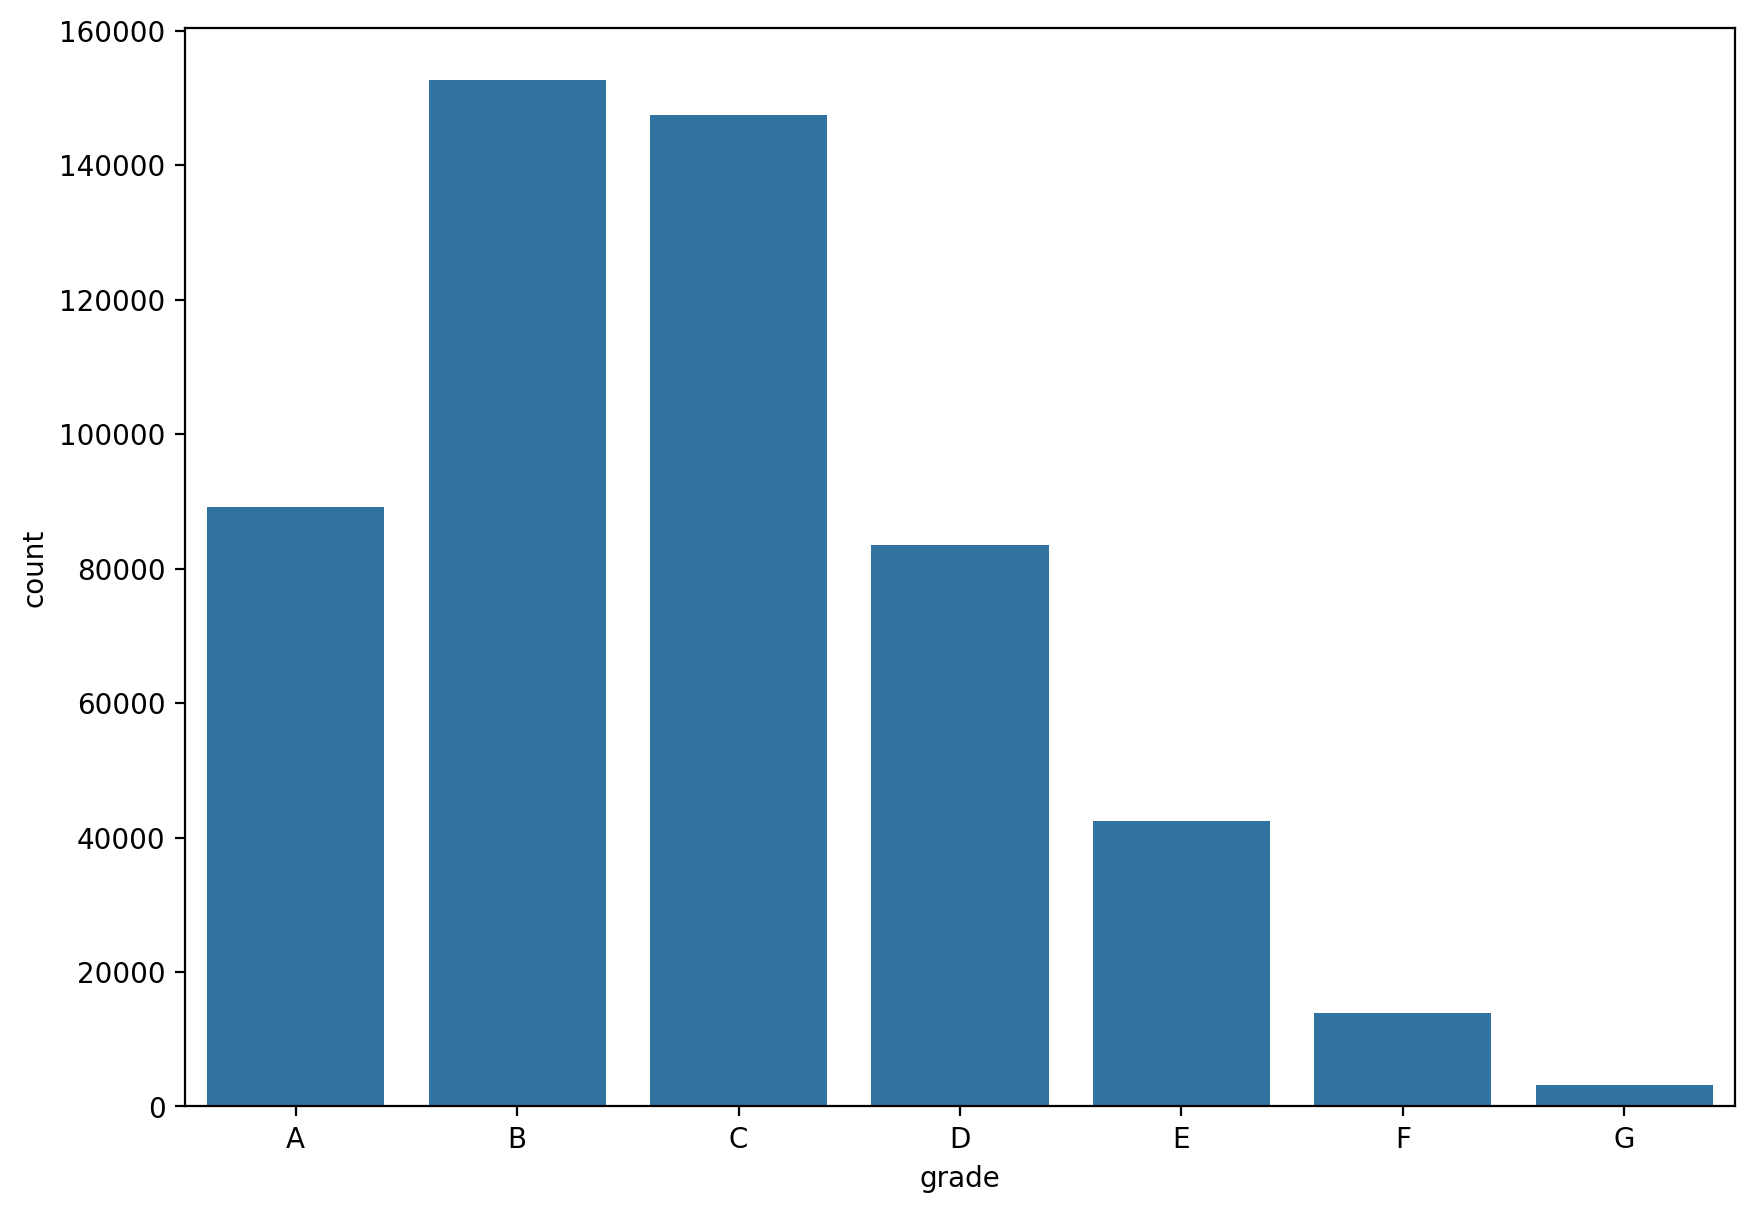

In [46]:
plt.figure(figsize=(10, 7))
sns.countplot(x="grade", data=df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

* **Most borrowers fall into Grades B and C, representing medium-risk lending. Very risky borrowers (F/G) are rarely approved, and top-tier borrowers (A) form a smaller group. The dataset is dominated by mid-risk credit grades.**

## **Feature Engineering and `Data Cleaning`**

In [49]:
df.describe()

member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count  5.324280e+05  532428.000000  532428.000000    532428.000000   
mean   3.500547e+07   14757.595722   14744.271291     14704.926696   
std    2.412148e+07    8434.420080    8429.139277      8441.290381   
min    7.047300e+04     500.000000     500.000000         0.000000   
25%    1.086688e+07    8000.000000    8000.000000      8000.000000   
50%    3.709590e+07   13000.000000   13000.000000     13000.000000   
75%    5.848920e+07   20000.000000   20000.000000     20000.000000   
max    7.354484e+07   35000.000000   35000.000000     35000.000000   

            int_rate    annual_inc            dti    delinq_2yrs  \
count  532428.000000  5.324250e+05  532428.000000  532412.000000   
mean       13.242969  7.502984e+04      18.138767       0.314448   
std         4.379611  6.519985e+04       8.369074       0.860045   
min         5.320000  1.200000e+03       0.000000       0.000000   
25%         9.990000  4.500000e+04      11.930000       0.000000   
50%        12.990000  6.500000e+04      17.650000       0.000000   
75%        16.200000  9.000000e+04      23.950000       0.000000   
max        28.990000  9.500000e+06     672.520000      30.000000   

       inq_last_6mths  mths_since_last_delinq  ...     recoveries  \
count   532412.000000           259874.000000  ...  532428.000000   
mean         0.694603               34.055735  ...      45.717832   
std          0.997025               21.884797  ...     409.647467   
min          0.000000                0.000000  ...       0.000000   
25%          0.000000               15.000000  ...       0.000000   
50%          0.000000               31.000000  ...       0.000000   
75%          1.000000               50.000000  ...       0.000000   
max         31.000000              180.000000  ...   33520.270000   

       collection_recovery_fee  collections_12_mths_ex_med  \
count            532428.000000               532333.000000   
mean                  4.859221                    0.014299   
std                  63.123361                    0.133005   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    0.000000   
max                7002.190000                   16.000000   

       mths_since_last_major_derog  acc_now_delinq   tot_coll_amt  \
count                132980.000000   532412.000000  490424.000000   
mean                     44.121462        0.005015     213.562222   
std                      22.198410        0.079117    1958.571538   
min                       0.000000        0.000000       0.000000   
25%                      27.000000        0.000000       0.000000   
50%                      44.000000        0.000000       0.000000   
75%                      61.000000        0.000000       0.000000   
max                     180.000000       14.000000  496651.000000   

        tot_cur_bal  total_rev_hi_lim    loan_status  total_amount_to_be_paid  
count  4.904240e+05      4.904240e+05  532428.000000            532428.000000  
mean   1.395541e+05      3.208057e+04       0.236327             19274.360193  
std    1.539149e+05      3.805304e+04       0.424826             12096.663982  
min    0.000000e+00      0.000000e+00       0.000000               564.054578  
25%    2.983975e+04      1.400000e+04       0.000000              9885.173143  
50%    8.066950e+04      2.370000e+04       0.000000             16834.048224  
75%    2.084792e+05      3.980000e+04       0.000000             26351.149438  
max    8.000078e+06      9.999999e+06       1.000000             66645.142930  

[8 rows x 28 columns]

* **As we can see from the summary statistics, there are lots of missing values in the dataset that we need to deal with.**

## **Processing**

#### **Remove and impute missing values**

In [50]:
term_map = {
    '36 months': 0,
    '60 months': 1,
    ' 36 months': 0,
    ' 60 months': 1,
    '36 months ': 0,
    '60 months ': 1
}


In [51]:
df['term'] = df['term'].astype(str).str.strip()

In [52]:
df['term_encoded'] = df['term'].map(term_map)

In [53]:
df['term_encoded'] = df['term_encoded'].fillna(-1).astype(int)

In [54]:
df['term_encoded'].value_counts()

term_encoded
0    372793
1    159635
Name: count, dtype: int64

In [55]:
df.head(5)

member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0   58189336      14350        14350          14350.0  36 months   
1   70011223       4800         4800           4800.0  36 months   
2   70255675      10000        10000          10000.0  36 months   
3    1893936      15000        15000          15000.0  36 months   
4    7652106      16000        16000          16000.0  36 months   

  batch_enrolled  int_rate grade sub_grade                          emp_title  \
0                    19.19     E        E3                              clerk   
1     BAT1586599     10.99     B        B4         Human Resources Specialist   
2     BAT1586599      7.26     A        A4                             Driver   
3     BAT4808022     19.72     D        D5  Us office of Personnel Management   
4     BAT2833642     10.64     B        B2        LAUSD-HOLLYWOOD HIGH SCHOOL   

   ... application_type verification_status_joint  last_week_pay  \
0  ...       INDIVIDUAL                       NaN      26th week   
1  ...       INDIVIDUAL                       NaN       9th week   
2  ...       INDIVIDUAL                       NaN       9th week   
3  ...       INDIVIDUAL                       NaN     135th week   
4  ...       INDIVIDUAL                       NaN      96th week   

  acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim loan_status  \
0            0.0          0.0     28699.0          30800.0           0   
1            0.0          0.0      9974.0          32900.0           0   
2            0.0         65.0     38295.0          34900.0           0   
3            0.0          0.0     55564.0          24700.0           0   
4            0.0          0.0     47159.0          47033.0           0   

  total_amount_to_be_paid term_encoded  
0            18986.163020            0  
1             5656.432035            0  
2            11158.600252            0  
3            19991.377601            0  
4            18759.454641            0  

[5 rows x 47 columns]

In [56]:
df['grade'] = df['grade'].astype(str).str.strip().str.upper()
grade_map = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}

df['grade_encoded'] = df['grade'].map(grade_map)
df['grade_encoded'] = df['grade_encoded'].fillna(-1).astype(int)


* **Ordering to learn increasing risk from A -> G**
* **Credit risk increases as the number increases**

In [57]:
df.head(5)

member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0   58189336      14350        14350          14350.0  36 months   
1   70011223       4800         4800           4800.0  36 months   
2   70255675      10000        10000          10000.0  36 months   
3    1893936      15000        15000          15000.0  36 months   
4    7652106      16000        16000          16000.0  36 months   

  batch_enrolled  int_rate grade sub_grade                          emp_title  \
0                    19.19     E        E3                              clerk   
1     BAT1586599     10.99     B        B4         Human Resources Specialist   
2     BAT1586599      7.26     A        A4                             Driver   
3     BAT4808022     19.72     D        D5  Us office of Personnel Management   
4     BAT2833642     10.64     B        B2        LAUSD-HOLLYWOOD HIGH SCHOOL   

   ... verification_status_joint last_week_pay  acc_now_delinq tot_coll_amt  \
0  ...                       NaN     26th week             0.0          0.0   
1  ...                       NaN      9th week             0.0          0.0   
2  ...                       NaN      9th week             0.0         65.0   
3  ...                       NaN    135th week             0.0          0.0   
4  ...                       NaN     96th week             0.0          0.0   

  tot_cur_bal total_rev_hi_lim loan_status total_amount_to_be_paid  \
0     28699.0          30800.0           0            18986.163020   
1      9974.0          32900.0           0             5656.432035   
2     38295.0          34900.0           0            11158.600252   
3     55564.0          24700.0           0            19991.377601   
4     47159.0          47033.0           0            18759.454641   

  term_encoded grade_encoded  
0            0             5  
1            0             2  
2            0             1  
3            0             4  
4            0             2  

[5 rows x 48 columns]

In [58]:
df['home_ownership'] = df['home_ownership'].astype(str).str.strip().str.upper()
home_map = {'MORTGAGE': 0, 'NONE': 1, 'OTHER': 2, 'OWN': 3, 'RENT': 4}
df['home_ownership_encoded'] = df['home_ownership'].map(home_map)

df['home_ownership_encoded'] = df['home_ownership_encoded'].fillna(-1).astype(int)


In [59]:
print(df[['home_ownership', 'home_ownership_encoded']].head())
print(df['home_ownership_encoded'].value_counts())

  home_ownership  home_ownership_encoded
0            OWN                       3
1       MORTGAGE                       0
2            OWN                       3
3           RENT                       4
4           RENT                       4
home_ownership_encoded
 0    265940
 4    213668
 3     52664
 2       117
 1        36
-1         3
Name: count, dtype: int64


In [60]:
df['verification_status'] = (
    df['verification_status']
    .astype(str)
    .str.strip()
)

verify_map = {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}

df['verification_status_encoded'] = df['verification_status'].map(verify_map)

df['verification_status_encoded'] = df['verification_status_encoded'].fillna(-1).astype(int)


In [61]:
print(df[['verification_status', 'verification_status_encoded']].head())
print(df['verification_status_encoded'].value_counts())

  verification_status  verification_status_encoded
0     Source Verified                            1
1     Source Verified                            1
2        Not Verified                            0
3        Not Verified                            0
4            Verified                            2
verification_status_encoded
1    197750
2    174702
0    159976
Name: count, dtype: int64


In [62]:
df['purpose'] = (
    df['purpose']
    .astype(str)
    .str.strip()
    .str.lower()
)


purpose_map = {
    'car': 0, 'credit_card': 1, 'debt_consolidation': 2, 'educational': 3,
    'home_improvement': 4, 'house': 5, 'major_purchase': 6, 'medical': 7,
    'moving': 8, 'other': 9, 'renewable_energy': 10, 'small_business': 11,
    'vacation': 12, 'wedding': 13
}

df['purpose_encoded'] = df['purpose'].map(purpose_map)

df['purpose_encoded'] = df['purpose_encoded'].fillna(-1).astype(int)


In [63]:
print(df[['purpose', 'purpose_encoded']].head())
print(df['purpose_encoded'].value_counts())

              purpose  purpose_encoded
0  debt_consolidation                2
1    home_improvement                4
2  debt_consolidation                2
3  debt_consolidation                2
4         credit_card                1
purpose_encoded
2     314989
1     123670
4      31087
9      25652
6      10284
11      6146
0       5266
7       5117
8       3243
12      2812
5       2170
13      1401
10       331
3        260
Name: count, dtype: int64


In [64]:
df.head(10)

member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0   58189336      14350        14350          14350.0  36 months   
1   70011223       4800         4800           4800.0  36 months   
2   70255675      10000        10000          10000.0  36 months   
3    1893936      15000        15000          15000.0  36 months   
4    7652106      16000        16000          16000.0  36 months   
5   10247268      15000        15000          14950.0  36 months   
6    8089625       5000         5000           4975.0  36 months   
7   23043116       6000         6000           6000.0  36 months   
8   45900933       6000         6000           6000.0  36 months   
9   41272507      34550        34550          34550.0  60 months   

  batch_enrolled  int_rate grade sub_grade                          emp_title  \
0                    19.19     E        E3                              clerk   
1     BAT1586599     10.99     B        B4         Human Resources Specialist   
2     BAT1586599      7.26     A        A4                             Driver   
3     BAT4808022     19.72     D        D5  Us office of Personnel Management   
4     BAT2833642     10.64     B        B2        LAUSD-HOLLYWOOD HIGH SCHOOL   
5     BAT2575549      8.90     A        A5                  Design Consultant   
6                     7.90     A        A4          TOYOTA OF NORTH HOLLYWOOD   
7            NaN      9.17     B        B1                             Banker   
8     BAT4136152     13.99     C        C4                                LVN   
9     BAT4694572     17.14     D        D4                   Registered Nurse   

   ... tot_coll_amt tot_cur_bal  total_rev_hi_lim loan_status  \
0  ...          0.0     28699.0           30800.0           0   
1  ...          0.0      9974.0           32900.0           0   
2  ...         65.0     38295.0           34900.0           0   
3  ...          0.0     55564.0           24700.0           0   
4  ...          0.0     47159.0           47033.0           0   
5  ...          0.0    350619.0           29500.0           0   
6  ...       1023.0     13272.0           55500.0           1   
7  ...          0.0    272579.0           11800.0           0   
8  ...          0.0    281521.0           62100.0           0   
9  ...          0.0     76034.0           33200.0           0   

  total_amount_to_be_paid term_encoded grade_encoded home_ownership_encoded  \
0            18986.163020            0             5                      3   
1             5656.432035            0             2                      0   
2            11158.600252            0             1                      3   
3            19991.377601            0             4                      4   
4            18759.454641            0             2                      4   
5            17146.734382            0             1                      0   
6             5632.245717            0             1                      4   
7             6885.844968            0             2                      0   
8             7381.318979            0             3                      0   
9            51675.568049            1             4                      0   

  verification_status_encoded purpose_encoded  
0                           1               2  
1                           1               4  
2                           0               2  
3                           0               2  
4                           2               1  
5                           0               2  
6                           1               2  
7                           0               1  
8                           0               4  
9                           2               2  

[10 rows x 51 columns]

### **Fill numerical columns with the medium**
     Model won't work with NA's
     Lots of information will lose if simply dropping NA's
     Distributions of numerical variables aren't normal（right-skewed）
     So median would be a good representative

In [65]:
df.head(20)

member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0    58189336      14350        14350          14350.0  36 months   
1    70011223       4800         4800           4800.0  36 months   
2    70255675      10000        10000          10000.0  36 months   
3     1893936      15000        15000          15000.0  36 months   
4     7652106      16000        16000          16000.0  36 months   
5    10247268      15000        15000          14950.0  36 months   
6     8089625       5000         5000           4975.0  36 months   
7    23043116       6000         6000           6000.0  36 months   
8    45900933       6000         6000           6000.0  36 months   
9    41272507      34550        34550          34550.0  60 months   
10   56621560      25000        25000          24975.0  36 months   
11    4221941      15000        15000          15000.0  36 months   
12   43387539      18000        18000          18000.0  36 months   
13   23001903       9000         9000           9000.0  36 months   
14   13670372       8800         8800           8800.0  36 months   
15   49874851       8000         8000           8000.0  36 months   
16    9878144      18450        18450          18450.0  60 months   
17   12866989      30750        30750          30700.0  36 months   
18   58568833       9000         9000           9000.0  36 months   
19   62725253      24000        24000          24000.0  36 months   

   batch_enrolled  int_rate grade sub_grade  \
0                     19.19     E        E3   
1      BAT1586599     10.99     B        B4   
2      BAT1586599      7.26     A        A4   
3      BAT4808022     19.72     D        D5   
4      BAT2833642     10.64     B        B2   
5      BAT2575549      8.90     A        A5   
6                      7.90     A        A4   
7             NaN      9.17     B        B1   
8      BAT4136152     13.99     C        C4   
9      BAT4694572     17.14     D        D4   
10                    13.33     C        C3   
11                    18.49     D        D2   
12     BAT5924421      6.99     A        A3   
13     BAT3193689      6.03     A        A1   
14      BAT224923     13.65     C        C1   
15     BAT1184694     15.61     D        D1   
16     BAT1930365     21.70     E        E2   
17                    16.99     D        D1   
18     BAT3873588      9.99     B        B3   
19            NaN     10.99     B        B4   

                            emp_title  ... tot_coll_amt tot_cur_bal  \
0                               clerk  ...          0.0     28699.0   
1          Human Resources Specialist  ...          0.0      9974.0   
2                              Driver  ...         65.0     38295.0   
3   Us office of Personnel Management  ...          0.0     55564.0   
4         LAUSD-HOLLYWOOD HIGH SCHOOL  ...          0.0     47159.0   
5                   Design Consultant  ...          0.0    350619.0   
6           TOYOTA OF NORTH HOLLYWOOD  ...       1023.0     13272.0   
7                              Banker  ...          0.0    272579.0   
8                                 LVN  ...          0.0    281521.0   
9                    Registered Nurse  ...          0.0     76034.0   
10                   VP of Operations  ...          0.0     72193.0   
11               Jp Morgan chase bank  ...          0.0     39152.0   
12                             driver  ...          0.0    194011.0   
13            Federal Law Enforcement  ...          0.0    165164.0   
14                       Truck Driver  ...          0.0     39634.0   
15         ASSISTANT QAPI COORDINATOR  ...          0.0     48488.0   
16                                LS1  ...          0.0     71191.0   
17                                NaN  ...          0.0    221335.0   
18                Production employee  ...          0.0     34538.0   
19               Principal Consultant  ...          0.0    125903.0   

    total_rev_hi_lim loan_status total_amount_to_be_paid term_encoded  \
0

In [66]:
df['emp_length']

0           9 years
1          < 1 year
2           2 years
3         10+ years
4         10+ years
            ...    
532423    10+ years
532424    10+ years
532425      8 years
532426       1 year
532427     < 1 year
Name: emp_length, Length: 532428, dtype: object

In [67]:
df['emp_length'] = (
    df['emp_length']
    .astype(str)
    .str.strip()
    .str.lower()
)

# Mapping rules
emp_length_map = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

df['emp_length_encoded'] = df['emp_length'].map(emp_length_map)

df['emp_length_encoded'] = df['emp_length_encoded'].fillna(-1).astype(int)


* **more years = more stability**

In [68]:
df['emp_length_encoded']

0          9
1          0
2          2
3         10
4         10
          ..
532423    10
532424    10
532425     8
532426     1
532427     0
Name: emp_length_encoded, Length: 532428, dtype: int32

In [69]:
df.head(5)

member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0   58189336      14350        14350          14350.0  36 months   
1   70011223       4800         4800           4800.0  36 months   
2   70255675      10000        10000          10000.0  36 months   
3    1893936      15000        15000          15000.0  36 months   
4    7652106      16000        16000          16000.0  36 months   

  batch_enrolled  int_rate grade sub_grade                          emp_title  \
0                    19.19     E        E3                              clerk   
1     BAT1586599     10.99     B        B4         Human Resources Specialist   
2     BAT1586599      7.26     A        A4                             Driver   
3     BAT4808022     19.72     D        D5  Us office of Personnel Management   
4     BAT2833642     10.64     B        B2        LAUSD-HOLLYWOOD HIGH SCHOOL   

   ... tot_cur_bal total_rev_hi_lim  loan_status total_amount_to_be_paid  \
0  ...     28699.0          30800.0            0            18986.163020   
1  ...      9974.0          32900.0            0             5656.432035   
2  ...     38295.0          34900.0            0            11158.600252   
3  ...     55564.0          24700.0            0            19991.377601   
4  ...     47159.0          47033.0            0            18759.454641   

  term_encoded grade_encoded home_ownership_encoded  \
0            0             5                      3   
1            0             2                      0   
2            0             1                      3   
3            0             4                      4   
4            0             2                      4   

  verification_status_encoded purpose_encoded emp_length_encoded  
0                           1               2                  9  
1                           1               4                  0  
2                           0               2                  2  
3                           0               2                 10  
4                           2               1                 10  

[5 rows x 52 columns]

In [70]:
df = df.drop(columns=['batch_enrolled','sub_grade', 'emp_title','home_ownership','desc', 'zip_code',
                          'addr_state'], axis=1)

In [71]:
df = df.drop(columns=['term', 'grade', 'emp_length','verification_status','pymnt_plan', 'mths_since_last_delinq',
                          'mths_since_last_record'], axis=1)

In [72]:
df = df.drop(columns=['purpose', 'title','initial_list_status', 'application_type','verification_status_joint','last_week_pay', 'acc_now_delinq'], axis=1)

In [73]:
df.head(5)

member_id  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  annual_inc  \
0   58189336      14350        14350          14350.0     19.19     28700.0   
1   70011223       4800         4800           4800.0     10.99     65000.0   
2   70255675      10000        10000          10000.0      7.26     45000.0   
3    1893936      15000        15000          15000.0     19.72    105000.0   
4    7652106      16000        16000          16000.0     10.64     52000.0   

     dti  delinq_2yrs  inq_last_6mths  open_acc  ...  tot_cur_bal  \
0  33.88          0.0             1.0      14.0  ...      28699.0   
1   3.64          0.0             1.0       6.0  ...       9974.0   
2  18.42          0.0             0.0       5.0  ...      38295.0   
3  14.97          0.0             2.0      10.0  ...      55564.0   
4  20.16          0.0             0.0      11.0  ...      47159.0   

   total_rev_hi_lim  loan_status  total_amount_to_be_paid  term_encoded  \
0           30800.0            0             18986.163020             0   
1           32900.0            0              5656.432035             0   
2           34900.0            0             11158.600252             0   
3           24700.0            0             19991.377601             0   
4           47033.0            0             18759.454641             0   

   grade_encoded  home_ownership_encoded  verification_status_encoded  \
0              5                       3                            1   
1              2                       0                            1   
2              1                       3                            0   
3              4                       4                            0   
4              2                       4                            2   

   purpose_encoded  emp_length_encoded  
0                2                   9  
1                4                   0  
2                2                   2  
3                2                  10  
4                1                  10  

[5 rows x 31 columns]

In [74]:
df = df.drop(columns=['mths_since_last_major_derog','tot_coll_amt','tot_cur_bal','total_rev_hi_lim'], axis=1)

In [75]:
df.isnull().sum()

member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
int_rate                         0
annual_inc                       3
dti                              0
delinq_2yrs                     16
inq_last_6mths                  16
open_acc                        16
pub_rec                         16
revol_bal                        0
revol_util                     287
total_acc                       16
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
collection_recovery_fee          0
collections_12_mths_ex_med      95
loan_status                      0
total_amount_to_be_paid          0
term_encoded                     0
grade_encoded                    0
home_ownership_encoded           0
verification_status_encoded      0
purpose_encoded                  0
emp_length_encoded               0
dtype: int64

In [76]:
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median())


count_cols = [
    'delinq_2yrs','annual_inc','inq_last_6mths', 'open_acc', 'pub_rec',
    'total_acc', 'collections_12_mths_ex_med'
]

for col in count_cols:
    df[col] = df[col].fillna(0)

df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())


##### **1. `annual_inc` → filled with median**

* Income is a **continuous numeric** feature.
* Median is robust to outliers and skewed income distribution.
*Median keeps the income distribution realistic and stable for the model.*


##### **2. Count-based columns → filled with 0**

`delinq_2yrs`, `inq_last_6mths`, `open_acc`, `pub_rec`, `total_acc`, `collections_12_mths_ex_med`

> No event occurred → count is **0**

*Missing counts likely mean no reports or no occurrences, so filling with 0 preserves meaning.*

##### **3. `revol_util` → filled with median**

Revolving utilization = % of credit used.

* It’s continuous
* Skewed
* Important for credit risk

*Median imputation avoids bias and preserves typical borrower behavior.*



In [77]:
df.isnull().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
int_rate                       0
annual_inc                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
loan_status                    0
total_amount_to_be_paid        0
term_encoded                   0
grade_encoded                  0
home_ownership_encoded         0
verification_status_encoded    0
purpose_encoded                0
emp_length_encoded             0
dtype: int64

## **Preprocessing Function**

In [115]:
import joblib

def preprocess(df):
    
    term_map = {
        '36 months': 0, '60 months': 1,
        ' 36 months': 0, ' 60 months': 1,
        '36 months ': 0, '60 months ': 1
    }
    df['term'] = df['term'].astype(str).str.strip()
    df['term_encoded'] = df['term'].map(term_map).fillna(-1).astype(int)

    df['grade'] = df['grade'].astype(str).str.strip().str.upper()
    grade_map = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}
    df['grade_encoded'] = df['grade'].map(grade_map).fillna(-1).astype(int)

    df['home_ownership'] = df['home_ownership'].astype(str).str.strip().str.upper()
    home_map = {'MORTGAGE':0,'NONE':1,'OTHER':2,'OWN':3,'RENT':4}
    df['home_ownership_encoded'] = df['home_ownership'].map(home_map).fillna(-1).astype(int)

    verify_map = {'Not Verified':0,'Source Verified':1,'Verified':2}
    df['verification_status'] = df['verification_status'].astype(str).str.strip()
    df['verification_status_encoded'] = df['verification_status'].map(verify_map).fillna(-1).astype(int)

    df['purpose'] = df['purpose'].astype(str).str.strip().str.lower()
    purpose_map = {
        'car':0,'credit_card':1,'debt_consolidation':2,'educational':3,
        'home_improvement':4,'house':5,'major_purchase':6,'medical':7,
        'moving':8,'other':9,'renewable_energy':10,'small_business':11,
        'vacation':12,'wedding':13
    }
    df['purpose_encoded'] = df['purpose'].map(purpose_map).fillna(-1).astype(int)
    df['total_amount_to_be_paid'] = df.apply(lambda row: (row['loan_amnt'] * (((row['int_rate']/100)/12) * (1 + ((row['int_rate']/100)/12))**(int(row['term'].split()[0]))) / (((1 + ((row['int_rate']/100)/12))**(int(row['term'].split()[0]))) - 1)) * int(row['term'].split()[0]) if (row['int_rate']/100)/12 != 0 else row['loan_amnt'], axis=1)

    
    df['emp_length'] = df['emp_length'].astype(str).str.strip().str.lower()
    emp_length_map = {
        '< 1 year':0,'1 year':1,'2 years':2,'3 years':3,'4 years':4,
        '5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,
        '10+ years':10
    }
    df['emp_length_encoded'] = df['emp_length'].map(emp_length_map).fillna(-1).astype(int)

    df = df.drop(columns=[
        'batch_enrolled','sub_grade','emp_title','home_ownership','desc','zip_code','addr_state',
        'term','grade','emp_length','verification_status','pymnt_plan','mths_since_last_delinq',
        'mths_since_last_record','purpose','title','initial_list_status','application_type',
        'verification_status_joint','last_week_pay','acc_now_delinq','mths_since_last_major_derog',
        'tot_coll_amt','tot_cur_bal','total_rev_hi_lim'
    ], errors='ignore')

    df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median())
    count_cols = [
        'delinq_2yrs','annual_inc','inq_last_6mths','open_acc','pub_rec',
        'total_acc','collections_12_mths_ex_med'
    ]
    for col in count_cols:
        df[col] = df[col].fillna(0)

    df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())

    return df

joblib.dump(preprocess, "../models/preprocessor.pkl")
print("Saved preprocessor.pkl")

Saved preprocessor.pkl


### **Train/Test Split**

In [147]:
from sklearn.model_selection import train_test_split

Y = df["loan_status"]                   
X = df.drop("loan_status", axis=1)    

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.30,       
    random_state=42,     
    stratify=Y            
)

print("Train rows:", len(X_train))
print("Test rows:", len(X_test))
print("Train class counts:", Y_train.value_counts().to_dict())
print("Test class counts:", Y_test.value_counts().to_dict())


Train rows: 372699
Test rows: 159729
Train class counts: {0: 284620, 1: 88079}
Test class counts: {0: 121981, 1: 37748}


* I used **70% for training** and **30% for testing** because we want the model to learn from enough data, while still keeping a large clean portion to evaluate how well it performs on unseen data.

* I set `random_state=42` so the split is **reproducible**. Every time we run the code, we get the exact same train and test sets.

* I used **`stratify=Y`** because my target classes are **imbalanced** (much fewer defaults than non-defaults). Stratifying keeps the **same class ratio** in both train and test sets.
  This prevents the model from being trained on a biased dataset.


#### **42 is the answer to life, the universe, and everything.**

### **Transformation**

In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### **Model Fitting**

* **Training time increases with number of trees (n_estimators), data size, and complexity, but using n_jobs=-1 and tuning reduces execution time.**

### **Random Forrest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import joblib, time, numpy as np, pandas as pd

neg = (Y_train == 0).sum()
pos = (Y_train == 1).sum()
print("Train class counts: neg =", neg, " pos =", pos)
class_weight = 'balanced' if pos < neg else None
print("Using class_weight =", class_weight)

clf_rf = RandomForestClassifier(
    n_estimators=300,       # increase for stability; change to 100-1000 depending on time
    max_depth=None,         
    min_samples_split=5,    
    min_samples_leaf=2,     # helps reduce overfitting
    max_features='sqrt',    # common choice for classification
    bootstrap=True,
    oob_score=True,         
    n_jobs=-1,
    random_state=42,
    class_weight=class_weight
)

t0 = time.time()
clf_rf.fit(X_train, Y_train)
t_train = time.time() - t0
print(f"Training time: {t_train:.1f} sec")


Train class counts: neg = 284620  pos = 88079
Using class_weight = balanced
Training time: 158.5 sec


### **Predictions and scores**


In [151]:
y_pred_train = clf_rf.predict(X_train)
y_pred = clf_rf.predict(X_test)

try:
    y_prob = clf_rf.predict_proba(X_test)[:, 1]
except Exception:
    y_prob = None

print("\nTrain Accuracy:", accuracy_score(Y_train, y_pred_train))
print("Test Accuracy :", accuracy_score(Y_test, y_pred))

print("\nClassification report (test):\n", classification_report(Y_test, y_pred))
print("Confusion Matrix (test):\n", confusion_matrix(Y_test, y_pred))

if y_prob is not None:
    try:
        print("ROC AUC (test):", roc_auc_score(Y_test, y_prob))
    except Exception as e:
        print("Could not compute ROC AUC:", e)
else:
    print("No probability scores available for ROC AUC.")

try:
    print("\nOOB score:", clf_rf.oob_score_)
except Exception as e:
    print("OOB score unavailable:", e)

try:
    if hasattr(X_train, "columns"):
        feature_names = X_train.columns
    else:
        feature_names = [f"f{i}" for i in range(X_train.shape[1])]
    importances = pd.Series(clf_rf.feature_importances_, index=feature_names).sort_values(ascending=False)
    print("\nTop 20 feature importances:\n", importances.head(20))
except Exception as e:
    print("Could not compute/import feature importances:", e)


joblib.dump(clf_rf, "../models/rf_classifier.joblib")
print("\nSaved Random Forest to rf_classifier.joblib")



Train Accuracy: 0.99042927402542
Test Accuracy : 0.9070988987597743

Classification report (test):
               precision    recall  f1-score   support

           0       0.92      0.97      0.94    121981
           1       0.87      0.71      0.78     37748

    accuracy                           0.91    159729
   macro avg       0.89      0.84      0.86    159729
weighted avg       0.91      0.91      0.90    159729

Confusion Matrix (test):
 [[118102   3879]
 [ 10960  26788]]
ROC AUC (test): 0.9457164251387343

OOB score: 0.9071100271264478

Top 20 feature importances:
 f0     0.402974
f14    0.131040
f19    0.043243
f6     0.043064
f4     0.042147
f12    0.033967
f11    0.032310
f5     0.030251
f3     0.027365
f13    0.026469
f2     0.023131
f1     0.022439
f9     0.020648
f16    0.017050
f25    0.016341
f20    0.015582
f17    0.014839
f21    0.012458
f23    0.009396
f8     0.009155
dtype: float64

Saved Random Forest to rf_classifier.joblib


* 118,102 -> Correctly predicted NOT default

* 3,879 -> Mistakenly predicted default as not default (bad)

* 10,960 -> Missed defaulters (these are costly mistakes)

* 26,788 -> Correctly caught defaulters

In [153]:
train_score = clf_rf.score(X_train, Y_train)
test_score = clf_rf.score(X_test, Y_test)

print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)


Train Accuracy: 0.99042927402542
Test Accuracy: 0.9070988987597743


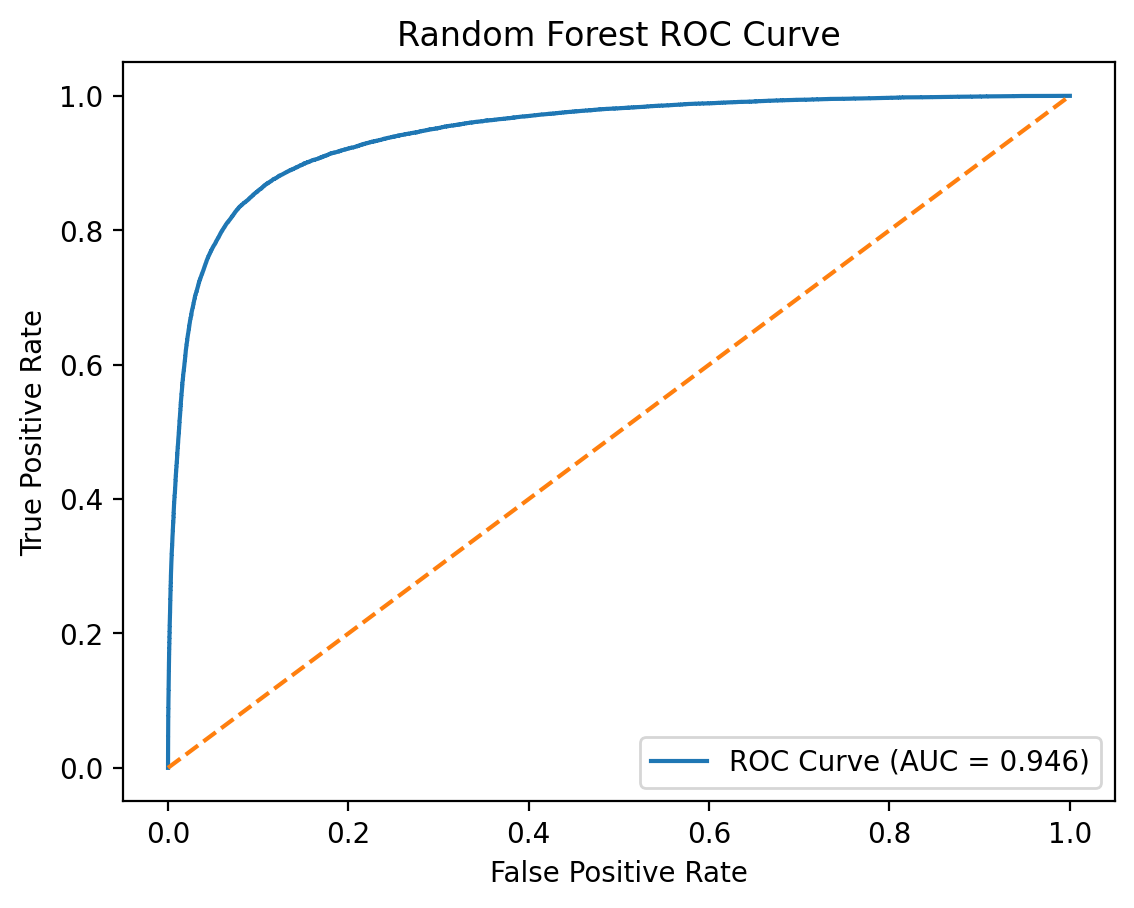

In [154]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = clf_rf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = %.3f)' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

### **Save Model**

In [ ]:
import joblib
import os

save_path = r"D:\Omnie Solutions\Hackathon\models"
os.makedirs(save_path, exist_ok=True)

model_file = os.path.join(save_path, "random_forest_model.pkl")

joblib.dump(clf_rf, model_file)

print(f"Model saved successfully at: {model_file}")


Model saved successfully at: D:\Omnie Solutions\Hackathon\models\random_forest_model.pkl


## **Evaluation**

#### **Load model**

In [125]:
import joblib

model_path = "../models/random_forest_model.pkl"
clf = joblib.load(model_path)
print("Model loaded successfully!")


Model loaded successfully!


#### **Load Test CSV**

In [ ]:
preprocess = joblib.load("../models/preprocessor.pkl")

model = joblib.load("../models/random_forest_model.pkl")

OUT_PATH = "../submissions/submission.csv"

test = pd.read_csv("../data/raw/ML_Artivatic_dataset/test_indessa.csv")
test_processed = preprocess(test)

features = [
    "member_id","loan_amnt","funded_amnt","funded_amnt_inv","int_rate","annual_inc","dti",
    "delinq_2yrs","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util",
    "total_acc","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
    "collections_12_mths_ex_med","total_amount_to_be_paid",
    "term_encoded","grade_encoded","home_ownership_encoded","verification_status_encoded",
    "purpose_encoded","emp_length_encoded"
]

missing = [f for f in features if f not in test_processed.columns]
if missing:
    raise KeyError(f"Still missing features: {missing}")

X_test = test_processed[features].copy()
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(X_test.median())

preds = model.predict_proba(X_test.values)[:, 1]  # or use pipeline.predict_proba if pipeline saved

submission = pd.DataFrame({"member_id": test_processed["member_id"], "loan_status": preds})
submission.to_csv(OUT_PATH, index=False)
print("Saved", OUT_PATH)



Saved submission.csv


In [134]:
import numpy as np, pandas as pd

X_test_arr = np.asarray(X_test)
Y_test_arr = np.asarray(Y_test)
print("X_test_arr.shape:", X_test_arr.shape)
print("Y_test_arr.shape:", Y_test_arr.shape)
print()

if isinstance(X_test, (pd.DataFrame, pd.Series)):
    print("X_test index sample:", list(X_test.index[:10]))
    print("X_test head (first row):", X_test.head(1).to_dict() if isinstance(X_test, pd.DataFrame) else X_test.head(1).to_dict())
if isinstance(Y_test, (pd.Series, pd.DataFrame)):
    print("Y_test index sample:", list(Y_test.index[:10]))
    print("Y_test head (first row):", Y_test.head(1).to_dict() if isinstance(Y_test, pd.DataFrame) else Y_test.head(1).to_dict())

print("Y_test sample values:", Y_test_arr[:10])


X_test_arr.shape: (354951, 26)
Y_test_arr.shape: (159729,)

X_test index sample: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
X_test head (first row): {'member_id': {0: 11937648}, 'loan_amnt': {0: 14000}, 'funded_amnt': {0: 14000}, 'funded_amnt_inv': {0: 14000.0}, 'int_rate': {0: 16.24}, 'annual_inc': {0: 73500.0}, 'dti': {0: 28.65}, 'delinq_2yrs': {0: 1.0}, 'inq_last_6mths': {0: 1.0}, 'open_acc': {0: 16.0}, 'pub_rec': {0: 0.0}, 'revol_bal': {0: 29828}, 'revol_util': {0: 65.3}, 'total_acc': {0: 53.0}, 'total_rec_int': {0: 3915.61}, 'total_rec_late_fee': {0: 0.0}, 'recoveries': {0: 0.0}, 'collection_recovery_fee': {0: 0.0}, 'collections_12_mths_ex_med': {0: 0.0}, 'total_amount_to_be_paid': {0: 20534.439110978754}, 'term_encoded': {0: 1}, 'grade_encoded': {0: 3}, 'home_ownership_encoded': {0: 4}, 'verification_status_encoded': {0: 1}, 'purpose_encoded': {0: 1}, 'emp_length_encoded': {0: 4}}
Y_test index sample: [483560, 343667, 171867, 285146, 45161, 46179, 76194, 44052, 352951, 124897]
Y_test head (f

### **Support Vector Machine**

In [137]:
from sklearn.model_selection import train_test_split

Y = df["loan_status"]
X = df.drop(["loan_status"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=42, test_size=0.30, stratify=Y
)

print("Train rows:", len(X_train), "Test rows:", len(X_test))


Train rows: 372699 Test rows: 159729


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score
)
import joblib
import time

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SGDClassifier(
        loss='hinge',            # linear SVM
        penalty='l2',
        alpha=1e-4,              # regularization strength, tune if needed
        max_iter=1000,
        tol=1e-3,
        random_state=42,
        class_weight='balanced', # helps with class imbalance
        n_jobs=-1
    ))
])

t0 = time.time()
pipe.fit(X_train, Y_train)
t1 = time.time()
print(f"Training time: {t1-t0:.1f} seconds")

# predictions
y_pred = pipe.predict(X_test)


try:
    scores = pipe.decision_function(X_test)
except Exception:
    try:
        scores = pipe.predict_proba(X_test)[:, 1]
    except Exception:
        scores = None

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))

if scores is not None:
    try:
        print("\nROC AUC:", roc_auc_score(Y_test, scores))
    except Exception as e:
        print("\nCould not compute ROC AUC:", e)
else:
    print("\nNo continuous scores available for ROC AUC (decision_function/predict_proba missing).")

joblib.dump(pipe, "../models/svm_sgd_pipeline.joblib")
print("\nModel saved to svm_sgd_pipeline.joblib")


Training time: 2.1 seconds
Accuracy: 0.7917034477145666

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85    121981
           1       0.54      0.81      0.65     37748

    accuracy                           0.79    159729
   macro avg       0.74      0.80      0.75    159729
weighted avg       0.84      0.79      0.80    159729


Confusion Matrix:
 [[95751 26230]
 [ 7041 30707]]

ROC AUC: 0.8831201378078173

Model saved to svm_sgd_pipeline.joblib


## **XGBoost**

In [139]:
from xgboost import XGBClassifier
import time

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import joblib, time, numpy as np, pandas as pd

print("xgboost version:", xgb.__version__)

neg = (Y_train == 0).sum()
pos = (Y_train == 1).sum()
scale_pos_weight = float(neg) / float(pos) if pos > 0 else 1.0
print("scale_pos_weight:", scale_pos_weight)

params = dict(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight
)

clf_xgb = XGBClassifier(**params, use_label_encoder=False) 

t0 = time.time()
try:
    print("Trying XGBClassifier.fit(...) with early stopping via fit() args...")
    clf_xgb.fit(
        X_train, Y_train,
        eval_set=[(X_test, Y_test)],
        early_stopping_rounds=50,
        verbose=50
    )
    trained_with = "XGBClassifier.fit"
except TypeError as e:
    print("sklearn-style fit failed with TypeError — falling back to xgb.train(). Error:", e)
   
    dtrain = xgb.DMatrix(X_train, label=Y_train)
    dtest  = xgb.DMatrix(X_test,  label=Y_test)
    xgb_params = {
        "objective": "binary:logistic",
        "max_depth": params['max_depth'],
        "eta": params['learning_rate'],
        "subsample": params['subsample'],
        "colsample_bytree": params['colsample_bytree'],
        "eval_metric": "auc",
        "seed": 42,
        "scale_pos_weight": scale_pos_weight
    }
    evallist = [(dtest, "eval"), (dtrain, "train")]
    bst = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=params['n_estimators'],
        evals=evallist,
        early_stopping_rounds=50,
        verbose_eval=50
    )
    trained_with = "xgb.train"

t_train = time.time() - t0
print(f"Training finished in {t_train:.1f} sec using {trained_with}")

if trained_with == "XGBClassifier.fit":
    y_pred = clf_xgb.predict(X_test)
    try:
        y_prob = clf_xgb.predict_proba(X_test)[:, 1]
    except Exception:
       
        try: y_prob = clf_xgb.predict(X_test)  
        except: y_prob = None
  
    joblib.dump(clf_xgb, "../models//xgb_classifier_sklearn.joblib")
    print("Saved model to xgb_classifier_sklearn.joblib")
 
    booster = clf_xgb.get_booster()
else:
    
    dtest = xgb.DMatrix(X_test)
    y_prob = bst.predict(dtest)
    y_pred = (y_prob >= 0.5).astype(int)
 
    bst.save_model("xgb_booster.json")
    print("Saved model to xgb_booster.json")
    booster = bst
print("len(X_test):", len(X_test), "len(Y_test):", len(Y_test), "len(y_pred):", len(y_pred))
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
if y_prob is not None:
    try:
        print("\nROC AUC:", roc_auc_score(Y_test, y_prob))
    except Exception as e:
        print("\nCould not compute ROC AUC:", e)
else:
    print("\nNo probability/scores available to compute ROC AUC.")

try:
    importance = booster.get_score(importance_type='gain')
    imp_df = pd.DataFrame.from_dict(importance, orient='index', columns=['gain']).sort_values('gain', ascending=False)
    print("\nTop 20 feature importances (gain):\n", imp_df.head(20))
except Exception as e:
    print("Could not compute feature importance:", e)


xgboost version: 3.1.1
scale_pos_weight: 3.2314172504229157
Trying XGBClassifier.fit(...) with early stopping via fit() args...
sklearn-style fit failed with TypeError — falling back to xgb.train(). Error: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'
[0]	eval-auc:0.89371	train-auc:0.89426
[50]	eval-auc:0.91980	train-auc:0.92113
[100]	eval-auc:0.93508	train-auc:0.93722
[150]	eval-auc:0.94240	train-auc:0.94537
[200]	eval-auc:0.94662	train-auc:0.95042
[250]	eval-auc:0.94897	train-auc:0.95357
[300]	eval-auc:0.95085	train-auc:0.95604
[350]	eval-auc:0.95223	train-auc:0.95806
[400]	eval-auc:0.95324	train-auc:0.95976
[450]	eval-auc:0.95400	train-auc:0.96115
[499]	eval-auc:0.95468	train-auc:0.96234
Training finished in 116.6 sec using xgb.train
Saved model to xgb_booster.json
len(X_test): 159729 len(Y_test): 159729 len(y_pred): 159729
Accuracy: 0.9099412129293992

Classification report:
               precision    recall  f1-score   support

           0       

### **Evaluation**

In [157]:
import xgboost as xgb

model_path = "../models/xgb_booster.json"

bst = xgb.Booster()
bst.load_model(model_path)

print("Model loaded successfully!")

Model loaded successfully!


In [158]:
preprocess = joblib.load("../models/preprocessor.pkl")

bst.load_model(model_path)

OUT_PATH = "../submissions/submission_XGB.csv"

test = pd.read_csv("../data/raw/ML_Artivatic_dataset/test_indessa.csv")
test_processed = preprocess(test)

features = [
    "member_id","loan_amnt","funded_amnt","funded_amnt_inv","int_rate","annual_inc","dti",
    "delinq_2yrs","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util",
    "total_acc","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
    "collections_12_mths_ex_med","total_amount_to_be_paid",
    "term_encoded","grade_encoded","home_ownership_encoded","verification_status_encoded",
    "purpose_encoded","emp_length_encoded"
]

missing = [f for f in features if f not in test_processed.columns]
if missing:
    raise KeyError(f"Still missing features: {missing}")

X_test = test_processed[features].copy()
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(X_test.median())

preds = model.predict_proba(X_test.values)[:, 1]  # or use pipeline.predict_proba if pipeline saved

submission = pd.DataFrame({"member_id": test_processed["member_id"], "loan_status": preds})
submission.to_csv(OUT_PATH, index=False)
print("Saved", OUT_PATH)



Saved ../submissions/submission_XGB.csv
